# <center>Temps de Réponse de la Brigade des Pompiers de Londres</center>

In [185]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 9999

In [186]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pyproj
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
import re

#plt.style.use('ggplot')
%matplotlib inline

In [187]:
print(pd.__version__)

2.2.2


In [188]:
from IPython.display import display_markdown
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [189]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [190]:
pd.options.display.max_info_columns

100

In [191]:
import os
root_folder_path = os.path.abspath('..')
data_raw_path = os.path.join(root_folder_path, "data", "raw")
incidents_folder_path = os.path.join(data_raw_path, "london-fire-brigade-incident-records")
mobilisation_folder_path = os.path.join(data_raw_path, "london-fire-brigade-mobilisation-records")

# **1.Lecture des données (Fichiers Incidents)**

In [192]:
incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, r"LFB Incident data from 2009 - 2017.csv"),
                                            date_format='%d-%b-%y',
                                            parse_dates=['DateOfCall'],
                                            dayfirst=True,
                                            sep=",")

incident_data_from_2018_to_onwards = pd.read_csv(os.path.join(incidents_folder_path, r"LFB Incident data from 2018 onwards.csv"),
                                                date_format='%d-%b-%y',
                                                parse_dates=['DateOfCall'],
                                                dayfirst=True,
                                                sep=",",
                                                encoding='unicode_escape')

C:\Users\courio\AppData\Local\Temp\ipykernel_17856\32810285.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


In [193]:
# vérifier si nous avons le même nombre de colonnes pour le merge.
# https://www.geeksforgeeks.org/prevent-duplicated-columns-when-joining-two-pandas-dataframes/
coluns_intersect: int = len((set(incident_data_from_2009_to_2017.columns) & set(incident_data_from_2018_to_onwards.columns)))
if(len(incident_data_from_2009_to_2017.columns) == len(incident_data_from_2018_to_onwards.columns) 
   and coluns_intersect == len(incident_data_from_2009_to_2017.columns)):
    print("Nous avons le même nombre de colonnes.")

# Concatenons les 2 DataFrames verticalement.
incidents_df = pd.concat([incident_data_from_2009_to_2017, incident_data_from_2018_to_onwards], axis=0)
#incidents_df['DateOfCall'] = incidents_df['DateOfCall'].dt.date
incidents_df.head()

Nous avons le même nombre de colonnes.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


In [194]:
incidents_df.shape

(1691361, 39)

### Acronyms

In [195]:
metadata = pd.read_excel(os.path.join(incidents_folder_path, "Metadata.xlsx"), usecols=['Column', 'Description2']).rename(columns={'Column': 'Variable', 'Description2': 'Description'})
display(metadata)

,Variable,Description
0,IncidentNumber,Numéro d'incident du LFB
1,DateOfCall,Date de l'appel au 999
2,CalYear,Année de l'appel au 999
3,TimeOfCall,Temps de l'appel au 999
4,HourOfCall,Heure de l'appel au 999
5,IncidentGroup,Catégorie d'incident de haut niveau
6,StopCodeDescription,Catégorie d'incident détaillée
7,SpecialServiceType,Détails supplémentaires pour les catégories d'...
8,PropertyCategory,Descripteur de propriété de haut niveau
9,PropertyType,Description détaillé de la propriété


# **2.Lecture des données (Fichiers Mobilisation)**

In [196]:
mobilisation_data_from_2009_to_2014 = pd.read_csv(os.path.join(mobilisation_folder_path, r"LFB Mobilisation data from January 2009 - 2014.csv"),
                                            date_format='%m/%d/%Y %H:%M',
                                            parse_dates=['DateAndTimeMobilised','DateAndTimeMobile','DateAndTimeArrived','DateAndTimeLeft','DateAndTimeReturned'],
                                            dayfirst=False,
                                            sep=",",
                                            encoding='unicode_escape'
                                            )

mobilisation_data_from_2015_to_2020 = pd.read_csv(os.path.join(mobilisation_folder_path, r"LFB Mobilisation data from 2015 - 2020.csv"),
                                            date_format='%m/%d/%Y %H:%M',
                                            parse_dates=['DateAndTimeMobilised','DateAndTimeMobile','DateAndTimeArrived','DateAndTimeLeft','DateAndTimeReturned'],
                                            dayfirst=False,
                                            sep=",",
                                            encoding='unicode_escape')

mobilisation_data_from_2021_to_onwards = pd.read_csv(os.path.join(mobilisation_folder_path, r"LFB Mobilisation data 2021 - 2024.csv"),
                                                date_format='%m/%d/%Y %H:%M',
                                                parse_dates=['DateAndTimeMobilised','DateAndTimeMobile','DateAndTimeArrived','DateAndTimeLeft','DateAndTimeReturned'],
                                                dayfirst=False,
                                                sep=",",
                                                encoding='unicode_escape')

C:\Users\courio\AppData\Local\Temp\ipykernel_17856\2374534265.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


In [197]:
# Concatenons les 2 DataFrames verticalement.
mobilisations_df = pd.concat([mobilisation_data_from_2009_to_2014, mobilisation_data_from_2015_to_2020,mobilisation_data_from_2021_to_onwards], axis=0)
# Pas sur à ce niveau.
mobilisations_df.drop_duplicates(subset=['IncidentNumber','CalYear','HourOfCall'], keep='first',inplace =True)

mobilisations_df.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaT,2009-01-01 00:07:00,NaN,NaN,319,2009-01-01 00:16:00,2009-01-01 00:23:00,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:09:00,151.0,157.0,308,2009-01-01 00:16:00,2009-01-01 00:17:00,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:08:00,108.0,102.0,210,2009-01-01 00:20:00,2009-01-01 00:20:00,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,114.0,119.0,233,2009-01-01 00:11:00,2009-01-01 00:22:00,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
6,6091,2009,0,38434,A432,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,83.0,89.0,172,2009-01-01 00:15:00,2009-01-01 00:23:00,A43,Kentish Town,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


In [198]:
mobilisations_df.shape

(1565807, 22)

# **Merge des 2 datsets pour analyse**

In [199]:
# https://www.geeksforgeeks.org/prevent-duplicated-columns-when-joining-two-pandas-dataframes/
#df = pd.merge(incidents_df, mobilisations_df, on='IncidentNumber', how='outer', suffixes=('_xxxxx', '_yyyyy'))
#df = pd.merge(incidents_df, mobilisations_df, on=['IncidentNumber','CalYear','HourOfCall'], how='inner') 	
# pd.merge(df1, df2, left_index=True, right_index=True)
#df1.merge(df2, how='left', on='name').drop_duplicates(subset='name',keep='first')
df = pd.merge(incidents_df, mobilisations_df, how='inner', 
                  left_on=['IncidentNumber','CalYear','HourOfCall'],
                  right_on=['IncidentNumber','CalYear','HourOfCall'])

df = df.drop(['IncidentNumber'],axis=1)

In [200]:
df.reset_index(drop=True)

,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,38426,H271,1,2009-01-01 00:02:00,NaT,2009-01-01 00:07:00,NaN,NaN,319,2009-01-01 00:16:00,2009-01-01 00:23:00,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0,38429,A341,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:09:00,151.0,157.0,308,2009-01-01 00:16:00,2009-01-01 00:17:00,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0,38430,G232,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:08:00,108.0,102.0,210,2009-01-01 00:20:00,2009-01-01 00:20:00,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0,38432,A311,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,114.0,119.0,233,2009-01-01 00:11:00,2009-01-01 00:22:00,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,2009-01-01,2009,00:06:03,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW5,0.000000e+00,20499122.0,E09000007,CAMDEN,Camden,E05013663,Kentish Town North,Kentish Town North,NaN,NaN,529450,185250,NaN,NaN,London,Kentish Town,172.0,Kentish Town,222.0,Kentish Town,1.0,2.0,2,60,255,1.0,38434,A432,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,83.0,89.0,172,2009-01-01 00:15:00,2009-01-01 00:23:00,A43,Kentish Town,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545938,2024-03-30,2024,23:45:52,23,Fire,Primary Fire,NaN,Road Vehicle,Car,On land associated with building,IG11 7XZ,IG11,1.000412e+08,199004

In [201]:
del incidents_df, mobilisations_df

In [202]:
df.shape

(1545943, 57)

In [203]:
df.head()

,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,38426,H271,1,2009-01-01 00:02:00,NaT,2009-01-01 00:07:00,NaN,NaN,319,2009-01-01 00:16:00,2009-01-01 00:23:00,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0,38429,A341,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:09:00,151.0,157.0,308,2009-01-01 00:16:00,2009-01-01 00:17:00,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0,38430,G232,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:08:00,108.0,102.0,210,2009-01-01 00:20:00,2009-01-01 00:20:00,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0,38432,A311,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,114.0,119.0,233,2009-01-01 00:11:00,2009-01-01 00:22:00,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,2009-01-01,2009,00:06:03,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW5,0.000000e+00,20499122.0,E09000007,CAMDEN,Camden,E05013663,Kentish Town North,Kentish Town North,NaN,NaN,529450,185250,NaN,NaN,London,Kentish Town,172.0,Kentish Town,222.0,Kentish Town,1.0,2.0,2,60,255,1.0,38434,A432,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,83.0,89.0,172,2009-01-01 00:15:00,2009-01-01 00:23:00,A43,Kentish Town,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


# **3. Exploratory Data Analysis /Analyse exploratoire des données**

## Objectif :

#### Analyse de Forme [(voir détails ici)](#) :
- **Variable target** : FirstPumpArriving_AttendanceTime
- **Lignes et colonnes** : (1545943, 57)
- **Types de variables** : qualitatives : 20, quantitatives : 19
- **Analyse des valeurs manquantes** :

    - Liste des colonnes n'ayant pas de Nan à la 1ere analyse : **['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall','IncidentGroup', 'StopCodeDescription',         'PropertyCategory','PropertyType', 'AddressQualifier', 'Postcode_district','IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase','Easting_rounded', 'Northing_rounded', 'FRS', 'PumpCount','PumpMinutesRounded', 'Notional Cost (£)', 'MonthOfCall']**

    - Il y'a **19** variables qui ont des valeurs NaN.
        - Liste des colonnnes ayant plus de 49% de Nan : **['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation']**
        - Les valeurs nulles de colonnes **FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls** sont remplacées par leur mode         
        
    - Il faudra checker le cas DateOfCall avec les NaN

#### Analyse de Fond :
- **Visualisation de la target** :
    - La variable cible **FirstPumpArriving_AttendanceTime** contient des NaN (On checkera si on peut remplir les NaN plus tard) ou les supprimer les lignes.
    
- **Traitement sur les colonnes**
    - Suppression des colonnes ayannt beaucoupt de valeurs nulles : **['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation']**
    - Suppression des colonnes n'ayant pas d'impact sur le dataset : **['UPRN', 'USRN','IncGeo_WardCode','IncGeo_WardName','IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation']**
    - 
    - Le type de la colonne **DateOfCall**  et **TimeOfCall** a été changée en Datetime
    
- **Signification des variables** :
    -  variables continues pas standardisées
    - 

- **Relation Variables catégorielles / Target** :
    - Ces varibales on plus d'impact sur la target
    - 
    - 


- **Relation Variables continuess / Target** :
    - Ces varibales on moins d'impact sur la target
    - 
    - 
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - 
    - 
    - 
    - 
    - 
    - 


    

### **3.1 Analyse de la forme des données**

Ce dataset **incidents** après merge contient **2330947 lignes et 58 colonnes**

In [204]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545943 entries, 0 to 1545942
Data columns (total 57 columns):
 #   Column                                  Non-Null Count    Dtype         
---  ------                                  --------------    -----         
 0   DateOfCall                              1545943 non-null  datetime64[ns]
 1   CalYear                                 1545943 non-null  int64         
 2   TimeOfCall                              1545943 non-null  object        
 3   HourOfCall                              1545943 non-null  int64         
 4   IncidentGroup                           1545943 non-null  object        
 5   StopCodeDescription                     1545943 non-null  object        
 6   SpecialServiceType                      439853 non-null   object        
 7   PropertyCategory                        1545943 non-null  object        
 8   PropertyType                            1545943 non-null  object        
 9   AddressQualifier        

None

In [205]:
#df['CalYear'] = df['CalYear'].astype('category')
#df['HourOfCall'] = df['HourOfCall'].astype('category')

In [206]:
# df['TimeOfCall'].value_counts()

object            27
float64           14
int64             10
datetime64[ns]     6
Name: count, dtype: int64

<Axes: ylabel='count'>

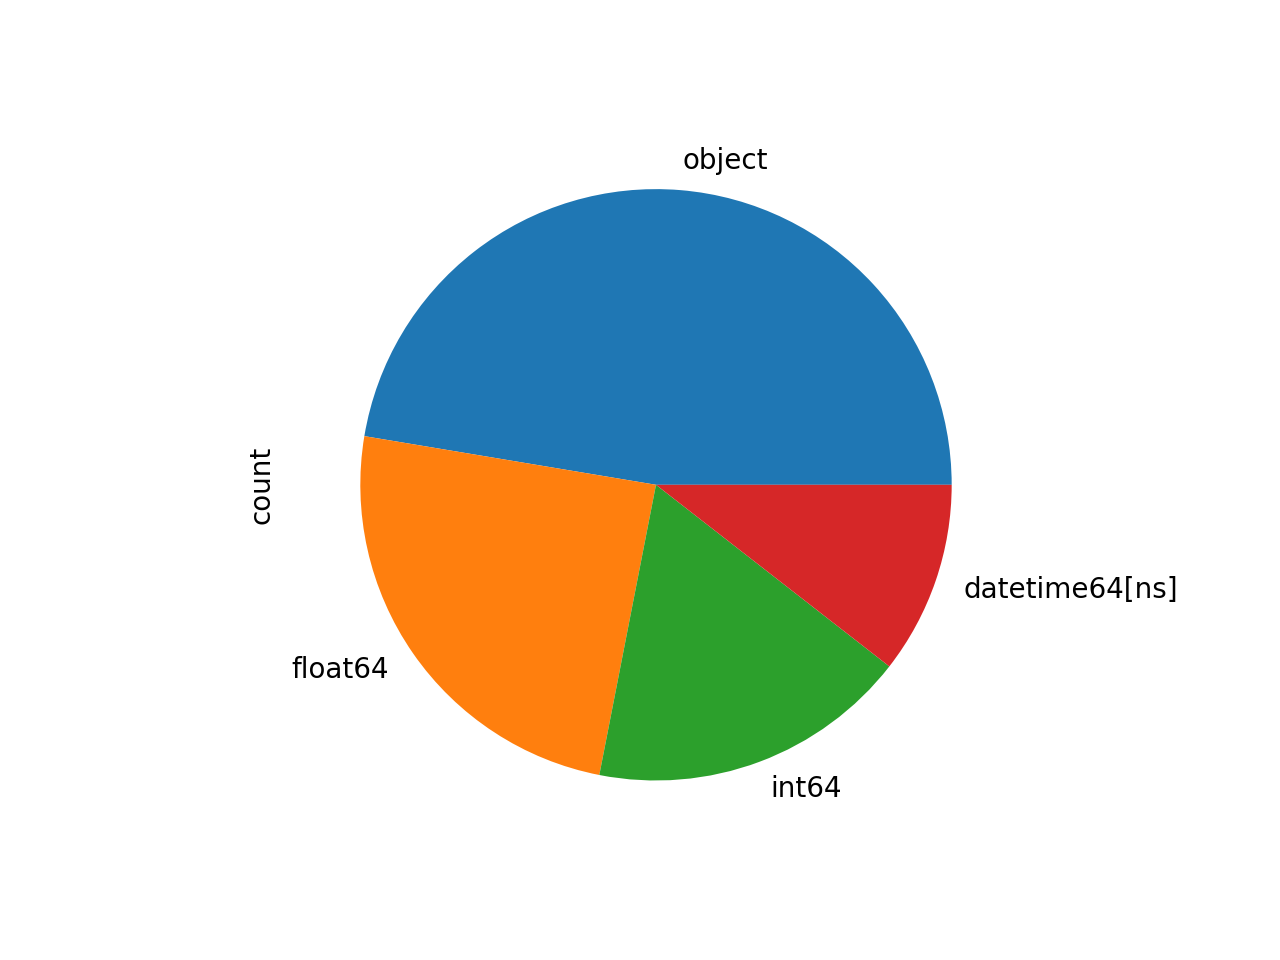

In [207]:
display(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

In [208]:
# Analyse descriptive des variables continue.
# df.select_dtypes(exclude=['object']).describe()
df.select_dtypes(include=[np.number]).describe()

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,PumpOrder,DelayCodeId
count,1.545943e+06,1.545943e+06,1.417130e+06,1.399061e+06,800944.000000,800944.000000,1.545943e+06,1.545943e+06,800944.000000,800944.000000,1.545937e+06,599589.000000,1.545943e+06,1.545943e+06,1.545943e+06,1.545943e+06,1.545943e+06,1.544988e+06,1.545943e+06,1.525109e+06,1.525052e+06,1.545943e+06,1.545943e+06,438891.000000
mean,2.016211e+03,1.343032e+01,2.291231e+10,2.030081e+07,530632.952266,180364.659079,5.306242e+05,1.804722e+05,51.451607,-0.118858,3.179018e+02,394.743344,1.389459e+00,1.586612e+00,1.629518e+00,7.629537e+01,3.989286e+02,1.327401e+00,4.720459e+06,7.771877e+01,2.453819e+02,3.210016e+02,1.041998e+00,10.448551
std,4.601159e+00,6.269565e+00,4.836575e+10,4.327984e+06,10334.349405,7425.407822,9.791245e+03,7.398810e+03,1.690140,0.148967,1.387693e+02,153.445482,6.916350e-01,8.495150e-01,1.428271e+00,3.206874e+02,1.685762e+03,1.511436e+00,1.322143e+06,4.313315e+01,1.380758e+02,1.415223e+02,2.485701e-01,2.232508
min,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,503582.000000,155901.000000,5.035500e+05,1.559500e+05,0.000000,-0.510155,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.550000e+02,1.000000e+00,3.842600e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000
25%,2.012000e+03,9.000000e+00,0.000000e+00,2.040095e+07,525184.000000,175978.000000,5.251500e+05,1.760500e+05,51.468820,-0.197459,2.310000e+02,294.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.600000e+02,1.000000e+00,3.942176e+06,5.300000e+01,1.560000e+02,2.320000e+02,1.000000e+00,9.000000
50%,2.016000e+03,1.400000e+01,0.000000e+00,2.120124e+07,530809.000000,180989.000000,5.308500e+05,1.810500e+05,51.512928,-0.116909,2.960000e+02,368.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,3.280000e+02,1.000000e+00,4.804536e+06,7.200000e+01,2.210000e+02,2.980000e+02,1.000000e+00,12.000000
75%,2.020000e+03,1.900000e+01,1.002323e+10,2.210081e+07,536846.000000,184945.000000,5.363500e+05,1.852500e+05,51.547812,-0.028640,3.780000e+02,463.000000,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,3.520000e+02,1.000000e+00,5.733870e+06,9.500000e+01,3.040000e+02,3.810000e+02,1.000000e+00,12.000000
max,2.024000e+03,2.300000e+01,2.000044e+11,9.999042e+07,561126.000000,200906.000000,5.611500e+05,2.009500e+05,51.691670,0.322219,1.200000e+03,1200.000000,4.600000e+01,1.060000e+02,4.020000e+02,1.297510e+05,7.093050e+05,3.690000e+02,6.624521e+06,1.192000e+03,1.198000e+03,1.200000e+03,9.000000e+00,13.000000


In [209]:
# Analyse descriptive des variables qualitatives.
#df.select_dtypes(include=['object']).describe()
df.select_dtypes(include=['object','category'],exclude=[np.number]).describe()

,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,Resource_Code,PerformanceReporting,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PlusCode_Code,PlusCode_Description,DelayCode_Description
count,1545943,1545943,1545943,439853,1545943,1545943,1545943,800944,1545943,1545943,1545943,1545943,1545660,1545660,1545660,1545943,1545942,1545926,599582,1545943,1545943,1545930,1545930,1545327,1545943,1545943,438891
unique,121475,3,9,21,9,292,11,115637,324,33,33,33,889,1478,1475,1,102,117,114,187,3,117,117,2,3,3,10
top,16:56:28,False Alarm,AFA,Effecting entry/exit,Dwelling,House - single occupancy,Correct incident location,SW17 0QT,CR0,E09000033,WESTMINSTER,Westminster,E05013808,West End,West End,London,Soho,Soho,Hammersmith,A242,1,A24,Soho,Home Station,Initial,Initial Mobilisation,Not held up
freq,49,803090,610013,108507,737650,179221,883640,1755,30809,113679,113679,113679,29191,25550,25550,1545943,55683,52237,15423,33580,1492302,52381,52381,1493823,1542103,1542103,258295


In [210]:
df.isna().sum()

DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1106090
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              744999
Postcode_district                               0
UPRN                                       128813
USRN                                       146882
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               283
IncGeo_WardName                               283
IncGeo_WardNameNew                            283


**Des valeurs manquantes existent la base de données.**

Liste des colonnes ayant des valeurs manquantes.

In [211]:
#(incidents_df.isna().sum()/incidents_df.shape[0]).sort_values(ascending=True)
def pourcentage_de_valeurs_manquantes(data) -> None:

    nombre_de_lignes = data.shape[0]
    
    for i in range(0, len(data.isna().sum(axis=0))):
        print("Pour la variable", data.isna().sum(axis=0).index[i], "le pourcentage de NaN est de", np.round(data.isna().sum(axis=0)[i]*100/nombre_de_lignes, 2), "%")

        
df.isna().sum()[df.isna().sum() > 0 ] / df.shape[0] * 100.00

SpecialServiceType                        71.547916
Postcode_full                             48.190587
UPRN                                       8.332325
USRN                                       9.501126
IncGeo_WardCode                            0.018306
IncGeo_WardName                            0.018306
IncGeo_WardNameNew                         0.018306
Easting_m                                 48.190587
Northing_m                                48.190587
Latitude                                  48.190587
Longitude                                 48.190587
IncidentStationGround                      0.000065
FirstPumpArriving_AttendanceTime           0.000388
FirstPumpArriving_DeployedFromStation      0.001100
SecondPumpArriving_AttendanceTime         61.215323
SecondPumpArriving_DeployedFromStation    61.215776
NumCalls                                   0.061775
DateAndTimeMobile                          1.340606
TurnoutTimeSeconds                         1.347656
TravelTimeSe

In [212]:
(df.isna().sum()[df.isna().sum() / df.shape[0] > 0.50 ]).index

Index(['SpecialServiceType', 'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation', 'DateAndTimeReturned',
       'DelayCodeId', 'DelayCode_Description'],
      dtype='object')

<Axes: >

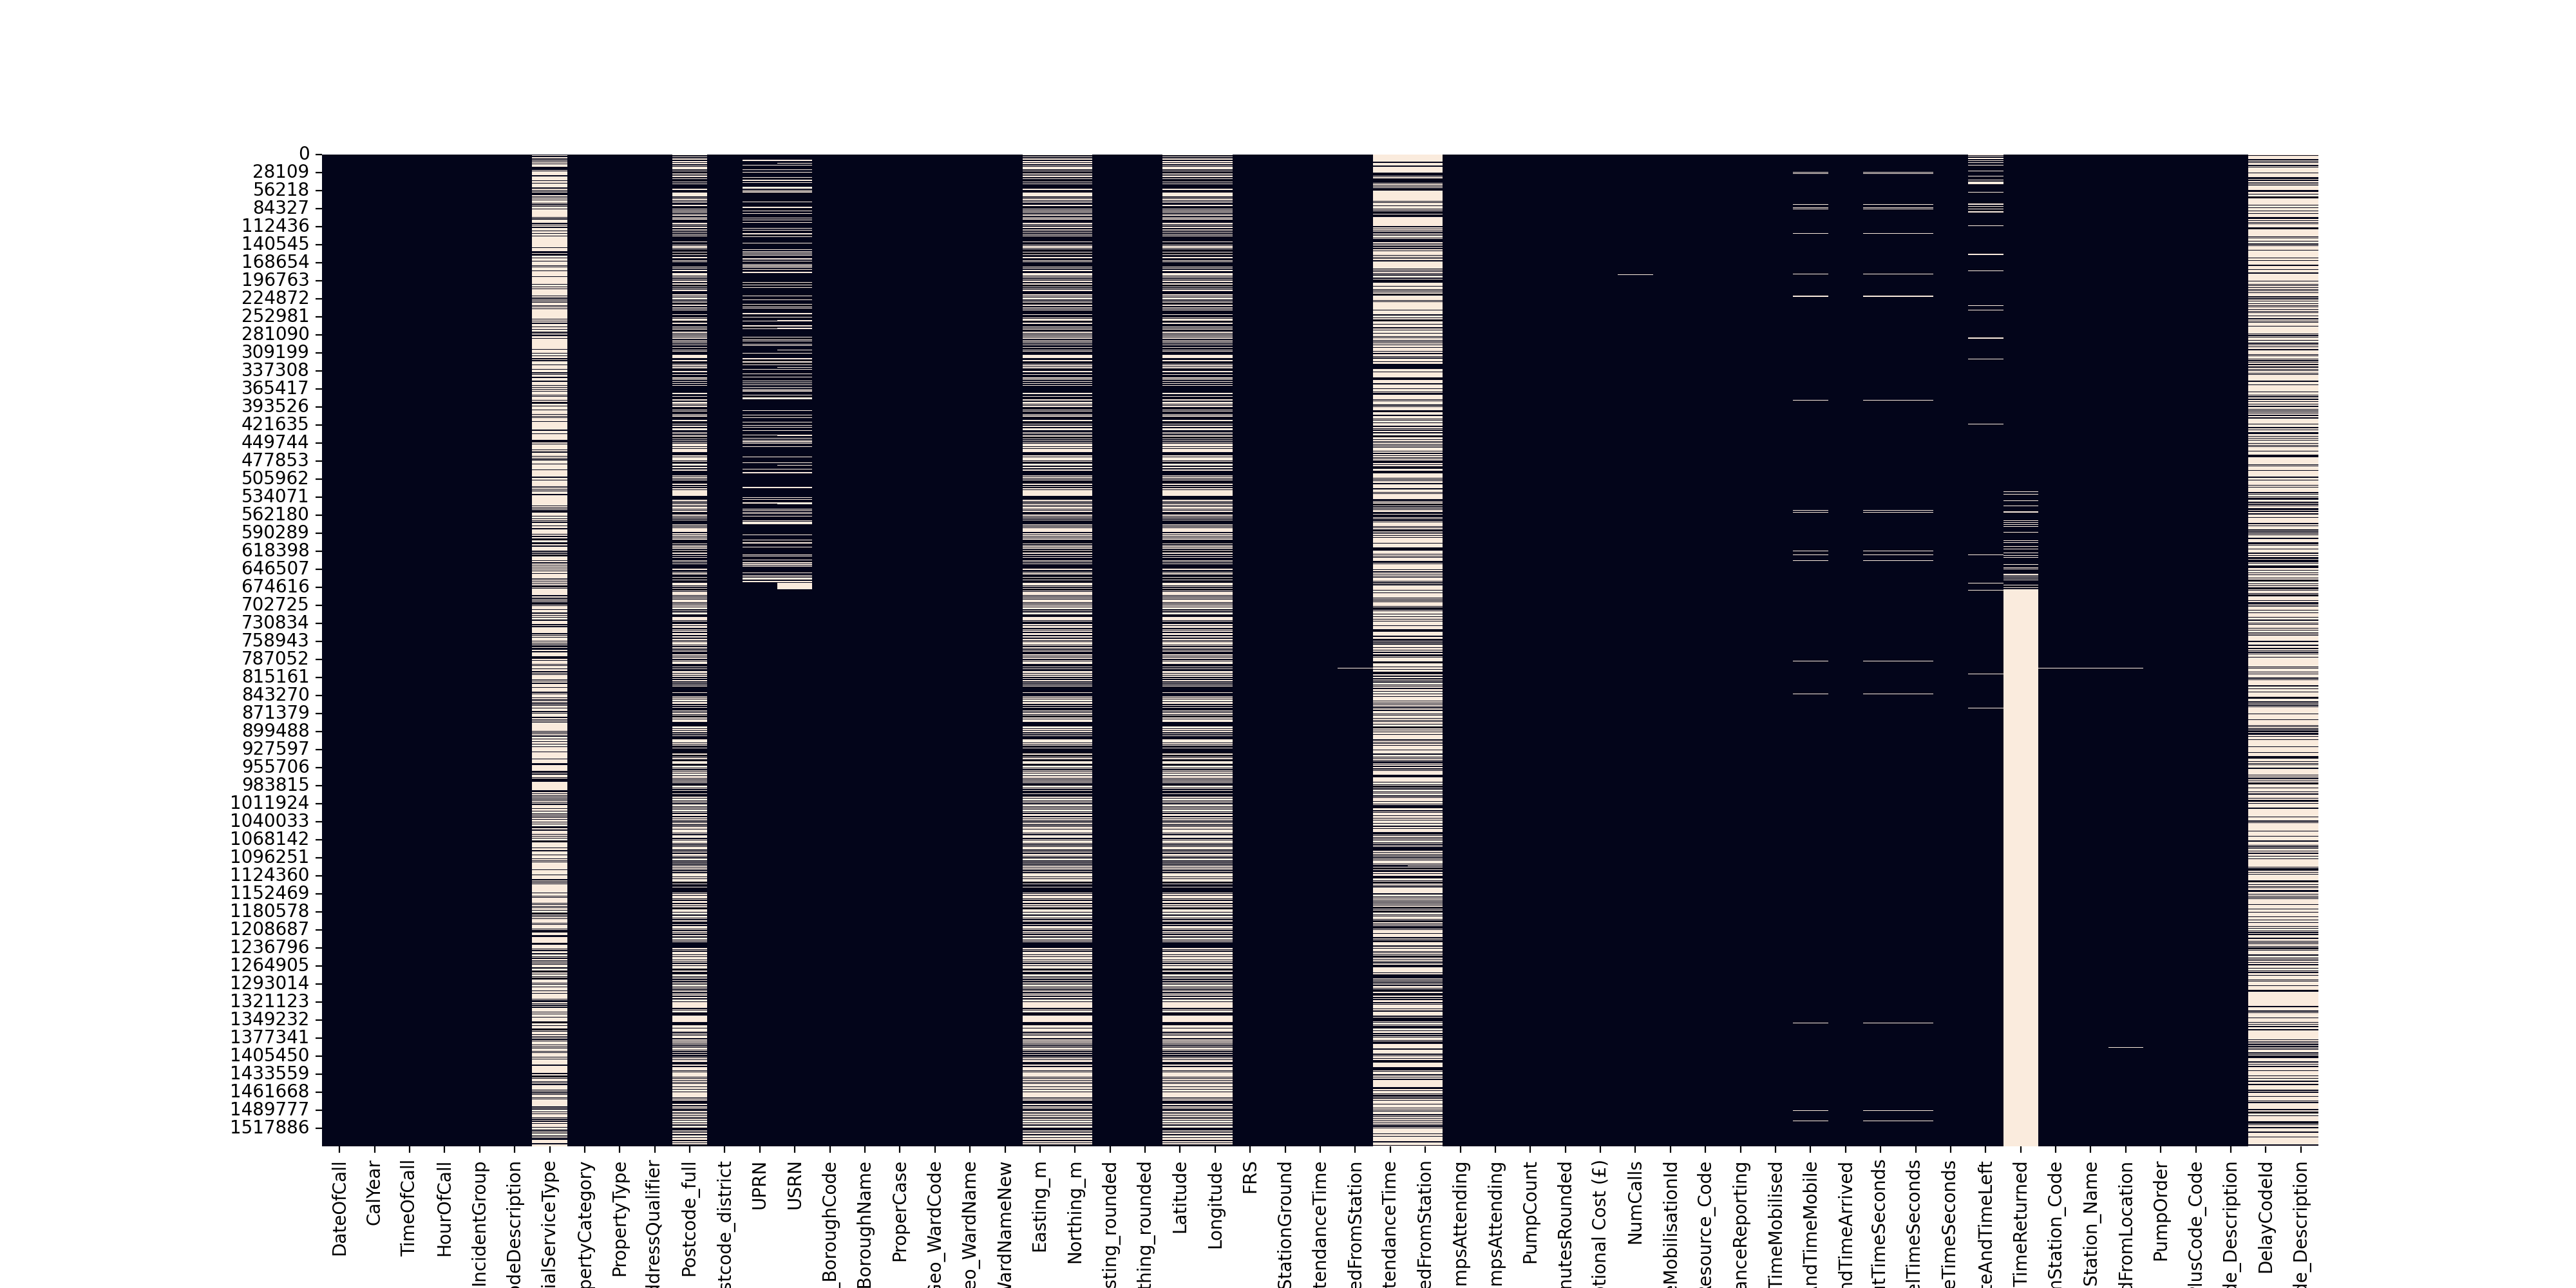

In [213]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### **3.2 Analyse du Fond**


In [214]:
#from ydata_profiling import ProfileReport
#import ydata-profiling
#london_profile = ProfileReport(incidents_df)

#### **3.2.1 Elimination des colonnes inutiles**

Listes des colonnes à supprimer
incidents_df.isna().sum()[incidents_df.isna().sum() > 0 ] / incidents_df.shape[0] * 100.00

- **FRS**, initule car nous traitons les données de londres,
- **Notional Cost (£)**
- **PropertyType**, doublons
- **ResourceMobilisationId**

In [215]:
df = df.drop(['PropertyType','FRS','Notional Cost (£)','ResourceMobilisationId'],errors ='ignore',axis=1)

**Colonnes ayant beaucoup de valeurs nulles**

- **SpecialServiceType**, contient plus de 78% de valeurs nulles, la colonne  **"StopCodeDescription"** joue déjà le même rôle.
- **Postcode_full** , contient plus de 53% de valeurs nulles, On ne peut pas reconstituer les valeurs nulles,on pourra utiliser la colonne  **"Postcode_district"**.
- **SecondPumpArriving_AttendanceTime** , contient beaucoup de valeurs nulles.
- **SecondPumpArriving_DeployedFromStation** , contient beaucoup valeurs nulles.
- **DateAndTimeReturned**
- **DelayCodeId**
- **DelayCode_Description**

In [216]:
nulls_columns_todrop = [
    'SpecialServiceType',
    'Postcode_full',
    'DateAndTimeReturned',
    'DelayCodeId',
    'DelayCode_Description',
    'SecondPumpArriving_AttendanceTime',
    'SecondPumpArriving_DeployedFromStation'
    ]
df = df.drop(nulls_columns_todrop,errors ='ignore',axis=1)

In [217]:
v84 = pyproj.Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = pyproj.Proj(proj="latlong", k=0.9996012717, ellps="airy",towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = pyproj.Proj(init="world:bng")

# example : ENtoLL84(528650,176850)
def ENtoLL84(easting, northing):
    """Returns (longitude, latitude) tuple
    """
    vlon36, vlat36 = vgrid(easting, northing, inverse=True)
    return pyproj.transform(v36, v84, vlon36, vlat36)

def LL84toEN(longitude, latitude):
    """Returns (easting, northing) tuple
    """
    vlon36, vlat36 = pyproj.transform(v84, v36, longitude, latitude)
    return vgrid(vlon36, vlat36)

# https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da.
# https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
def vectorized_convert(df):
    vlon36, vlat36 = vgrid(df['Easting_rounded'].values, 
                           df['Northing_rounded'].values, 
                           inverse=True)
    converted = pyproj.transform(v36, v84, vlon36, vlat36)
    # df.loc[df['Longitude'].isnull(),'Longitude'] = df['Longitude']
    # df['Longitude'] = df['Longitude'].fillna()
    #df['Longitude'] = converted[0]
    #df['Latitude'] = converted[1]
    df['Longitude'] = df['Longitude'].fillna(pd.Series(converted[0]))
    df['Latitude'] = df['Latitude'].fillna(pd.Series(converted[1]))
    return df

g:\Anaconda\envs\Jan24_cds_Pompiers\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


In [218]:
#%timeit vectorized_convert(df)
df = vectorized_convert(df)

C:\Users\courio\AppData\Local\Temp\ipykernel_17856\2566257584.py:24: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


London is by far the largest city in the United Kingdom, and is split up into 33 smaller units called boroughs. As of 2022 the largest of these boroughs, in terms of population, was Croydon, which had a population of 392,224 in.5 févr. 2024 [Voir source ici](https://www.statista.com/statistics/381055/london-population-by-borough/#:~:text=London%20is%20by%20far%20the,a%20population%20of%20392%2C224%20in.)

In [219]:
df['IncGeo_BoroughCode'].nunique()

33

In [220]:
geo_columns_todrop = [
    'Postcode_full',
    #'Postcode_district',
    'UPRN',
    'USRN',
    'IncGeo_BoroughCode',
    #'IncGeo_BoroughName',
    'ProperCase',
    'IncGeo_WardCode',
    'IncGeo_WardName',
    #'IncGeo_WardNameNew',
    'Easting_m',
    'Northing_m',
    'Easting_rounded',
    'Northing_rounded'
    ]
if(set(['Easting_rounded','Northing_rounded']).issubset(df.columns)):
    df =df.drop(geo_columns_todrop, errors ='ignore',axis=1)

**Suppression de la colonne **'IncidentStationGround'**, car en doublon avec **'DeployedFromStation_Name'****

In [221]:
df = df.drop(['IncidentStationGround','FirstPumpArriving_DeployedFromStation','DeployedFromStation_Code'],errors ='ignore',axis=1)
df = df.dropna(subset=['DeployedFromStation_Name'])

**Suppression de la colonne ProperCase , car ce sont les mêmes informations que la colonne IncGeo_BoroughName**

In [222]:
df = df.drop(['ProperCase'],errors ='ignore',axis=1)

**La colonne IncGeo_WardNameNew .**

In [223]:
df = df.drop(['IncGeo_WardNameNew'],errors ='ignore',axis=1)

**La colonne 'AttendanceTimeSeconds' est la somme de 'TurnoutTimeSeconds' et de 'TravelTimeSeconds'**,donc on peut supprimer les 2 colonnes exemple :<br/>
TurnoutTimeSeconds	73	Turnout time in seconds<br/>
TravelTimeSeconds	275	Travel time in seconds<br/>
AttendanceTimeSeconds	348	Attendance time in seconds<br/>
**La colonne 'AttendanceTimeSeconds' correspond aussi à 'FirstPumpArriving_AttendanceTime' , donc on va la supprimer**


In [224]:
df = df.drop(['TurnoutTimeSeconds','TravelTimeSeconds'],errors ='ignore',axis=1)
if(set(['AttendanceTimeSeconds']).issubset(df.columns)):
    df['FirstPumpArriving_AttendanceTime'] = df['FirstPumpArriving_AttendanceTime'].fillna(pd.Series(df['AttendanceTimeSeconds']))
    df = df.drop(['AttendanceTimeSeconds'],errors ='ignore',axis=1)

**Columns A Réparer**

- FirstPumpArriving_AttendanceTime           
- NumStationsWithPumpsAttending              
- NumPumpsAttending                          
- NumCalls                                   

In [225]:
def verfier_les_outliers(data, plot=True):
    # calculate summary statistics for the Notional Cost column
    summary = data.describe()
    #display(summary)

    # calculate interquartile range for the column
    q1 = summary.loc['25%']
    q3 = summary.loc['75%']
    iqr = q3 - q1

    # identify potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data < lower_bound) | (data > upper_bound))
    #print(type(lower_bound))
    #print(upper_bound)

    # calculate the number and percentage of outliers
    num_outliers = outliers.sum()

    #print(f"Number of outliers:\n{num_outliers}")
    print(f"Number of outliers:\n{pd.concat([num_outliers,lower_bound,upper_bound],axis=1)}")

In [226]:
fillna_numerics_columns = ['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount','PumpMinutesRounded', 'NumCalls']

In [227]:
verfier_les_outliers(df[fillna_numerics_columns])

Number of outliers:
                                       0     1      2
FirstPumpArriving_AttendanceTime   68775  10.5  598.5
NumStationsWithPumpsAttending      29725  -0.5    3.5
NumPumpsAttending                  48925  -0.5    3.5
PumpCount                          56982  -0.5    3.5
PumpMinutesRounded                198523  60.0   60.0
NumCalls                          257855   1.0    1.0


On va utiliser l'empirical rule

In [228]:
#https://www.investopedia.com/terms/e/empirical-rule.asp

In [229]:
## cas FirstPumpArriving_AttendanceTime: (lower_bound: 31.08891802857528, upper_bound: 550.9110819714247)
# df['FirstPumpArriving_AttendanceTime'] = df['FirstPumpArriving_AttendanceTime'].fillna(df['FirstPumpArriving_AttendanceTime'].median())
# df['FirstPumpArriving_AttendanceTime'].median() - 2*df['FirstPumpArriving_AttendanceTime'].std()
# df['FirstPumpArriving_AttendanceTime'].median() 2 2*df['FirstPumpArriving_AttendanceTime'].std()
# df.loc[(df['FirstPumpArriving_AttendanceTime'] > 550.91) | (df['FirstPumpArriving_AttendanceTime'] < 31.09), 'FirstPumpArriving_AttendanceTime'] = df['FirstPumpArriving_AttendanceTime'].median()
for col in fillna_numerics_columns:
    df[col] = df[col].fillna(df[col].median())
    high_value = df[col].median() + 2*df[col].std()
    low_value = df[col].median() - 2*df[col].std()
    df.loc[(df[col] > high_value) | (df[col] < low_value), col] = df[col].median()

In [230]:
#df['DeployedFromLocation'] = df['DeployedFromLocation'].fillna(df['DeployedFromLocation'].mode())
if(df['DeployedFromLocation'].dtype =='O'):
    df.loc[(df["DeployedFromLocation"] =='Home Station') | (df["DeployedFromLocation"].isna()),"DeployedFromLocation"] = 1
    df.loc[(df["DeployedFromLocation"] == 'Other Station'),"DeployedFromLocation"] = 0
    df["DeployedFromLocation"] = df["DeployedFromLocation"].astype('category')

In [231]:
df = df.drop(['DateAndTimeMobile','DateAndTimeLeft'],errors ='ignore',axis=1)

**Changement de type de certaines colonnes**

- Colonne 'DateOfCall'

In [232]:
def create_DateOfCall_features(df):

    df['DateOfCall_Dayofweek'] = (df['DateOfCall'].dt.dayofweek).astype('category')
    df['DateOfCall_Quarter'] = (df['DateOfCall'].dt.quarter).astype('category')
    df['DateOfCall_Month'] = (df['DateOfCall'].dt.month).astype('category')
    df['DateOfCall_Dayofyear'] = (df['DateOfCall'].dt.dayofyear).astype('category')
    df['DateOfCall_Dayofmonth'] = (df['DateOfCall'].dt.day).astype('category')
    df['DateOfCall_Weekofyear'] = (df['DateOfCall'].dt.isocalendar().week).astype('category')
    return df

df = create_DateOfCall_features(df)

In [233]:
df['CalYear'] = df['CalYear'].astype('category')
df['HourOfCall'] = df['HourOfCall'].astype('category')

In [234]:
if(set(['DateOfCall']).issubset(df.columns)):
    df['DateOfCall_In_Ceconds'] = pd.to_datetime(df['DateOfCall']).astype('int64')
    #df = df.drop(['DateOfCall'],errors ='ignore',axis=1)

- Colonne 'TimeOfCall'

In [235]:
# Change le type de quelques colonnes et ajoute la colonne MonthOfCall
if(set(['TimeOfCall']).issubset(df.columns)) and (df['TimeOfCall'].dtype =='O' or df['TimeOfCall'].dtype =='datetime64[ns]' ):
    #df['MinutesOfCall'] = df['TimeOfCall'].astype('string').str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
    df['MinutesOfCall'] = (df['TimeOfCall'].str.split(':').apply(lambda x: int(x[1]))).astype('category')
    df = df.drop(['TimeOfCall'],axis=1)

object            11
float64            6
int64              4
datetime64[ns]     3
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
Name: count, dtype: int64

<Axes: ylabel='count'>

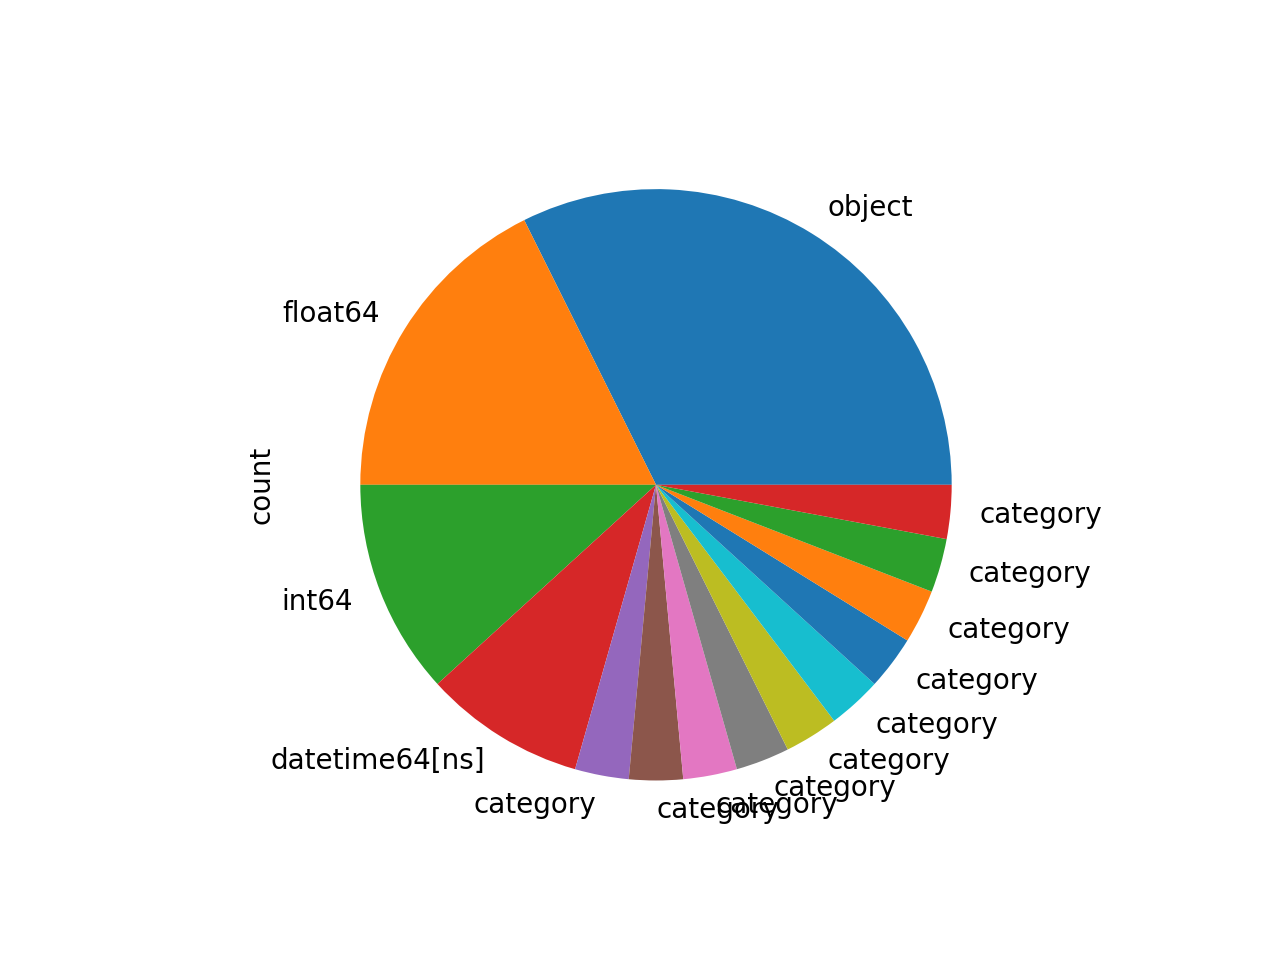

In [236]:
display(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

In [237]:
df.head()

,DateOfCall,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,AddressQualifier,Postcode_district,IncGeo_BoroughName,Latitude,Longitude,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,NumCalls,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeArrived,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DateOfCall_Dayofweek,DateOfCall_Quarter,DateOfCall_Month,DateOfCall_Dayofyear,DateOfCall_Dayofmonth,DateOfCall_Weekofyear,DateOfCall_In_Ceconds,MinutesOfCall
0,2009-01-01,2009,0,Special Service,Special Service,Road Vehicle,In street close to gazetteer location,SW11,WANDSWORTH,51.475812,-0.148894,319.0,2.0,2.0,2,60,1.0,H271,1,2009-01-01 00:02:00,2009-01-01 00:07:00,Battersea,1,1,Initial,Initial Mobilisation,3,1,1,1,1,1,1230768000000000000,0
1,2009-01-01,2009,0,Fire,Secondary Fire,Outdoor,In street outside gazetteer location,N9,ENFIELD,51.633342,-0.068488,308.0,1.0,1.0,1,60,2.0,A341,1,2009-01-01 00:04:00,2009-01-01 00:09:00,Edmonton,1,1,Initial,Initial Mobilisation,3,1,1,1,1,1,1230768000000000000,3
2,2009-01-01,2009,0,Fire,Secondary Fire,Outdoor,On land associated with building,UB10,HILLINGDON,51.533882,-0.448089,210.0,1.0,1.0,1,60,2.0,G232,1,2009-01-01 00:04:00,2009-01-01 00:08:00,Hillingdon,1,1,Initial,Initial Mobilisation,3,1,1,1,1,1,1230768000000000000,4
3,2009-01-01,2009,0,Fire,Secondary Fire,Outdoor,In street outside gazetteer location,N7,ISLINGTON,51.551441,-0.111120,233.0,1.0,2.0,2,60,1.0,A311,1,2009-01-01 00:06:00,2009-01-01 00:09:00,Holloway,1,1,Initial,Initial Mobilisation,3,1,1,1,1,1,1230768000000000000,5
4,2009-01-01,2009,0,False Alarm,AFA,Dwelling,Correct incident location,NW5,CAMDEN,51.551297,-0.134346,172.0,1.0,2.0,2,60,1.0,A432,1,2009-01-01 00:06:00,2009-01-01 00:09:00,Kentish Town,1,1,Initial,Initial Mobilisation,3,1,1,1,1,1,1230768000000000000,6


- Colonnes ['IncidentGroup','StopCodeDescription','PropertyCategory','AddressQualifier','Postcode_district','IncGeo_BoroughName','IncGeo_WardNameNew']

In [238]:
#for col in ['IncidentGroup','StopCodeDescription','PropertyCategory','AddressQualifier','Postcode_district','IncGeo_BoroughName','IncGeo_WardNameNew']:
#    if(set([col]).issubset(df.columns)) and df[col].dtype =='O':
#        df[col] = pd.Categorical(df[col]).codes

- Colonnes ['NumPumpsAttending']

In [239]:
df['NumPumpsAttending'] = df['NumPumpsAttending'].astype('category')
df['NumPumpsAttending'].value_counts()

NumPumpsAttending
1.0    1033723
2.0     512207
Name: count, dtype: int64

- Colonnes ['PumpCount']

In [240]:
df['PumpCount'] = df['PumpCount'].astype('category')
df['PumpCount'].value_counts()

PumpCount
1    927883
2    508415
3    109632
Name: count, dtype: int64

- Colonnes ['NumCalls']

In [241]:
df['NumCalls'] = df['NumCalls'].astype('category')
df['NumCalls'].value_counts()

NumCalls
1.0    1314209
2.0     187506
3.0      32458
4.0      11757
Name: count, dtype: int64

- Colonnes ['PumpOrder']

In [242]:
df['PumpOrder'] = df['PumpOrder'].astype('category')
df['PumpOrder'].value_counts()

PumpOrder
1    1492291
2      46399
3       4456
4       1581
5       1153
6         44
7          5
9          1
Name: count, dtype: int64

- Colonnes ['NumStationsWithPumpsAttending']

In [243]:

df['NumStationsWithPumpsAttending'] = df['NumStationsWithPumpsAttending'].astype('category')
df['NumStationsWithPumpsAttending'].value_counts()

NumStationsWithPumpsAttending
1.0    1148092
2.0     397838
Name: count, dtype: int64

- Colonnes ['FirstPumpArriving_AttendanceTime']

In [244]:
if(set(['FirstPumpArriving_AttendanceTime']).issubset(df.columns)):
    df['FirstPumpArriving_AttendanceTime_InMinutes'] = df['FirstPumpArriving_AttendanceTime'] / 60
    df = df.drop(['FirstPumpArriving_AttendanceTime'],axis=1)

In [245]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 1545930 entries, 0 to 1545942
Data columns (total 34 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   DateOfCall                                  1545930 non-null  datetime64[ns]
 1   CalYear                                     1545930 non-null  category      
 2   HourOfCall                                  1545930 non-null  category      
 3   IncidentGroup                               1545930 non-null  object        
 4   StopCodeDescription                         1545930 non-null  object        
 5   PropertyCategory                            1545930 non-null  object        
 6   AddressQualifier                            1545930 non-null  object        
 7   Postcode_district                           1545930 non-null  object        
 8   IncGeo_BoroughName                          1545930 non-null  objec

Index(['DateOfCall', 'CalYear', 'HourOfCall', 'IncidentGroup',
       'StopCodeDescription', 'PropertyCategory', 'AddressQualifier',
       'Postcode_district', 'IncGeo_BoroughName', 'Latitude', 'Longitude',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'NumCalls', 'Resource_Code',
       'PerformanceReporting', 'DateAndTimeMobilised', 'DateAndTimeArrived',
       'DeployedFromStation_Name', 'DeployedFromLocation', 'PumpOrder',
       'PlusCode_Code', 'PlusCode_Description', 'DateOfCall_Dayofweek',
       'DateOfCall_Quarter', 'DateOfCall_Month', 'DateOfCall_Dayofyear',
       'DateOfCall_Dayofmonth', 'DateOfCall_Weekofyear',
       'DateOfCall_In_Ceconds', 'MinutesOfCall',
       'FirstPumpArriving_AttendanceTime_InMinutes'],
      dtype='object')

#### **3.2.2 Variables qualitatives**

In [246]:
def analyse_variable_binaire(variable, base):

    print("Répartition de la variable: ", end="\n\n")

    print(base[variable].value_counts(normalize=True, dropna=False),
          end="\n\n")

    print("Matrice de contingence: ", end="\n\n")

    print(pd.crosstab(base[variable], base['Response'], normalize='index'))

    sns.countplot(x=variable, data=base)

    plt.title(f'Répartition de {variable} \n', fontsize=20)

    plt.show()

In [247]:
print(df.select_dtypes(include=[np.number]).columns)

Index(['Latitude', 'Longitude', 'PumpMinutesRounded', 'DateOfCall_In_Ceconds',
       'FirstPumpArriving_AttendanceTime_InMinutes'],
      dtype='object')


In [248]:
print(df.select_dtypes(exclude=[np.number]).columns)

Index(['DateOfCall', 'CalYear', 'HourOfCall', 'IncidentGroup',
       'StopCodeDescription', 'PropertyCategory', 'AddressQualifier',
       'Postcode_district', 'IncGeo_BoroughName',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'NumCalls', 'Resource_Code', 'PerformanceReporting',
       'DateAndTimeMobilised', 'DateAndTimeArrived',
       'DeployedFromStation_Name', 'DeployedFromLocation', 'PumpOrder',
       'PlusCode_Code', 'PlusCode_Description', 'DateOfCall_Dayofweek',
       'DateOfCall_Quarter', 'DateOfCall_Month', 'DateOfCall_Dayofyear',
       'DateOfCall_Dayofmonth', 'DateOfCall_Weekofyear', 'MinutesOfCall'],
      dtype='object')


In [249]:
print(len(df.select_dtypes(exclude=[np.number]).columns))
print(len(df.select_dtypes(include=[np.number]).columns))
print(len(df.select_dtypes(exclude=[np.number]).columns)+len(df.select_dtypes(include=[np.number]).columns))
print(len(df.columns))

29
5
34
34


In [250]:
df.isna().sum()

DateOfCall                                    0
CalYear                                       0
HourOfCall                                    0
IncidentGroup                                 0
StopCodeDescription                           0
PropertyCategory                              0
AddressQualifier                              0
Postcode_district                             0
IncGeo_BoroughName                            0
Latitude                                      0
Longitude                                     0
NumStationsWithPumpsAttending                 0
NumPumpsAttending                             0
PumpCount                                     0
PumpMinutesRounded                            0
NumCalls                                      0
Resource_Code                                 0
PerformanceReporting                          0
DateAndTimeMobilised                          0
DateAndTimeArrived                            0
DeployedFromStation_Name                

In [251]:
#categorical_features = list(incidents_df.select_dtypes(exclude=np.number).columns)
categorical_features = list(df.select_dtypes(exclude=[np.number]).columns)
for col in categorical_features:
    print(f'{col :-<50} {df[col].nunique()}')

DateOfCall---------------------------------------- 5513
CalYear------------------------------------------- 16
HourOfCall---------------------------------------- 24
IncidentGroup------------------------------------- 3
StopCodeDescription------------------------------- 9
PropertyCategory---------------------------------- 9
AddressQualifier---------------------------------- 11
Postcode_district--------------------------------- 324
IncGeo_BoroughName-------------------------------- 33
NumStationsWithPumpsAttending--------------------- 2
NumPumpsAttending--------------------------------- 2
PumpCount----------------------------------------- 3
NumCalls------------------------------------------ 4
Resource_Code------------------------------------- 187
PerformanceReporting------------------------------ 3
DateAndTimeMobilised------------------------------ 1386081
DateAndTimeArrived-------------------------------- 1382667
DeployedFromStation_Name-------------------------- 117
DeployedFromLocation-

**DateOfCall---------------------------------------- Trop de valeur à afficher**

**CalYear------------------------------------------- [2009, 2010, 2011, 2012, 2013, ..., 2020, 2021, 2022, 2023, 2024]
Length: 16
Categories (16, int64): [2009, 2010, 2011, 2012, ..., 2021, 2022, 2023, 2024]**

CalYear
2009    0.078403
2023    0.077571
2022    0.076428
2010    0.071385
2011    0.066422
2021    0.066030
2018    0.064380
2019    0.064022
2016    0.063182
2017    0.062887
2012    0.062602
2020    0.060496
2013    0.060237
2014    0.056676
2015    0.049665
2024    0.019613
Name: proportion, dtype: float64

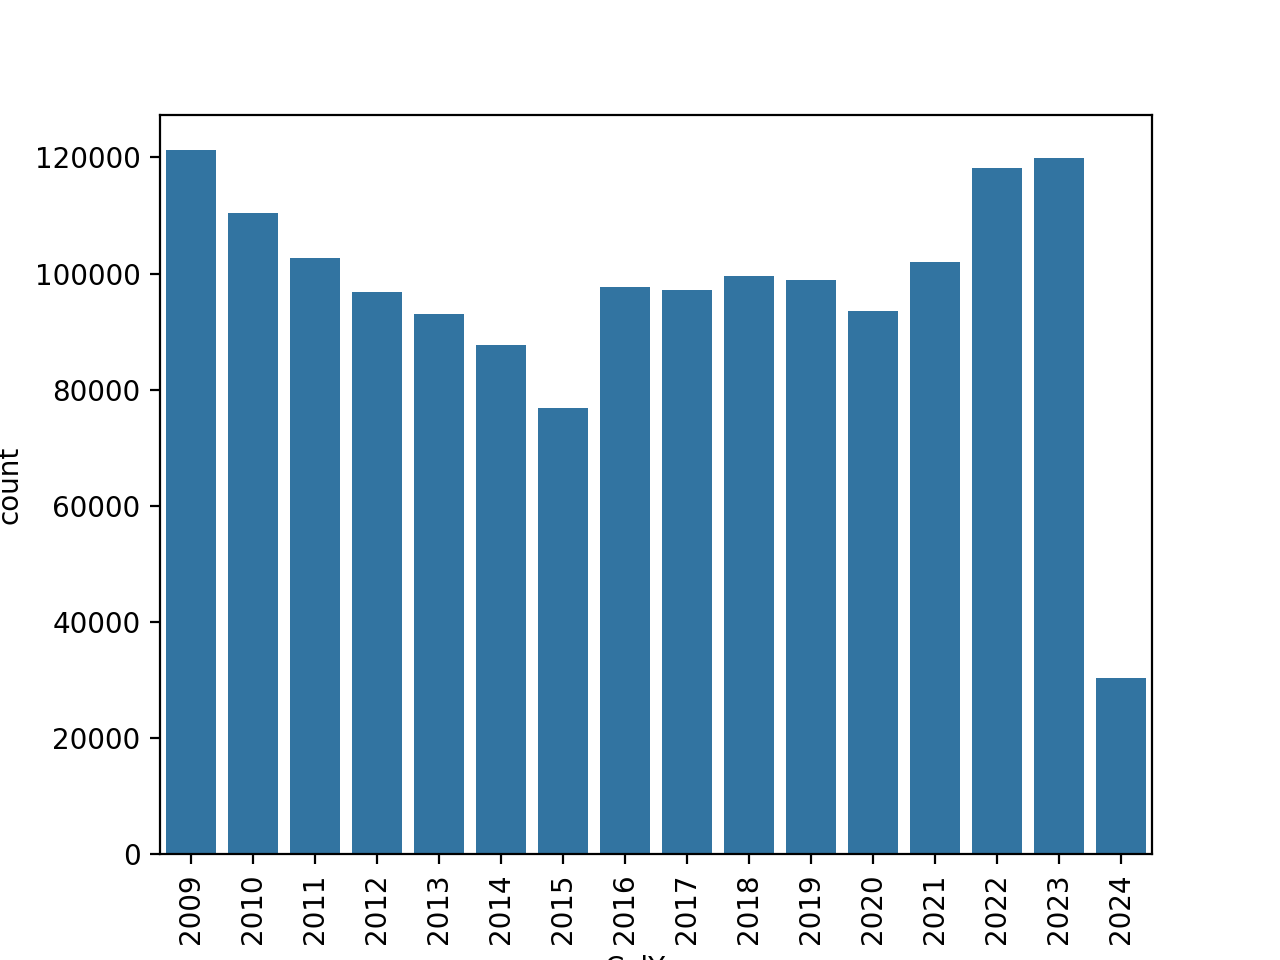

**HourOfCall---------------------------------------- [0, 1, 2, 3, 4, ..., 19, 20, 21, 22, 23]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]**

HourOfCall
18    0.061650
19    0.060791
17    0.059678
20    0.056607
16    0.055949
15    0.054319
13    0.053580
14    0.053570
12    0.052128
21    0.050878
11    0.050606
10    0.047336
22    0.044951
9     0.043783
23    0.038541
8     0.036072
0     0.032530
7     0.026801
1     0.026585
2     0.021854
3     0.019241
6     0.019098
4     0.017049
5     0.016402
Name: proportion, dtype: float64

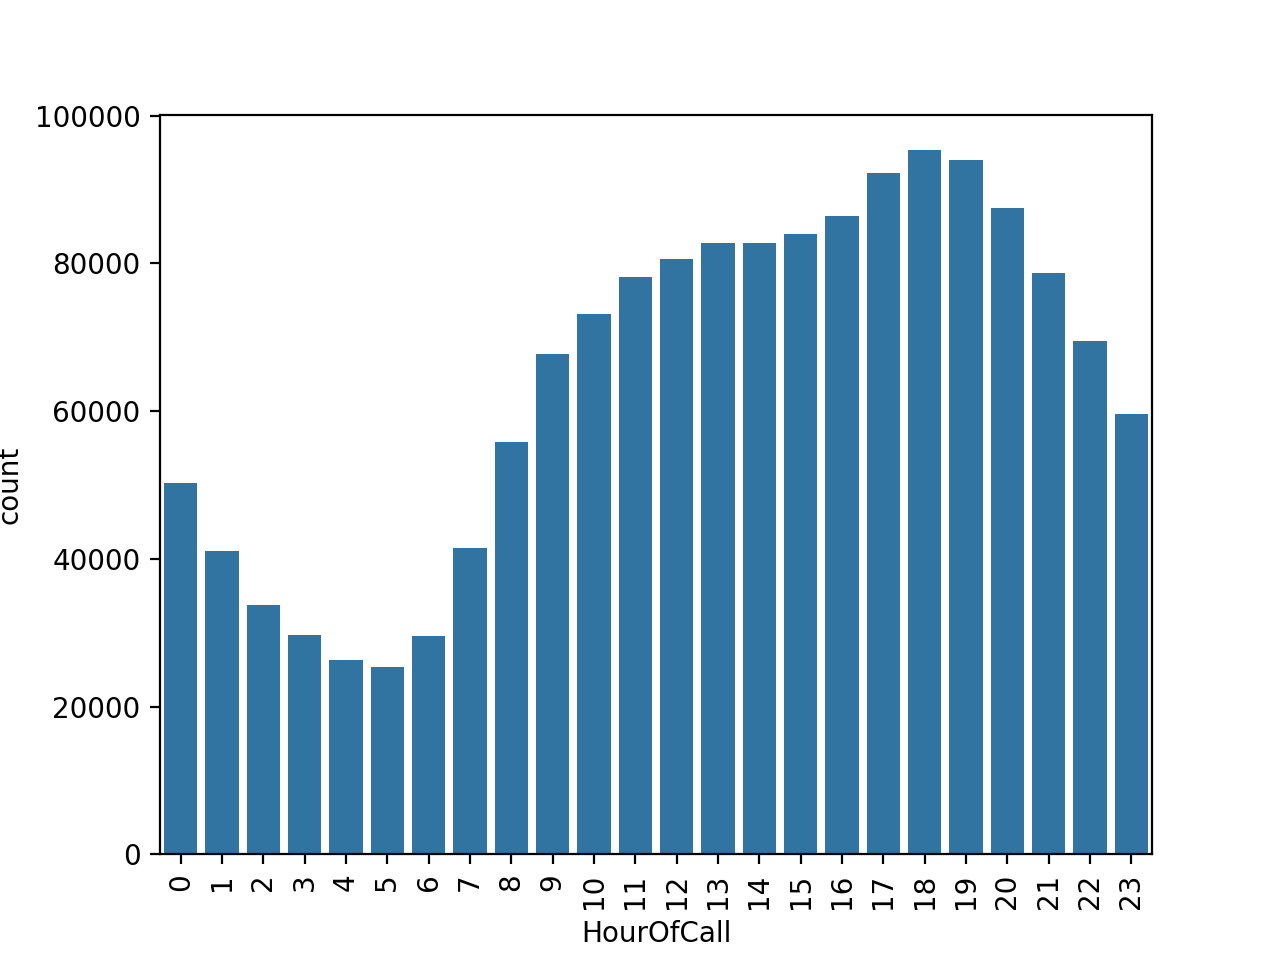

**IncidentGroup------------------------------------- ['Special Service' 'Fire' 'False Alarm']**

IncidentGroup
False Alarm        0.519485
Special Service    0.284527
Fire               0.195988
Name: proportion, dtype: float64

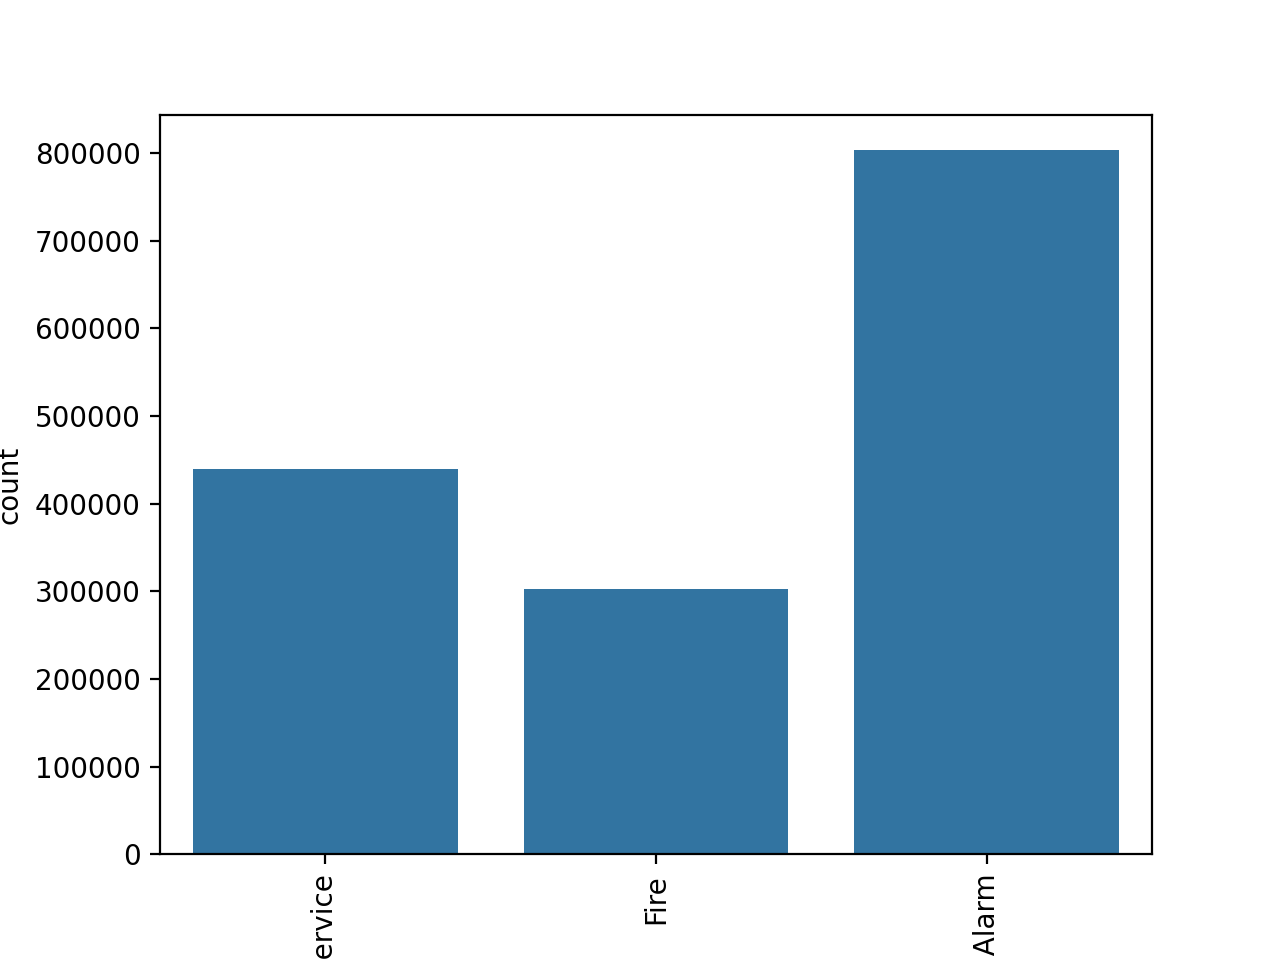

**StopCodeDescription------------------------------- ['Special Service' 'Secondary Fire' 'AFA' 'False alarm - Good intent'
 'Primary Fire' 'False alarm - Malicious' 'Chimney Fire' 'Late Call'
 'Use of Special Operations Room']**

StopCodeDescription
AFA                               0.394592
Special Service                   0.284521
False alarm - Good intent         0.111164
Primary Fire                      0.101470
Secondary Fire                    0.094050
False alarm - Malicious           0.013730
Chimney Fire                      0.000349
Late Call                         0.000119
Use of Special Operations Room    0.000006
Name: proportion, dtype: float64

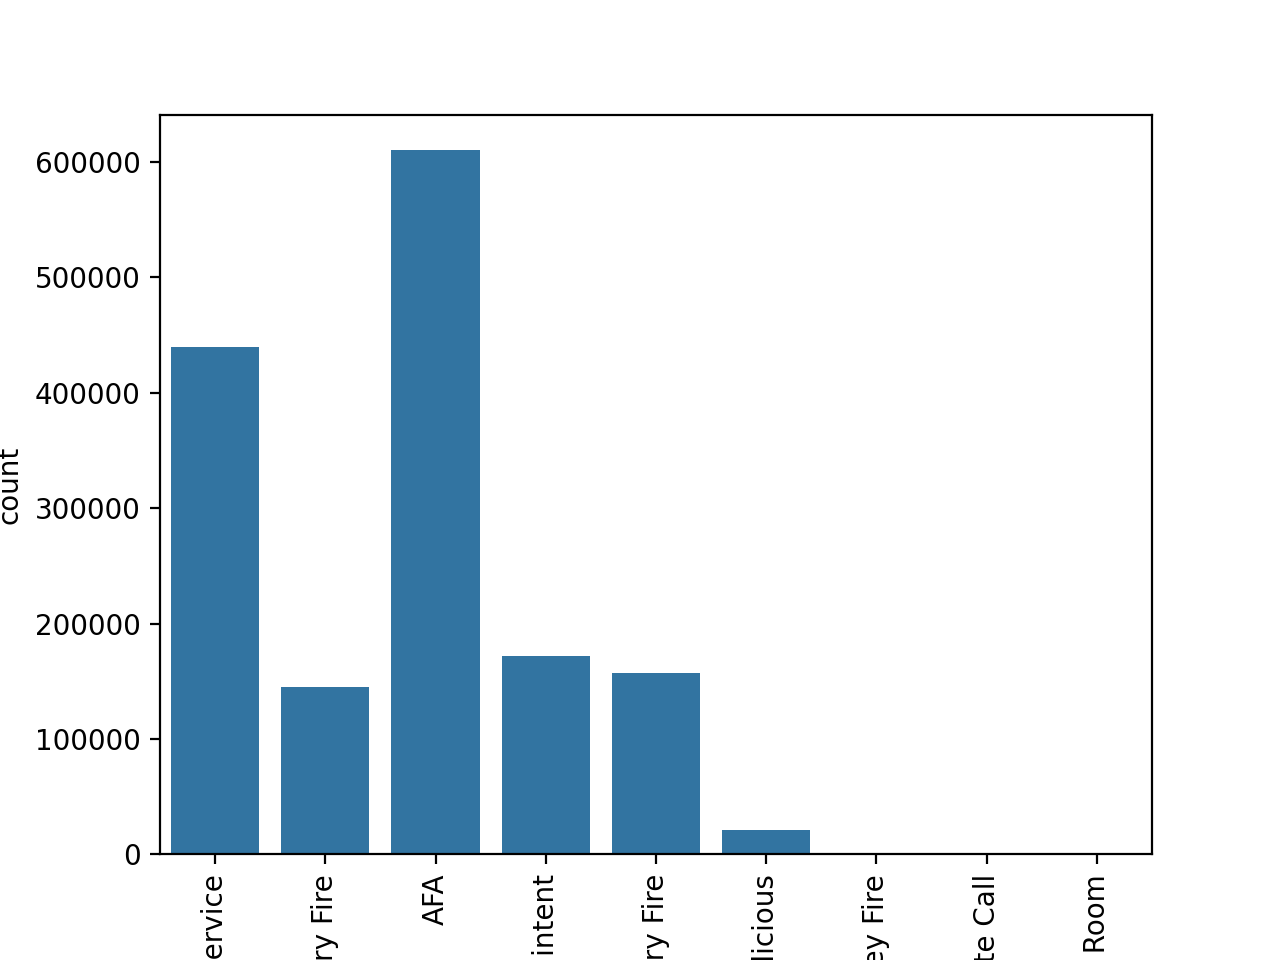

**PropertyCategory---------------------------------- ['Road Vehicle' 'Outdoor' 'Dwelling' 'Outdoor Structure'
 'Other Residential' 'Non Residential' 'Aircraft' 'Rail Vehicle' 'Boat']**

PropertyCategory
Dwelling             0.477153
Non Residential      0.237185
Outdoor              0.087795
Road Vehicle         0.075308
Other Residential    0.062064
Outdoor Structure    0.058468
Rail Vehicle         0.000880
Aircraft             0.000719
Boat                 0.000428
Name: proportion, dtype: float64

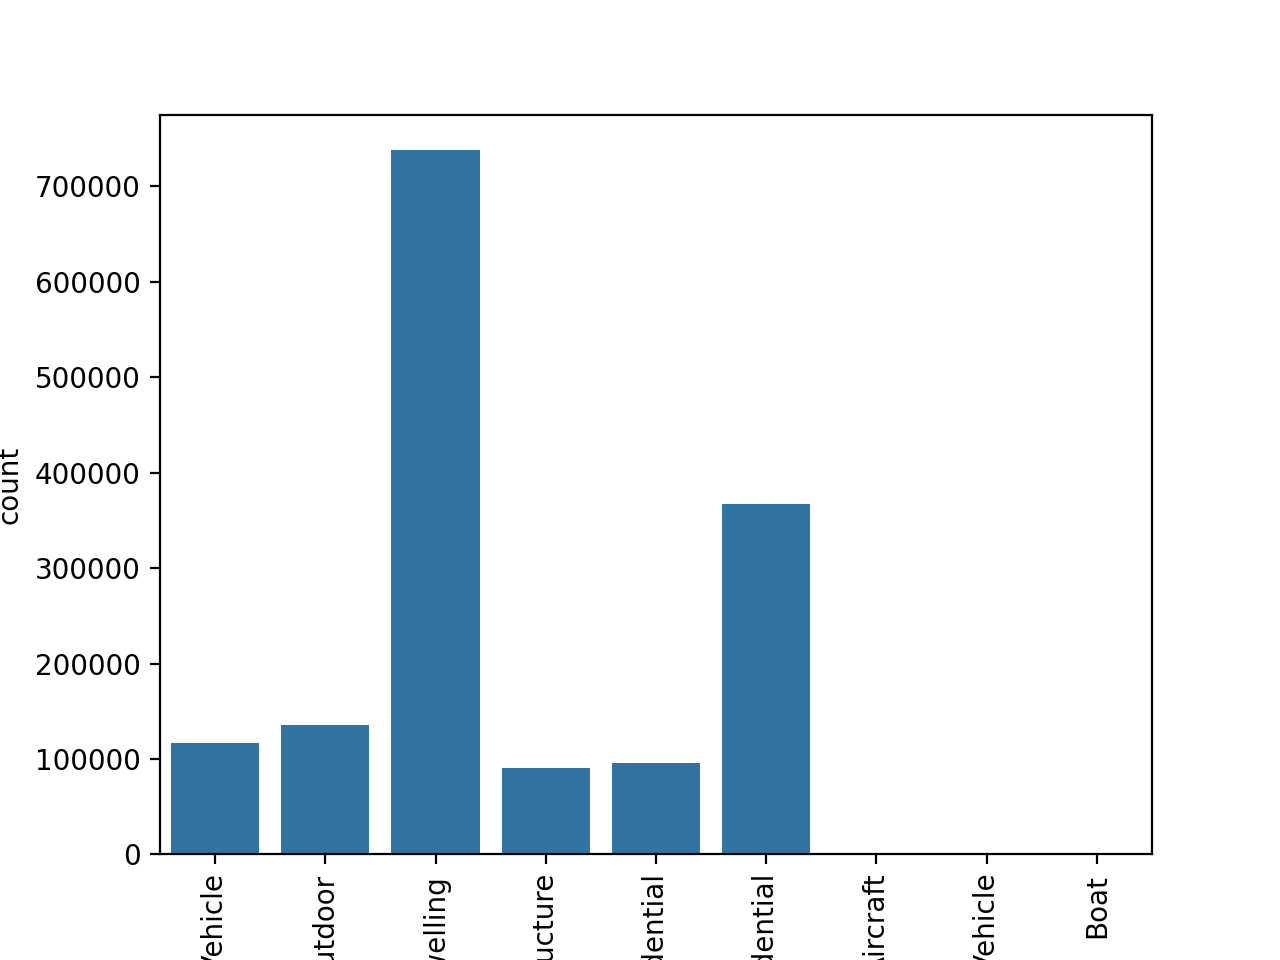

**AddressQualifier---------------------------------- ['In street close to gazetteer location'
 'In street outside gazetteer location' 'On land associated with building'
 'Correct incident location' 'On motorway / elevated road'
 'In street remote from gazetteer location' 'Within same building'
 'Nearby address - street not listed in gazetteer'
 'Open land/water - nearest gazetteer location'
 'Nearby address - no building in street' 'Railway land or rolling stock']**

AddressQualifier
Correct incident location                          0.571585
Within same building                               0.199169
In street outside gazetteer location               0.073692
On land associated with building                   0.061198
In street close to gazetteer location              0.045842
Open land/water - nearest gazetteer location       0.028160
Nearby address - street not listed in gazetteer    0.006515
In street remote from gazetteer location           0.004719
Nearby address - no building in street             0.004580
On motorway / elevated road                        0.003303
Railway land or rolling stock                      0.001239
Name: proportion, dtype: float64

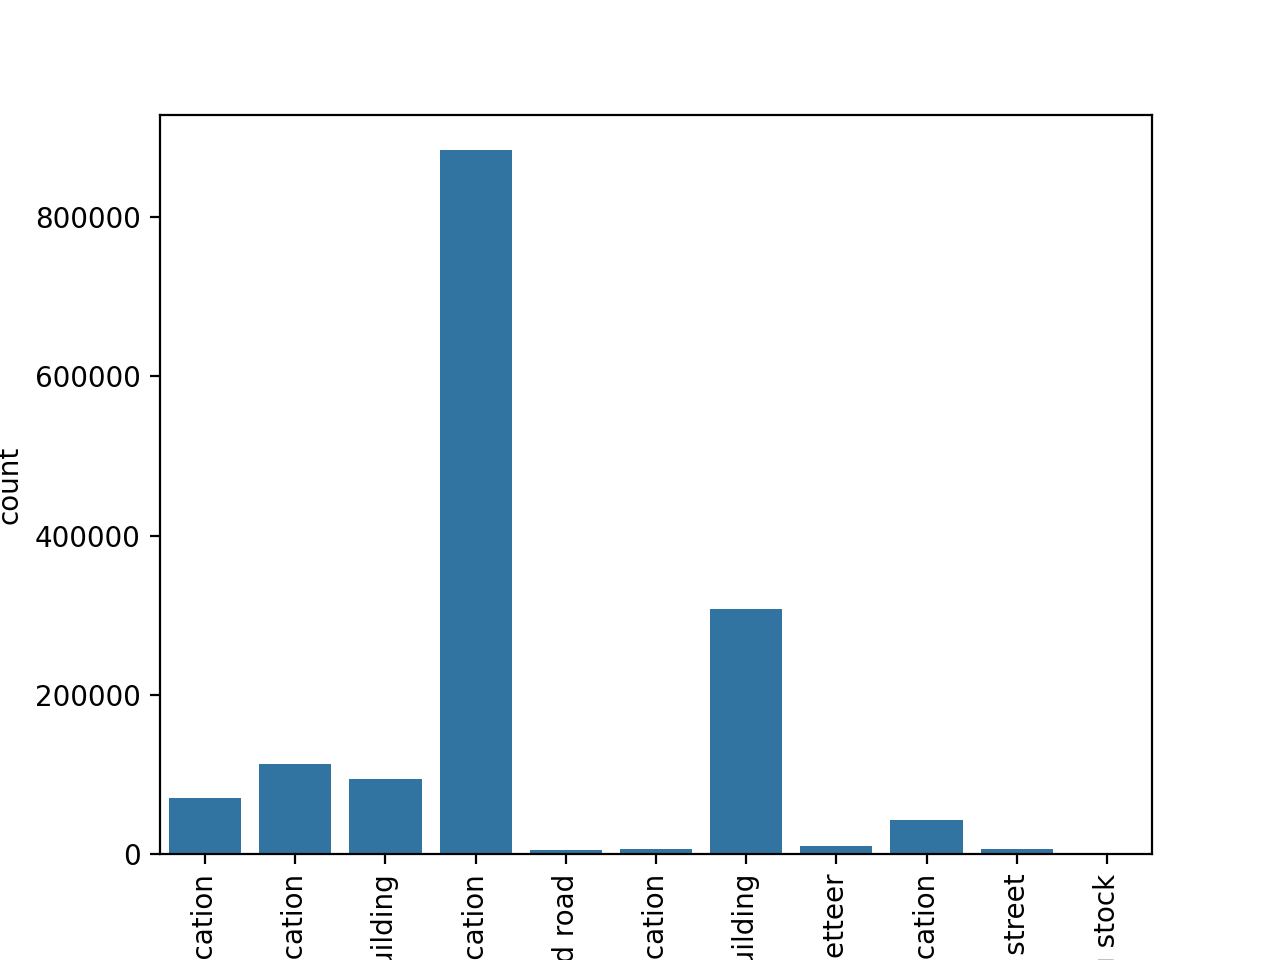

**Postcode_district--------------------------------- Trop de valeur à afficher**

**IncGeo_BoroughName-------------------------------- ['WANDSWORTH' 'ENFIELD' 'HILLINGDON' 'ISLINGTON' 'CAMDEN' 'GREENWICH'
 'HOUNSLOW' 'SOUTHWARK' 'HACKNEY' 'CITY OF LONDON' 'BROMLEY' 'MERTON'
 'KENSINGTON AND CHELSEA' 'NEWHAM' 'LAMBETH' 'REDBRIDGE' 'TOWER HAMLETS'
 'WALTHAM FOREST' 'LEWISHAM' 'WESTMINSTER' 'CROYDON'
 'RICHMOND UPON THAMES' 'BARNET' 'BRENT' 'HARINGEY' 'BEXLEY'
 'BARKING AND DAGENHAM' 'HAMMERSMITH AND FULHAM' 'HAVERING' 'EALING'
 'KINGSTON UPON THAMES' 'SUTTON' 'HARROW']**

IncGeo_BoroughName
WESTMINSTER               0.073534
CAMDEN                    0.048273
SOUTHWARK                 0.044352
TOWER HAMLETS             0.043378
LAMBETH                   0.041822
CROYDON                   0.038643
HACKNEY                   0.037867
LEWISHAM                  0.035153
EALING                    0.033892
BARNET                    0.033731
NEWHAM                    0.033492
HILLINGDON                0.033148
ISLINGTON                 0.031828
KENSINGTON AND CHELSEA    0.031494
WANDSWORTH                0.031312
ENFIELD                   0.030916
BRENT                     0.029974
GREENWICH                 0.029935
BROMLEY                   0.028716
HAMMERSMITH AND FULHAM    0.028067
HARINGEY                  0.027983
WALTHAM FOREST            0.027758
HOUNSLOW                  0.025662
REDBRIDGE                 0.023304
HAVERING                  0.021573
BEXLEY                    0.020551
BARKING AND DAGENHAM      0.020036
HARROW                    0.017919
M

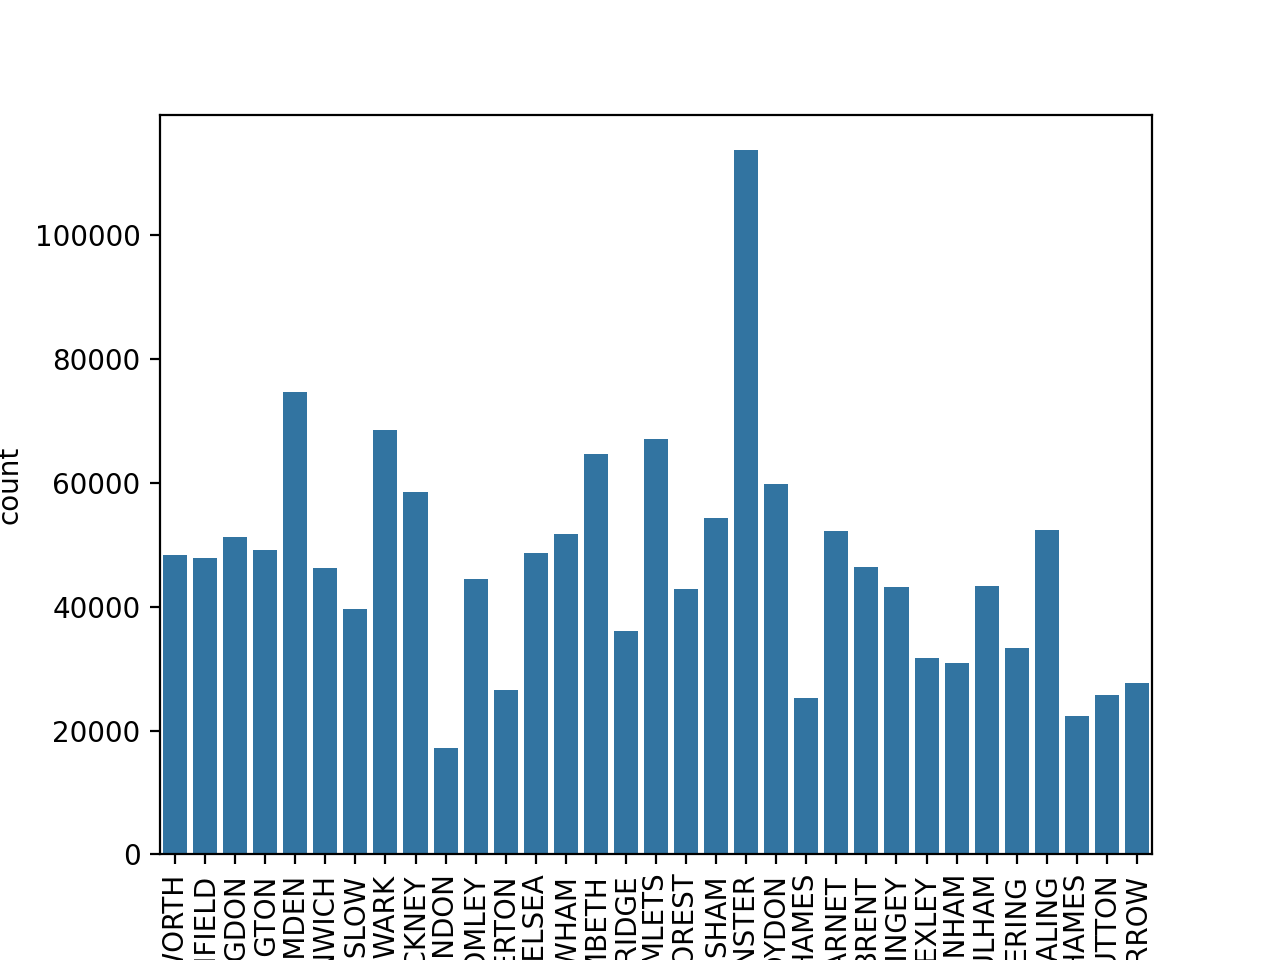

**NumStationsWithPumpsAttending--------------------- [2.0, 1.0]
Categories (2, float64): [1.0, 2.0]**

NumStationsWithPumpsAttending
1.0    0.742655
2.0    0.257345
Name: proportion, dtype: float64

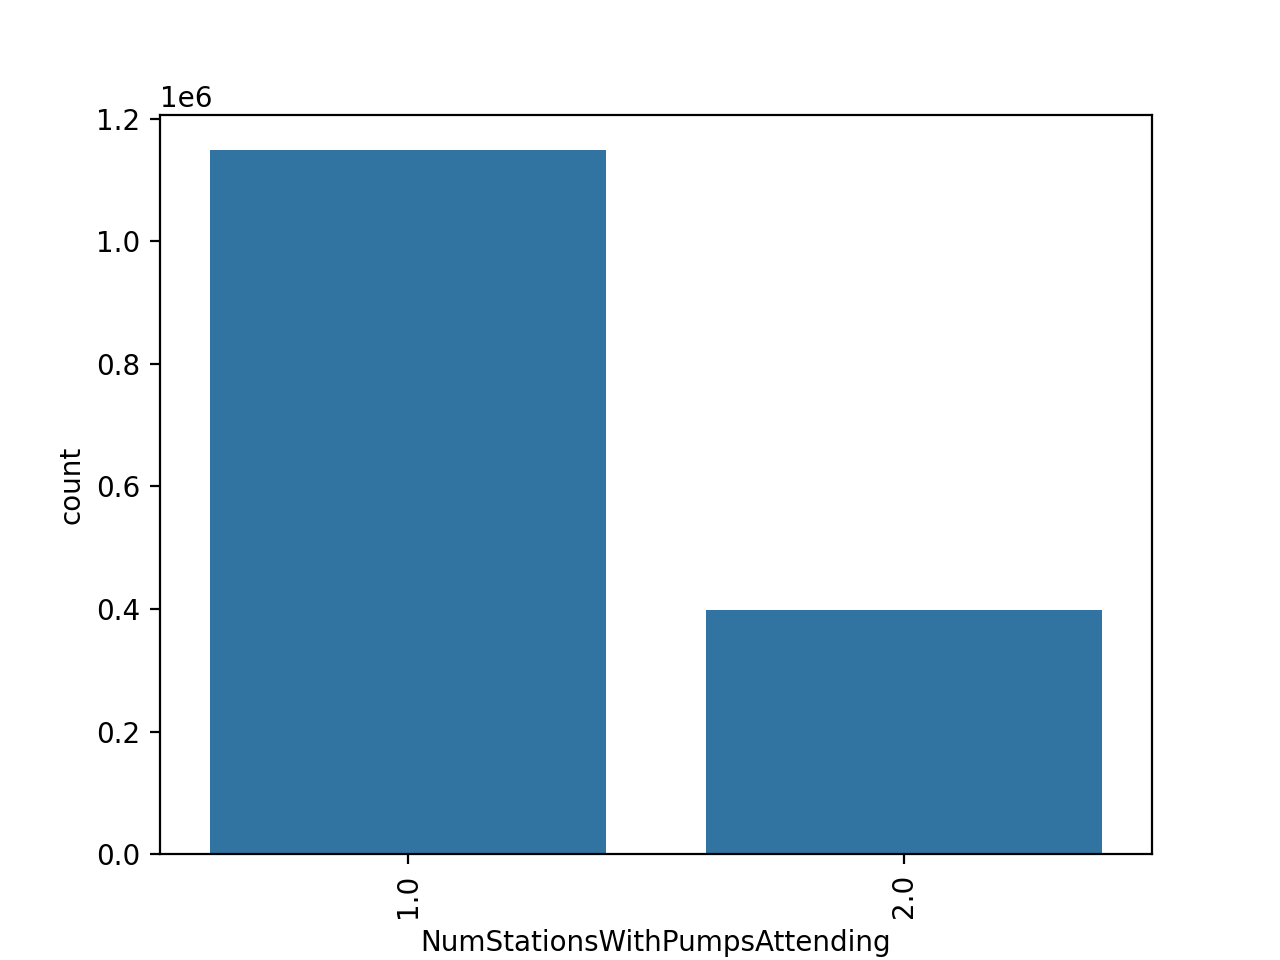

**NumPumpsAttending--------------------------------- [2.0, 1.0]
Categories (2, float64): [1.0, 2.0]**

NumPumpsAttending
1.0    0.668674
2.0    0.331326
Name: proportion, dtype: float64

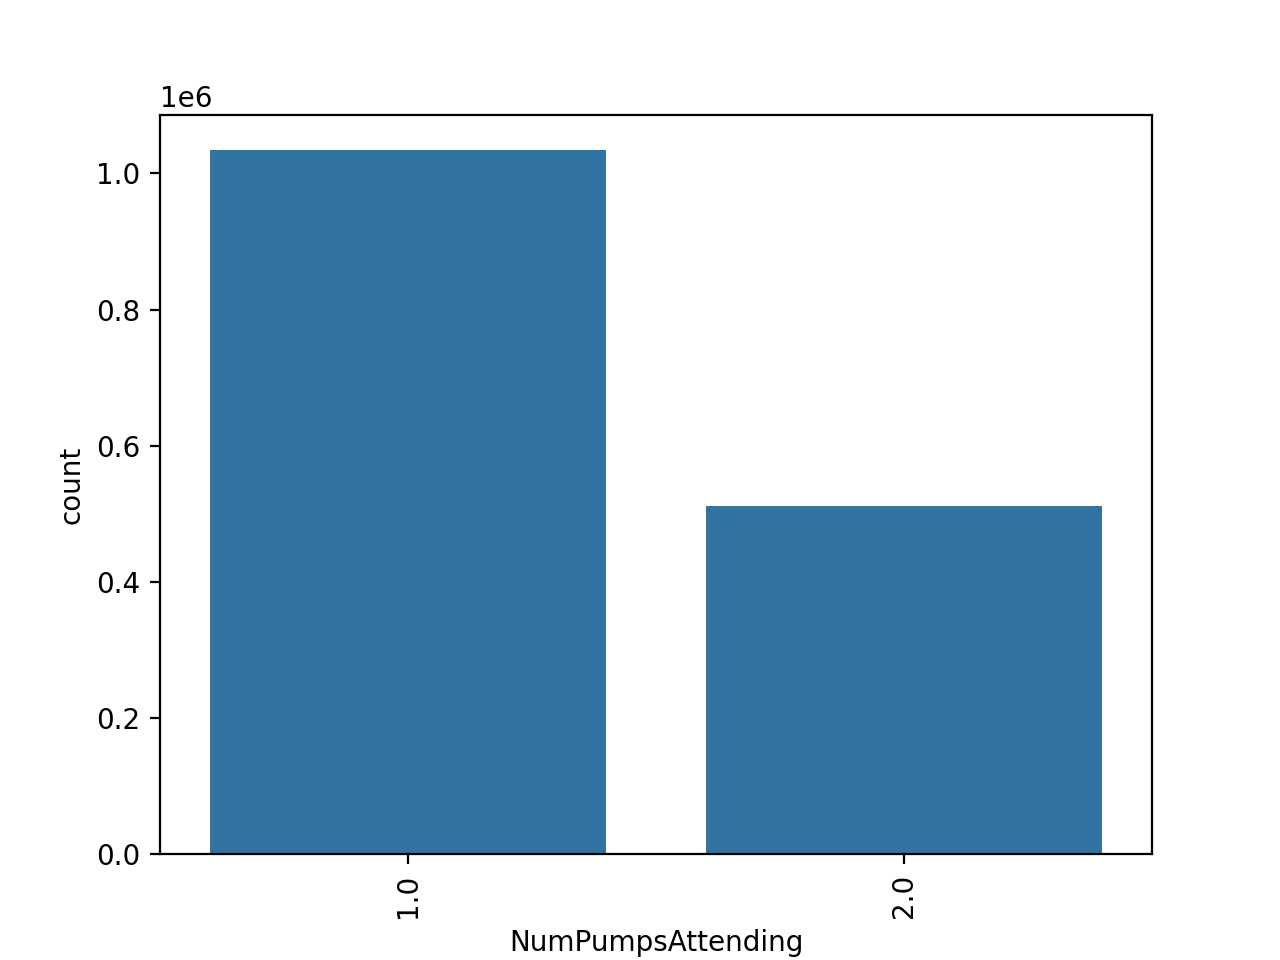

**PumpCount----------------------------------------- [2, 1, 3]
Categories (3, int64): [1, 2, 3]**

PumpCount
1    0.600210
2    0.328873
3    0.070917
Name: proportion, dtype: float64

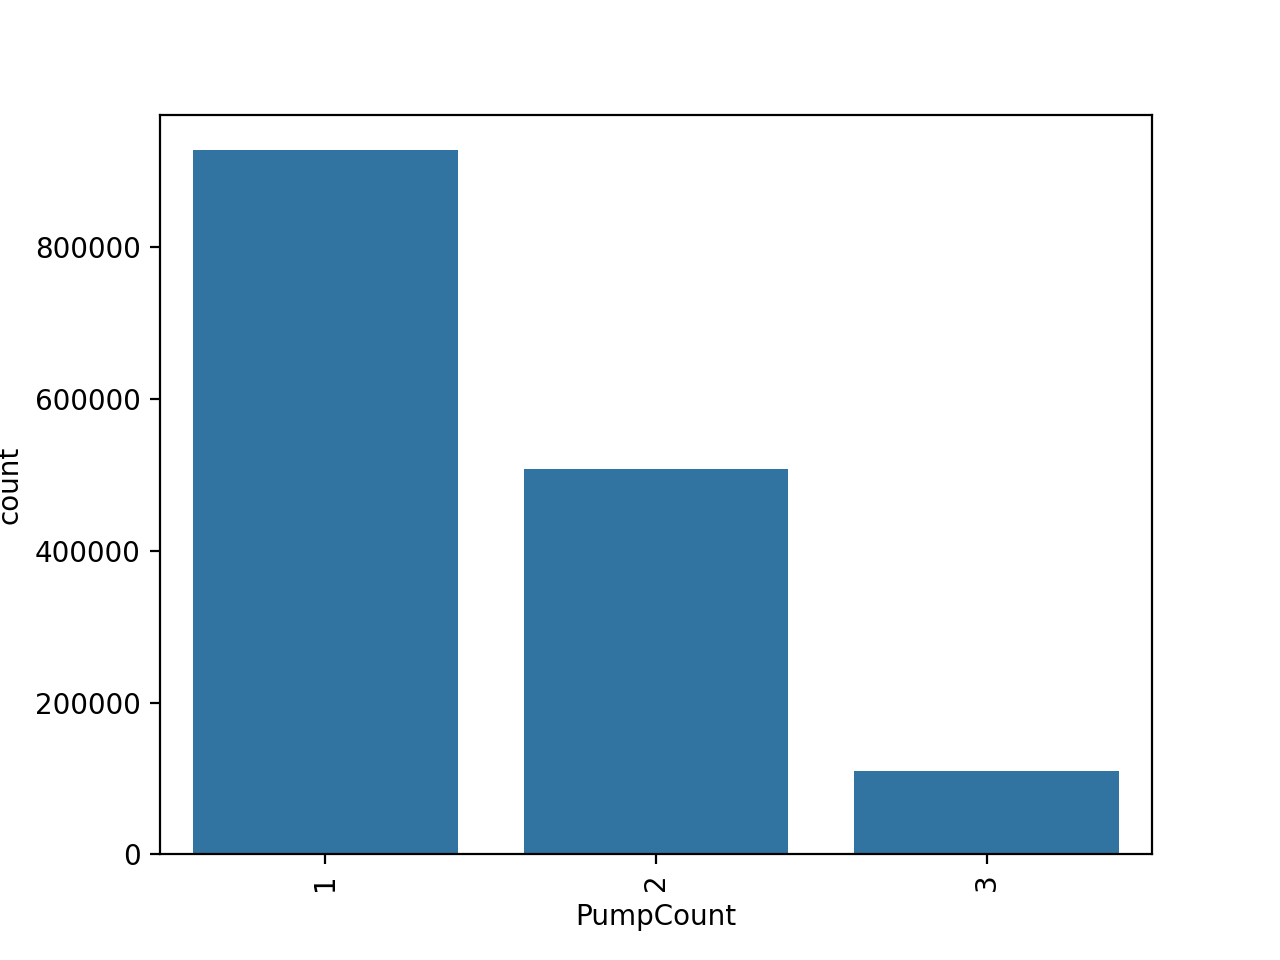

**NumCalls------------------------------------------ [1.0, 2.0, 3.0, 4.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]**

NumCalls
1.0    0.850109
2.0    0.121290
3.0    0.020996
4.0    0.007605
Name: proportion, dtype: float64

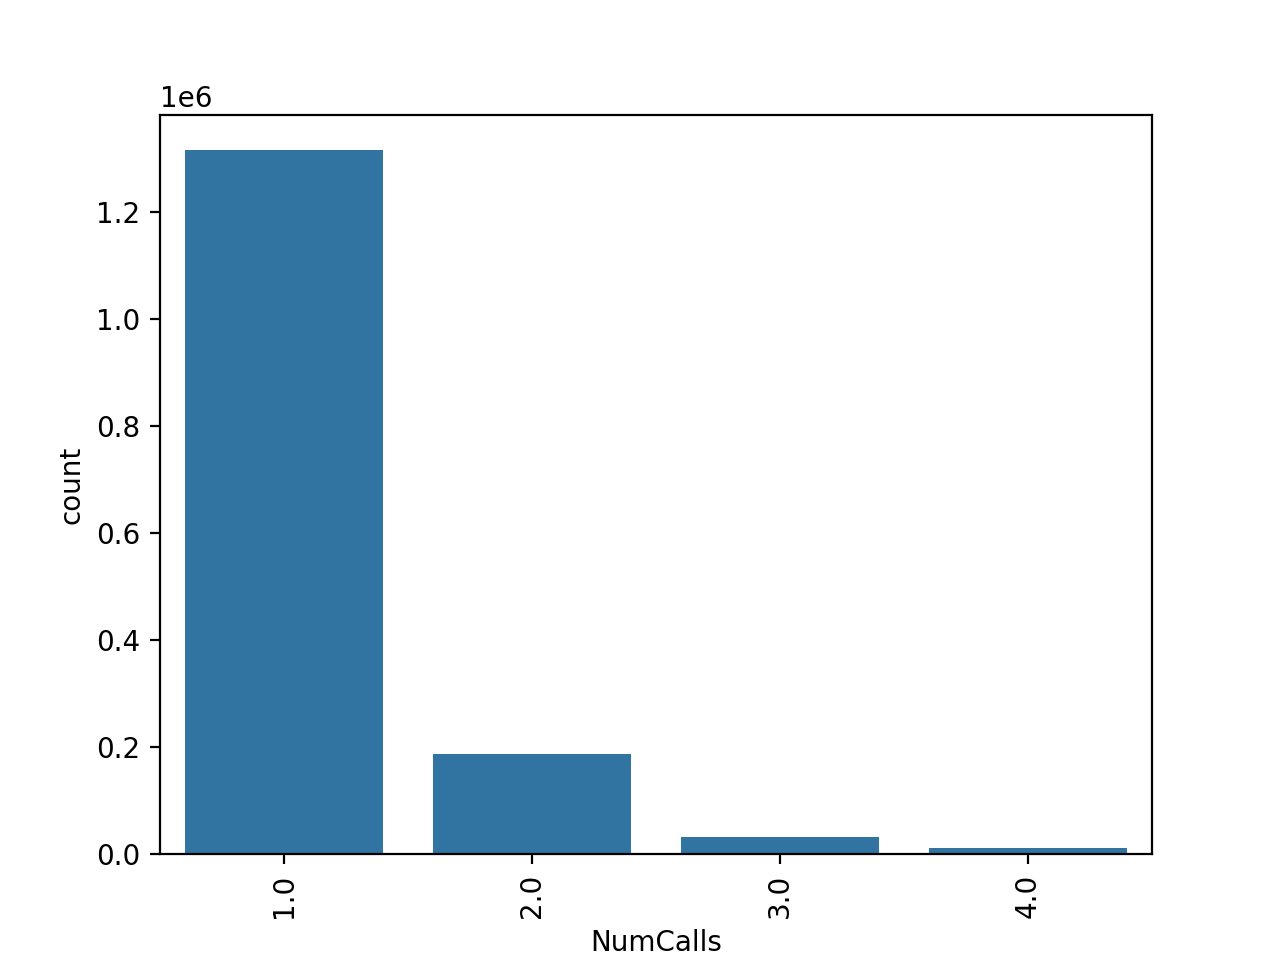

**Resource_Code------------------------------------- Trop de valeur à afficher**

**PerformanceReporting------------------------------ ['1' '2' 'Not Used']**

PerformanceReporting
1           0.965303
2           0.030014
Not Used    0.004683
Name: proportion, dtype: float64

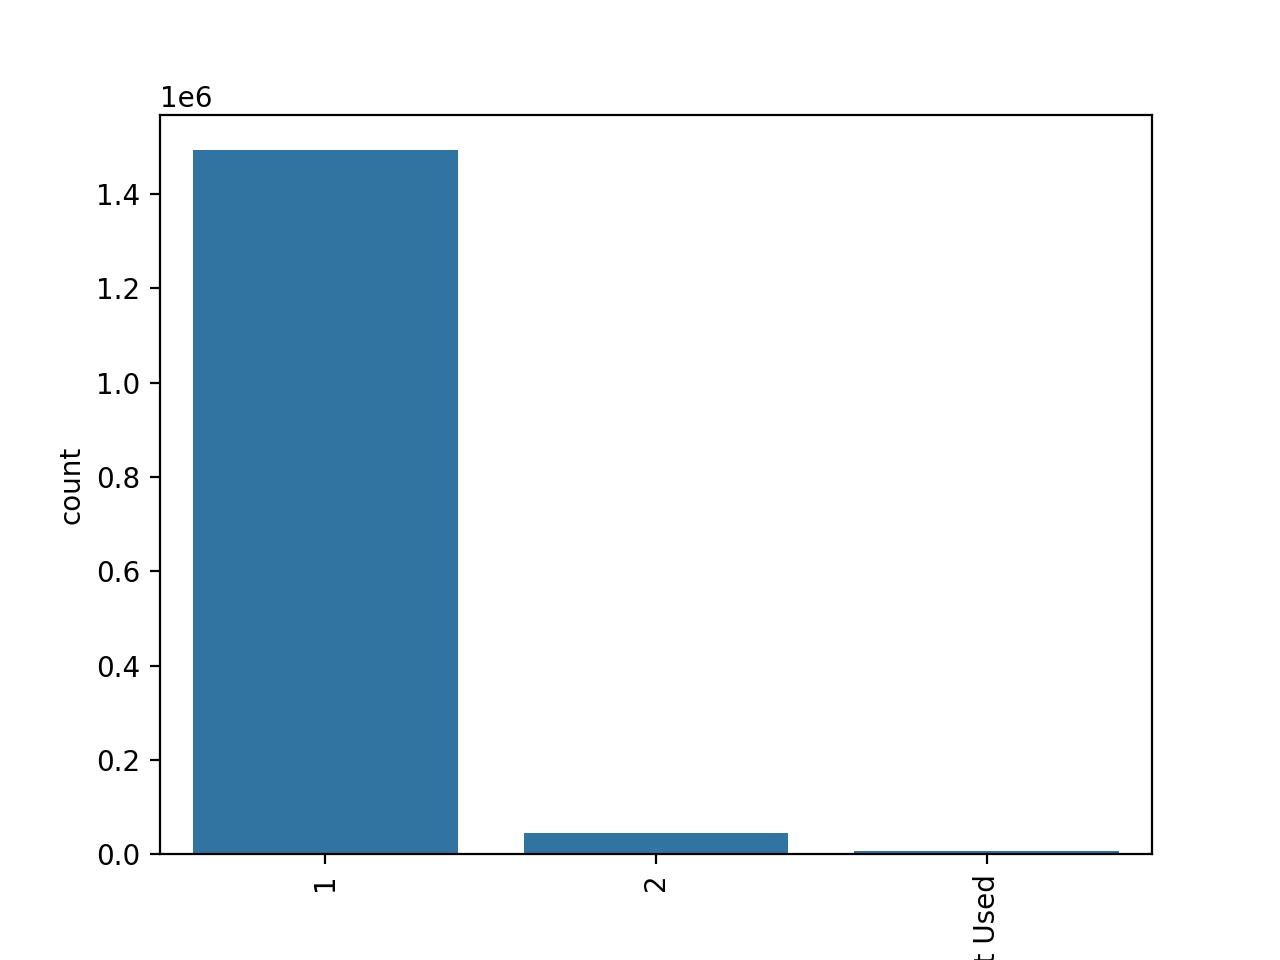

**DateAndTimeMobilised------------------------------ Trop de valeur à afficher**

**DateAndTimeArrived-------------------------------- Trop de valeur à afficher**

**DeployedFromStation_Name-------------------------- Trop de valeur à afficher**

**DeployedFromLocation------------------------------ [1, 0]
Categories (2, int64): [0, 1]**

DeployedFromLocation
1    0.966685
0    0.033315
Name: proportion, dtype: float64

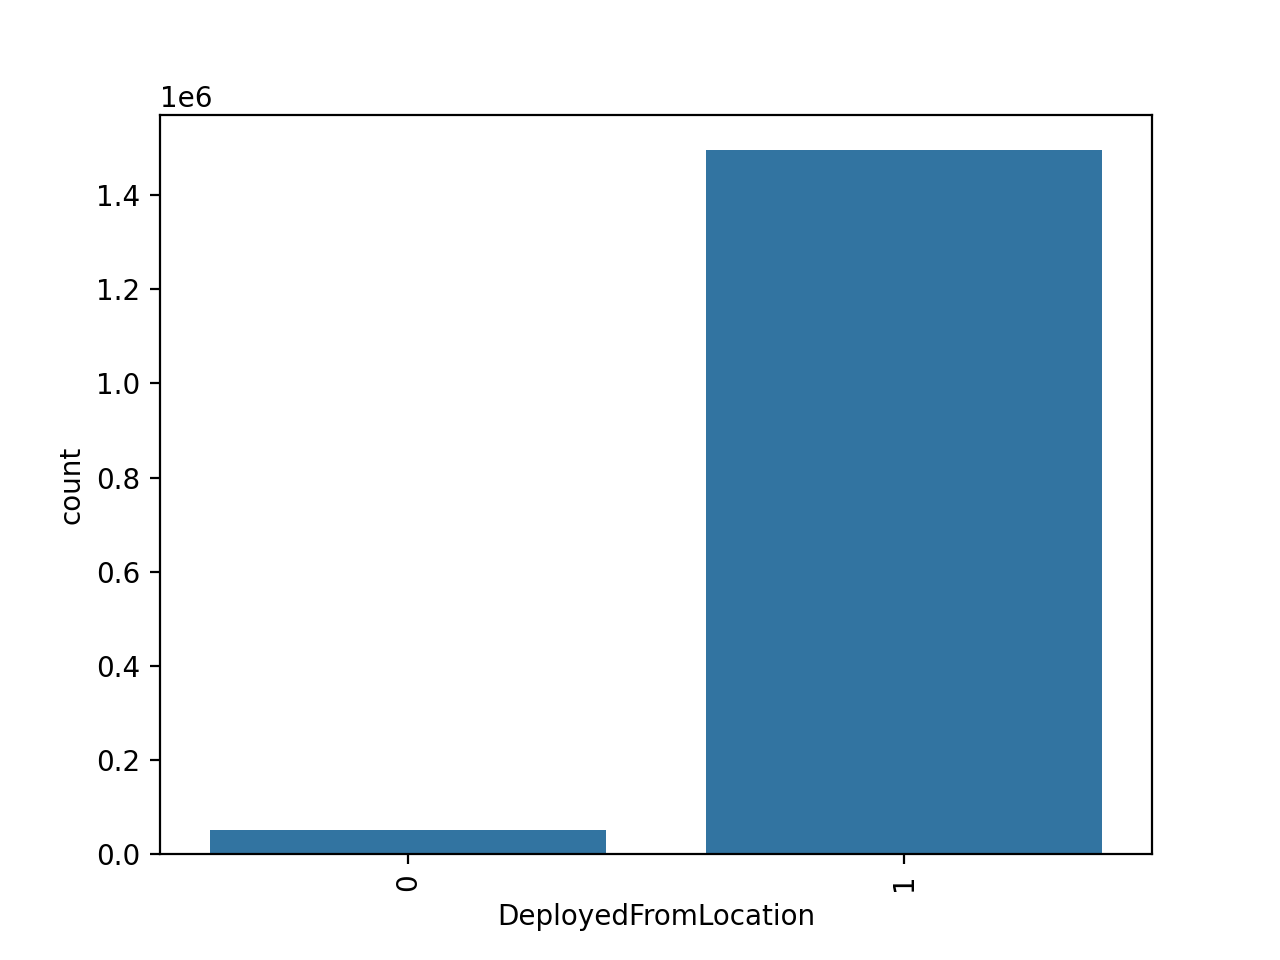

**PumpOrder----------------------------------------- [1, 2, 3, 4, 6, 5, 9, 7]
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 9]**

PumpOrder
1    9.653031e-01
2    3.001365e-02
3    2.882407e-03
4    1.022685e-03
5    7.458294e-04
6    2.846183e-05
7    3.234299e-06
9    6.468598e-07
Name: proportion, dtype: float64

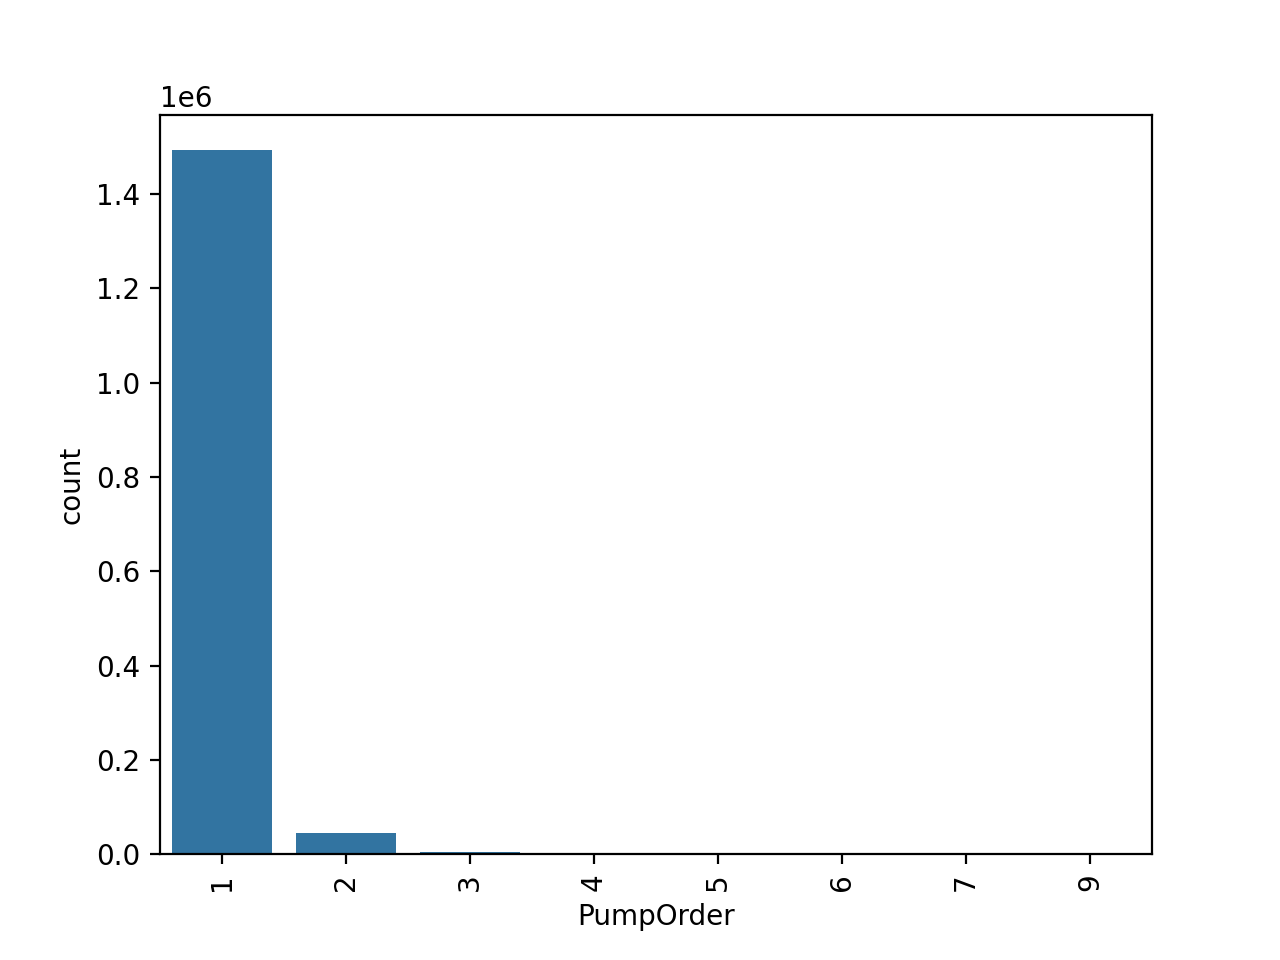

**PlusCode_Code------------------------------------- ['Initial' 'rca' 'add']**

PlusCode_Code
Initial    0.997517
rca        0.002277
add        0.000206
Name: proportion, dtype: float64

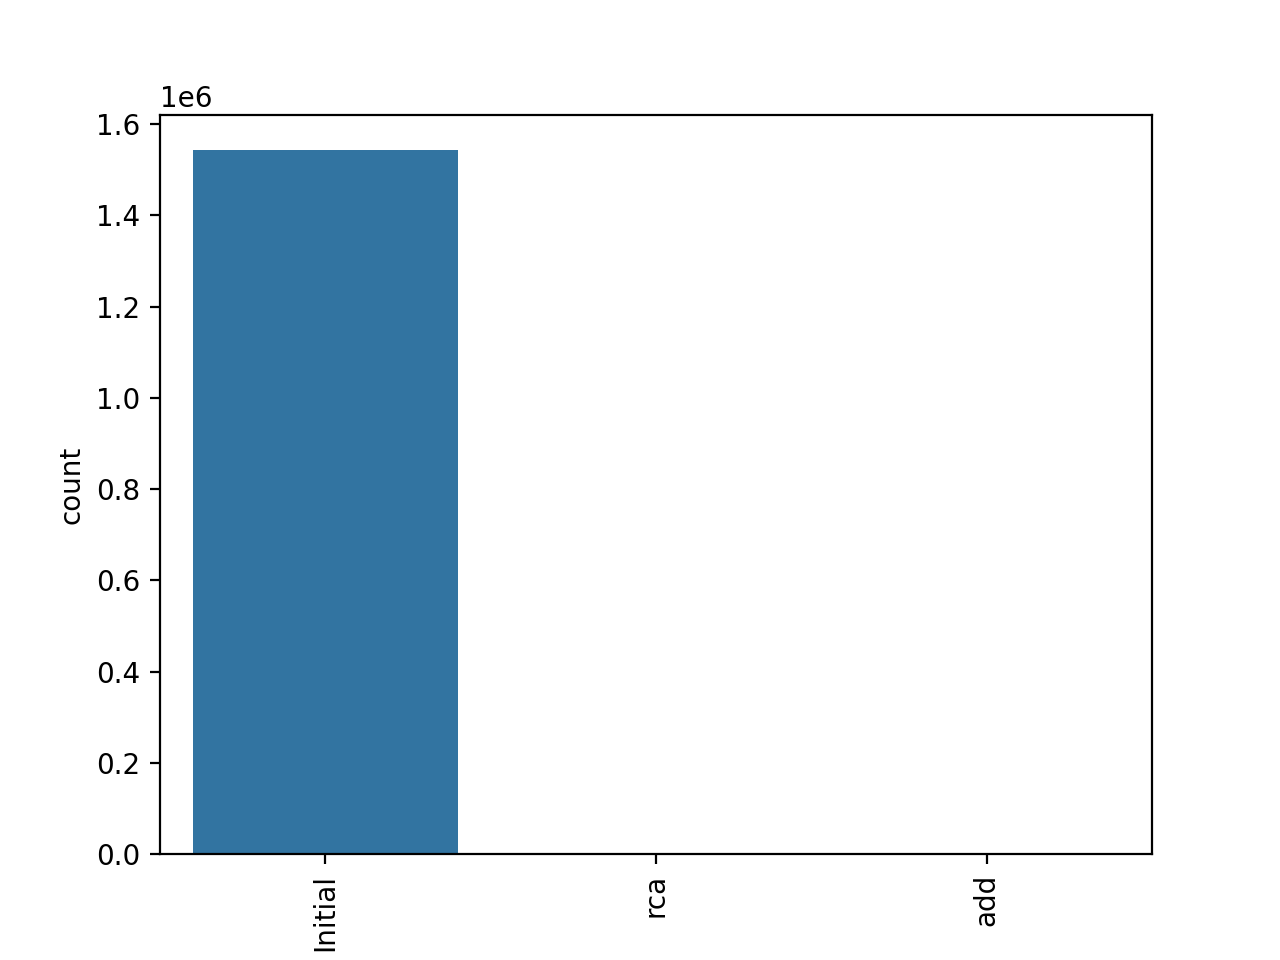

**PlusCode_Description------------------------------ ['Initial Mobilisation' 'Running call' 'Addition to first attendance']**

PlusCode_Description
Initial Mobilisation            0.997517
Running call                    0.002277
Addition to first attendance    0.000206
Name: proportion, dtype: float64

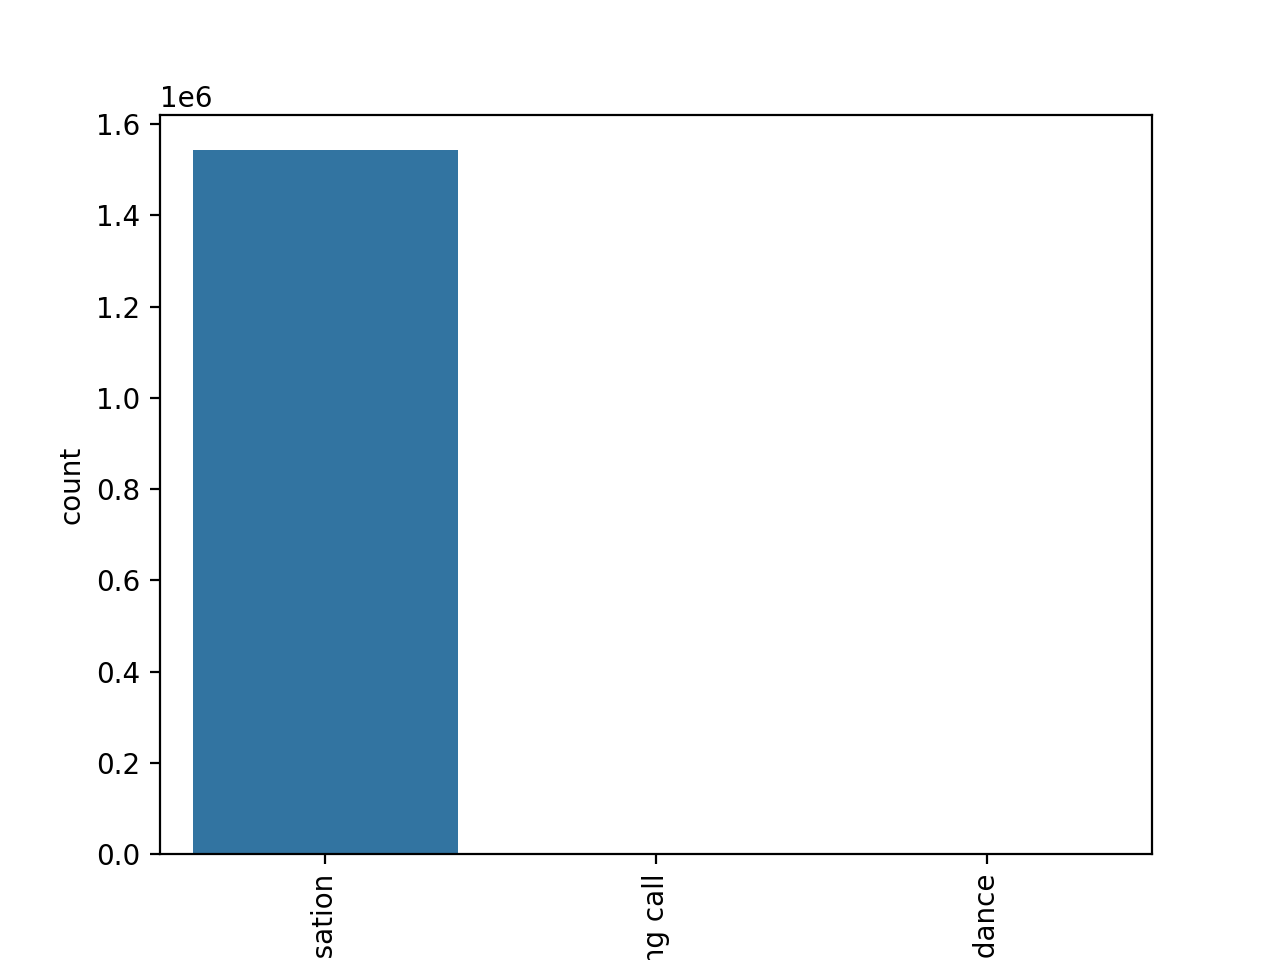

**DateOfCall_Dayofweek------------------------------ [3, 4, 5, 6, 0, 1, 2]
Categories (7, int32): [0, 1, 2, 3, 4, 5, 6]**

DateOfCall_Dayofweek
5    0.148275
4    0.144755
3    0.142376
6    0.141364
0    0.141259
1    0.141219
2    0.140752
Name: proportion, dtype: float64

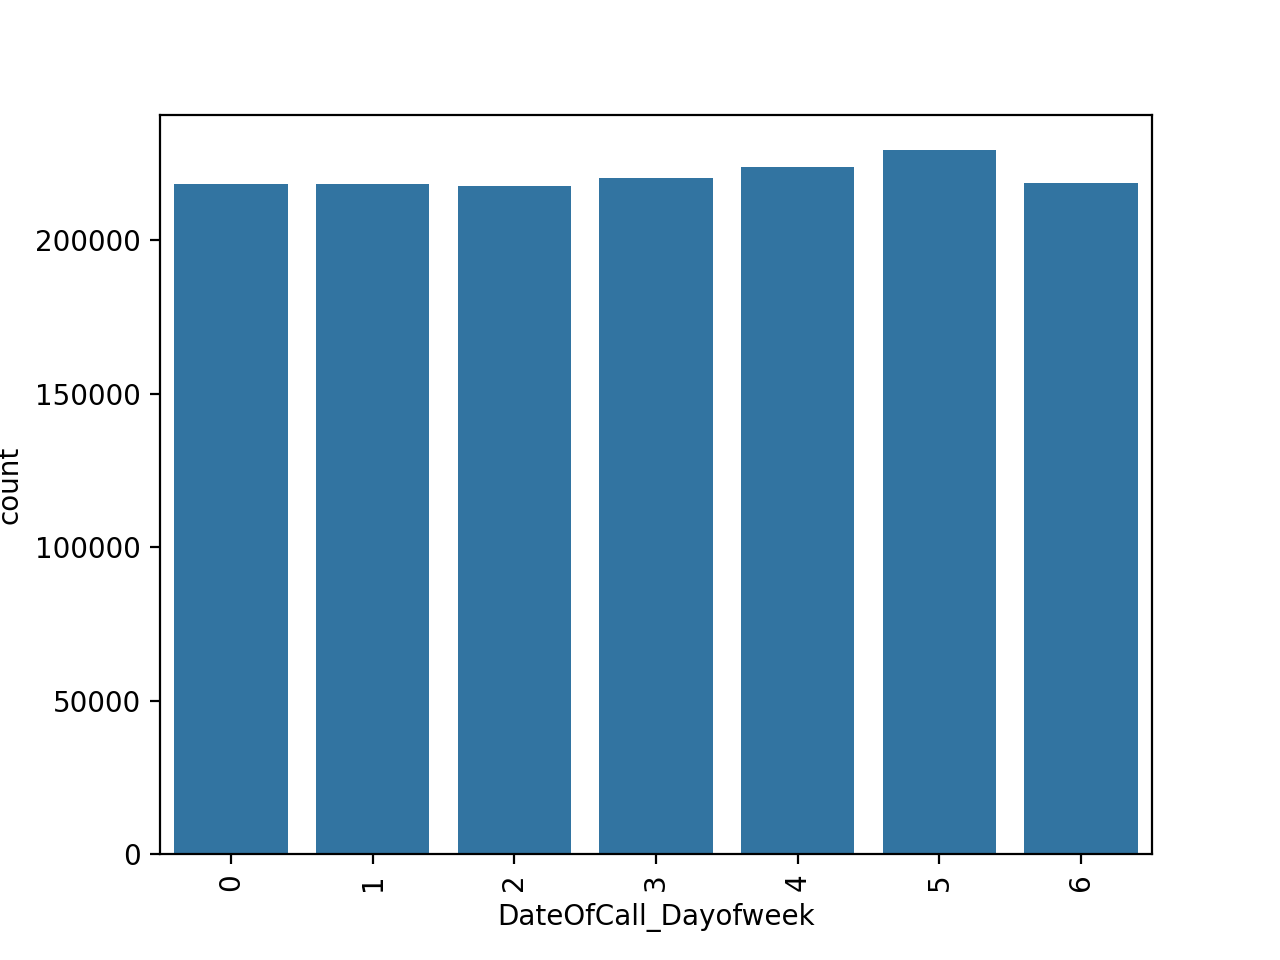

**DateOfCall_Quarter-------------------------------- [1, 2, 3, 4]
Categories (4, int32): [1, 2, 3, 4]**

DateOfCall_Quarter
3    0.264409
2    0.247743
1    0.246774
4    0.241074
Name: proportion, dtype: float64

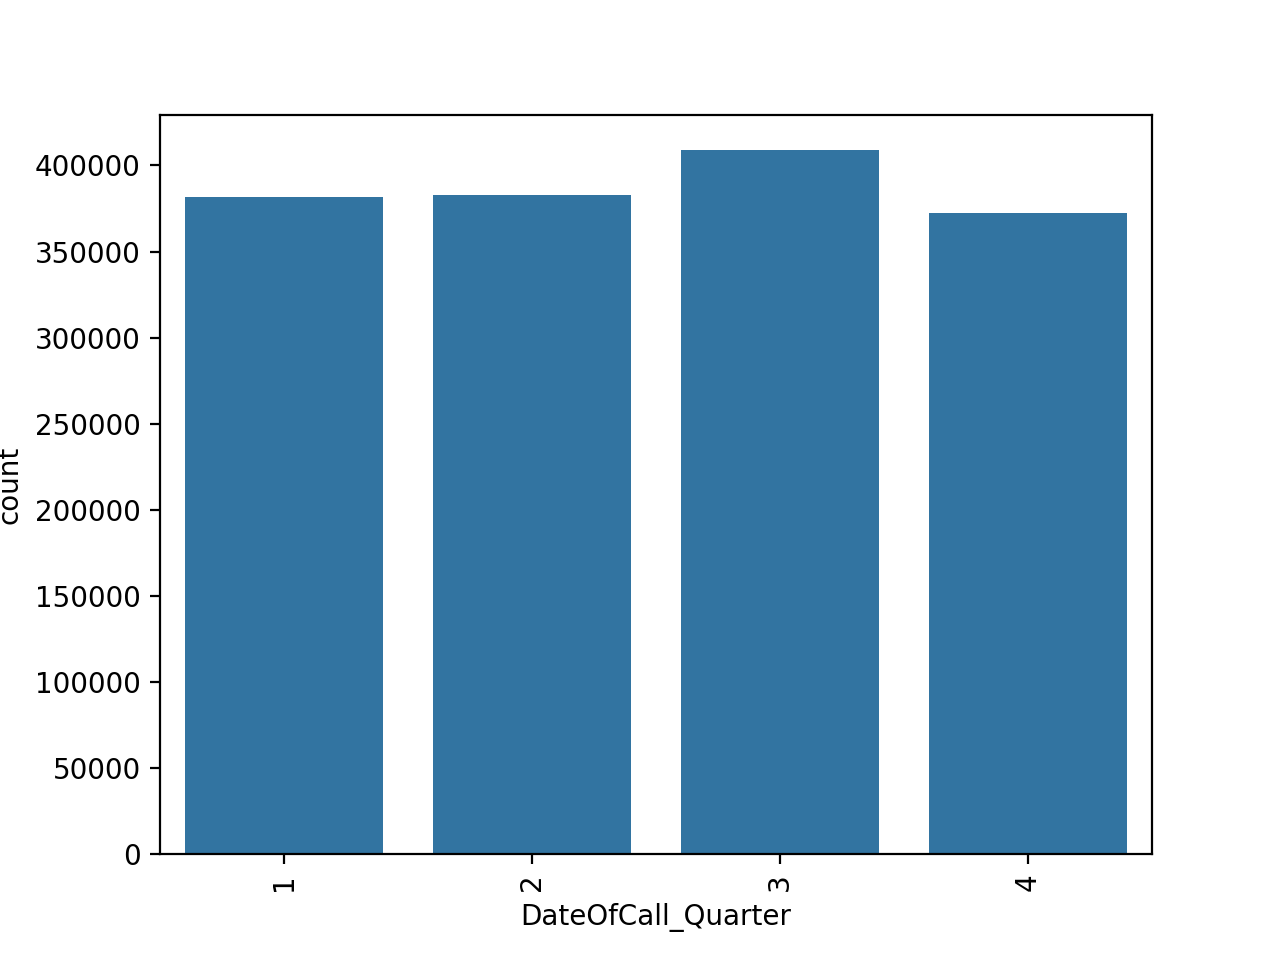

**DateOfCall_Month---------------------------------- [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int32): [1, 2, 3, 4, ..., 9, 10, 11, 12]**

DateOfCall_Month
7     0.093272
8     0.088205
6     0.085908
3     0.085487
5     0.083558
1     0.083479
9     0.082932
12    0.081393
10    0.081031
11    0.078649
4     0.078277
2     0.077809
Name: proportion, dtype: float64

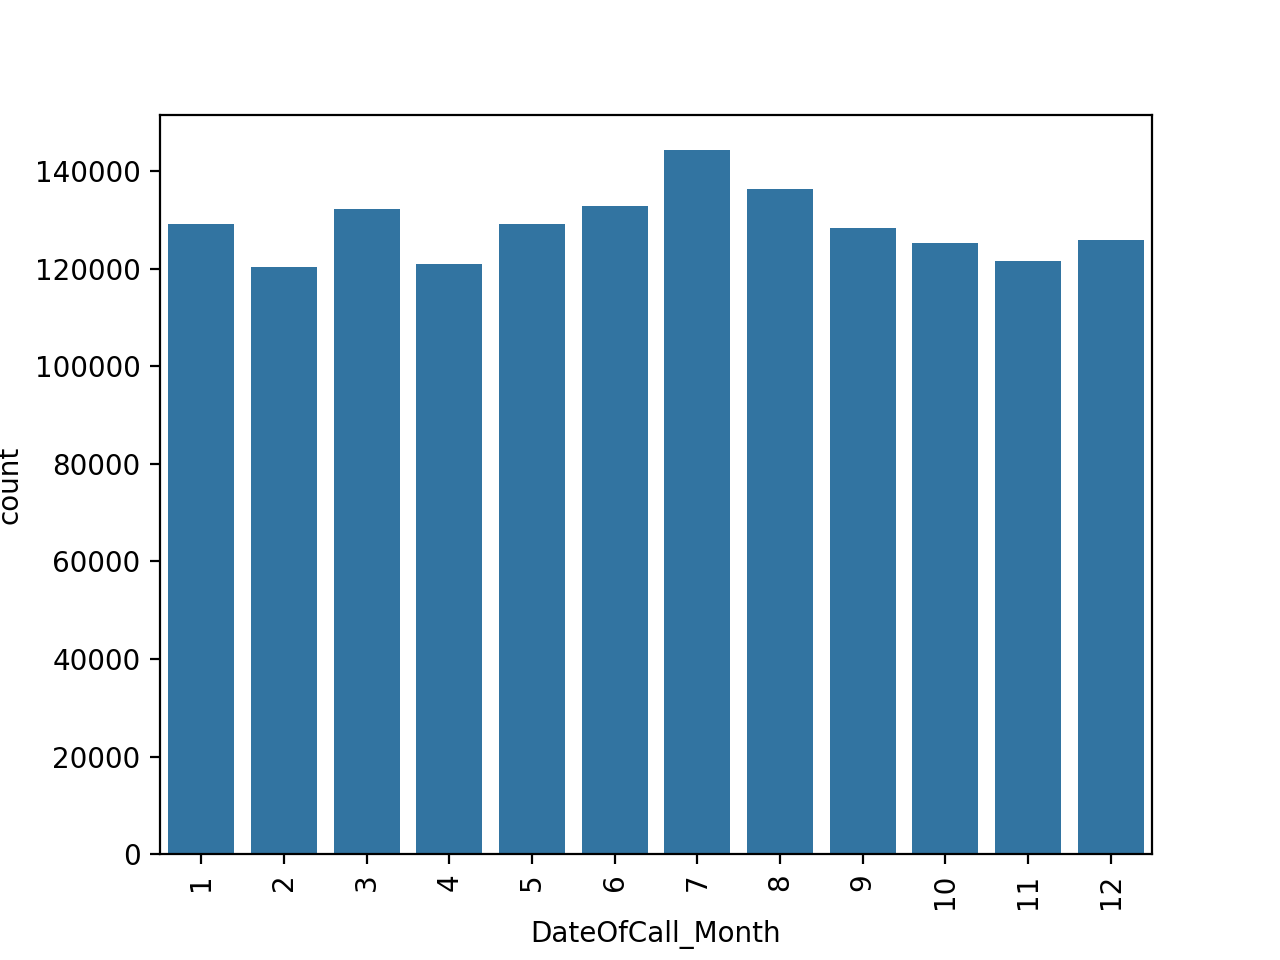

**DateOfCall_Dayofyear------------------------------ Trop de valeur à afficher**

**DateOfCall_Dayofmonth----------------------------- [1, 2, 3, 4, 5, ..., 27, 28, 29, 30, 31]
Length: 31
Categories (31, int32): [1, 2, 3, 4, ..., 28, 29, 30, 31]**

DateOfCall_Dayofmonth
5     0.033693
23    0.033681
24    0.033471
1     0.033441
20    0.033172
25    0.033131
18    0.033122
22    0.033115
21    0.033039
19    0.033005
15    0.032951
7     0.032902
9     0.032881
2     0.032826
10    0.032798
8     0.032787
6     0.032773
11    0.032762
17    0.032747
3     0.032664
28    0.032609
27    0.032589
13    0.032586
26    0.032582
16    0.032578
4     0.032522
14    0.032403
12    0.032209
29    0.030488
30    0.029635
31    0.018840
Name: proportion, dtype: float64

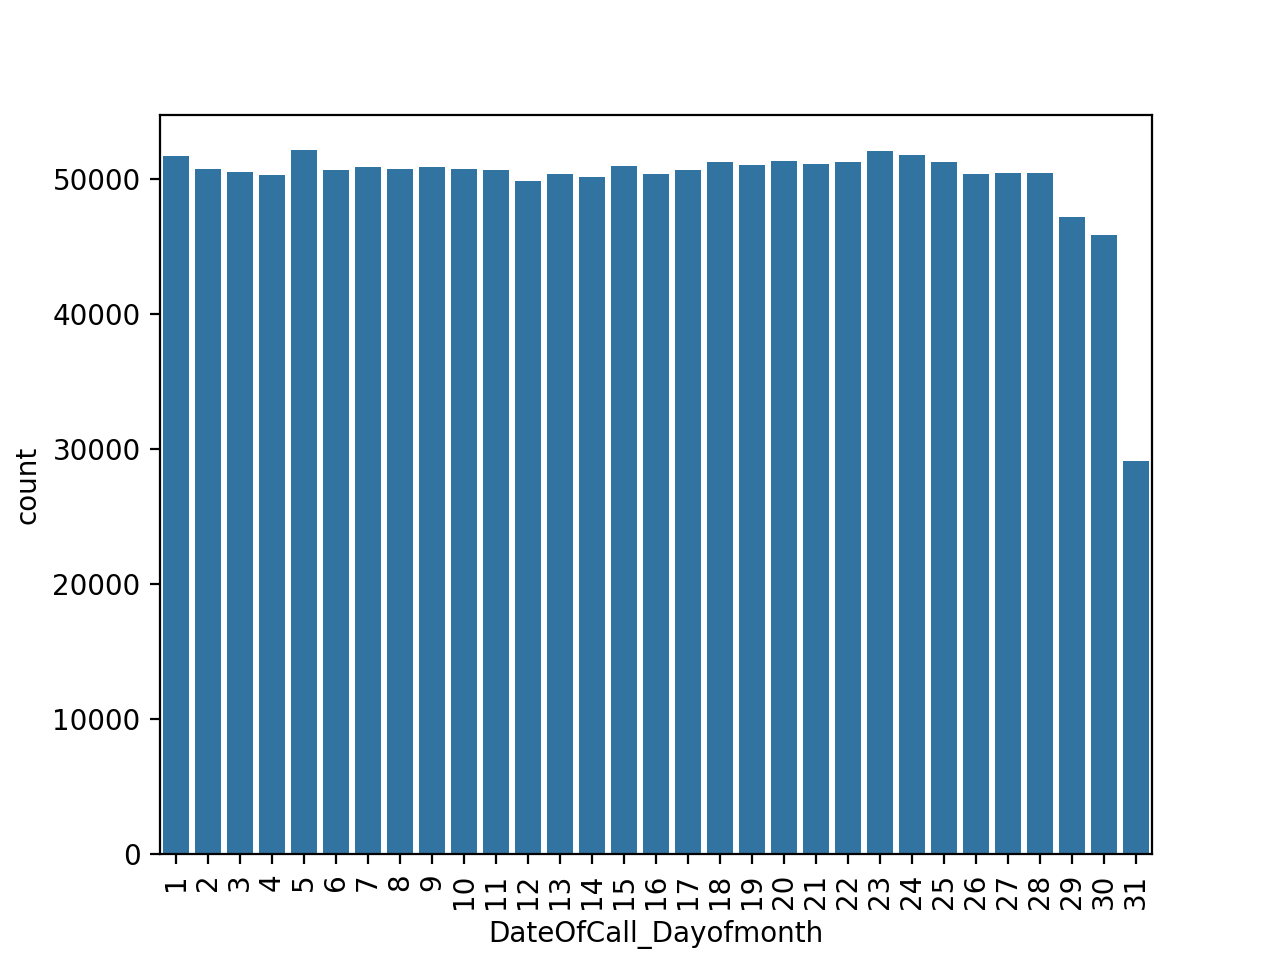

**DateOfCall_Weekofyear----------------------------- Trop de valeur à afficher**

**MinutesOfCall------------------------------------- Trop de valeur à afficher**

In [252]:
for col in categorical_features:
    if(df[col].nunique() > 35):
        printmd(f'**{col :-<50} {"Trop de valeur à afficher"}**')
    else:
        printmd(f'**{col :-<50} {df[col].unique()}**')
        display(df[col].value_counts(normalize=True))
        if(df[col].nunique() <= 34):
            #plt.figure(figsize=(10,8))
            sns.countplot(x=col, data=df)
            plt.xticks(rotation=90)
            plt.show()

#### **3.2.3 Variables continues**

In [253]:
def analyse_variable_quantitative(variable, base):

    print()

    print("Statistiques de la variable: ",variable , end="\n\n")

    print(base[variable].describe(), end="\n\n")

    sns.boxplot(x=variable, data=base)

    plt.title(f'Distribution de {variable} \n', fontsize=20)

    plt.show()


Statistiques de la variable:  Latitude

count    1.545930e+06
mean     5.147929e+01
std      1.217752e+00
min      0.000000e+00
25%      5.146907e+01
50%      5.151344e+01
75%      5.155048e+01
max      5.169167e+01
Name: Latitude, dtype: float64



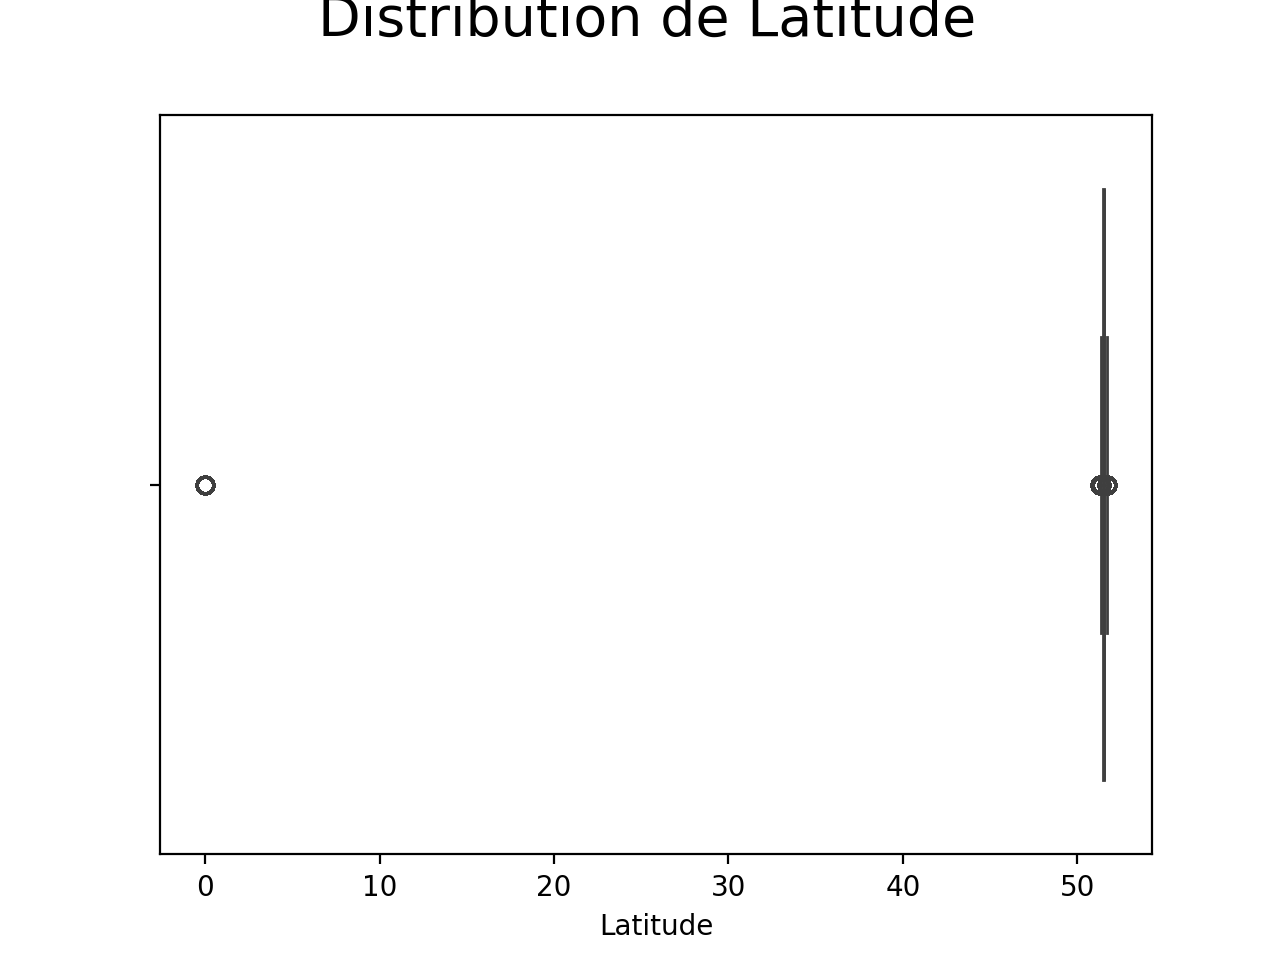


Statistiques de la variable:  Longitude

count    1.545930e+06
mean    -1.190647e-01
std      1.411393e-01
min     -5.101547e-01
25%     -1.976423e-01
50%     -1.156246e-01
75%     -3.566380e-02
max      3.222187e-01
Name: Longitude, dtype: float64



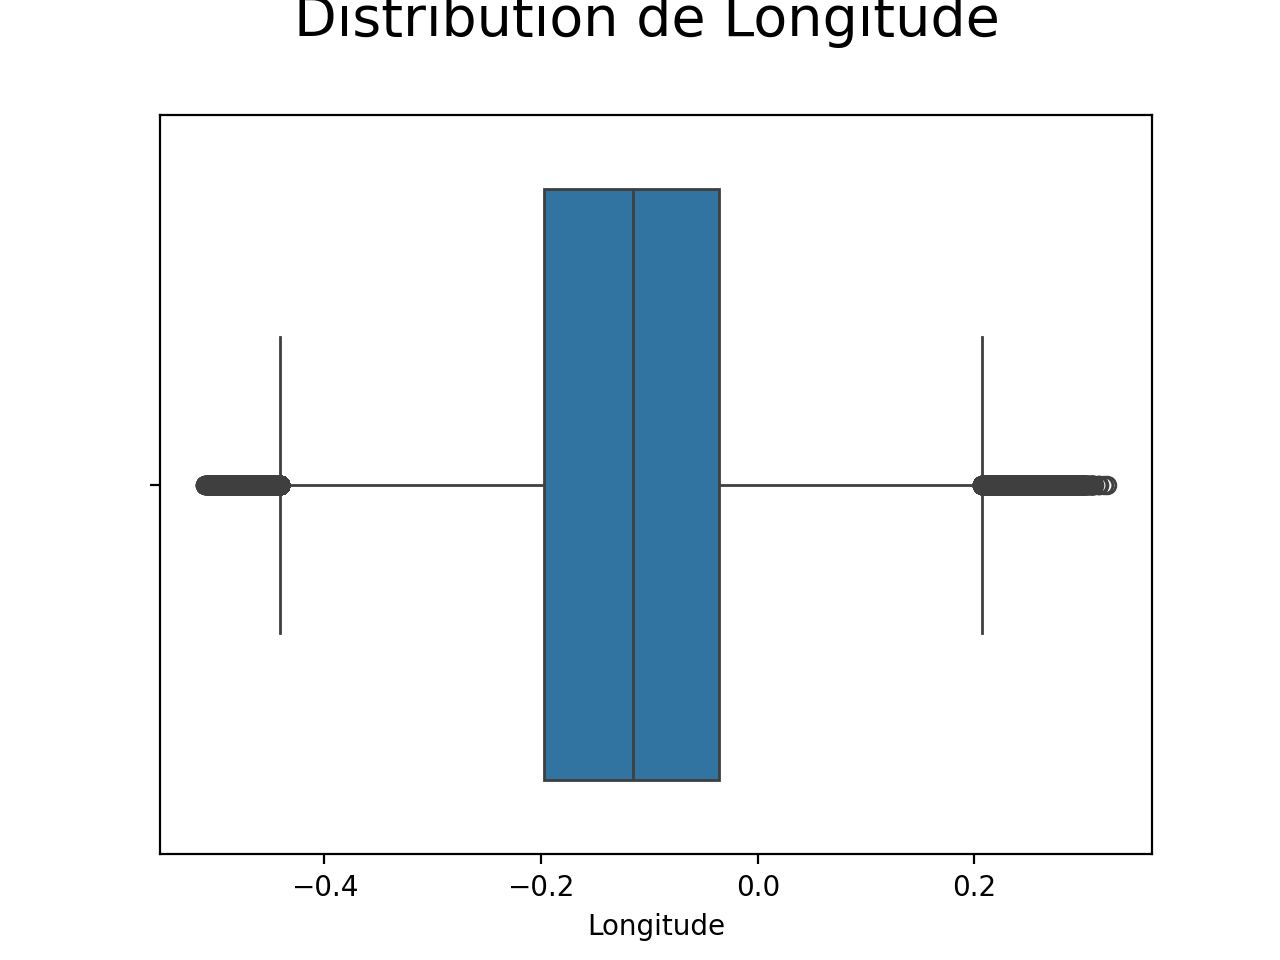


Statistiques de la variable:  PumpMinutesRounded

count    1.545930e+06
mean     6.849663e+01
std      4.026982e+01
min      6.000000e+01
25%      6.000000e+01
50%      6.000000e+01
75%      6.000000e+01
max      7.010000e+02
Name: PumpMinutesRounded, dtype: float64



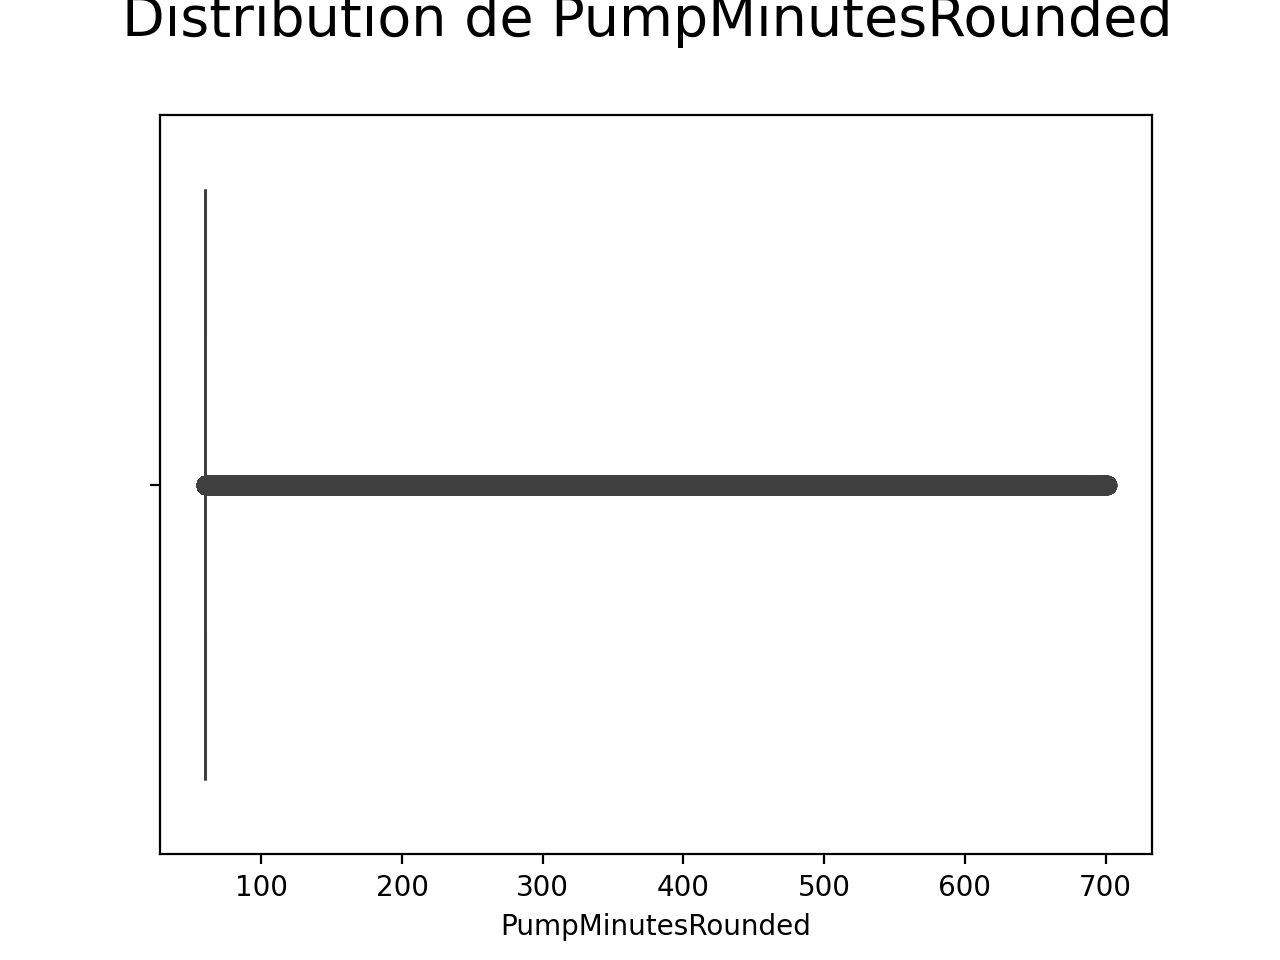


Statistiques de la variable:  DateOfCall_In_Ceconds

count    1.545930e+06
mean     1.473965e+18
std      1.453128e+17
min      1.230768e+18
25%      1.342397e+18
50%      1.478736e+18
75%      1.603757e+18
max      1.711757e+18
Name: DateOfCall_In_Ceconds, dtype: float64



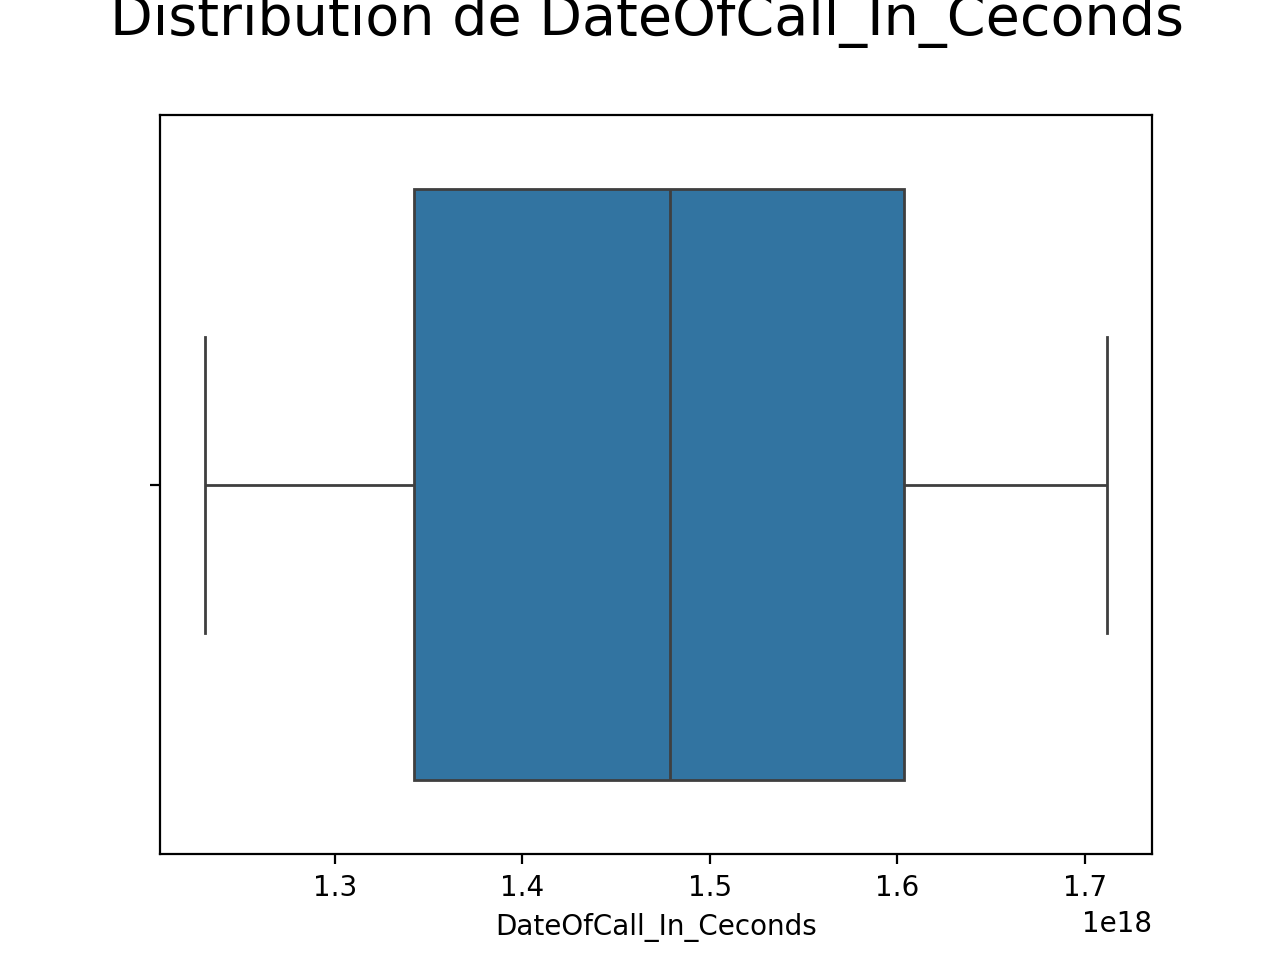


Statistiques de la variable:  FirstPumpArriving_AttendanceTime_InMinutes

count    1.545930e+06
mean     4.996040e+00
std      1.633228e+00
min      3.166667e-01
25%      3.866667e+00
50%      4.933333e+00
75%      5.966667e+00
max      9.550000e+00
Name: FirstPumpArriving_AttendanceTime_InMinutes, dtype: float64



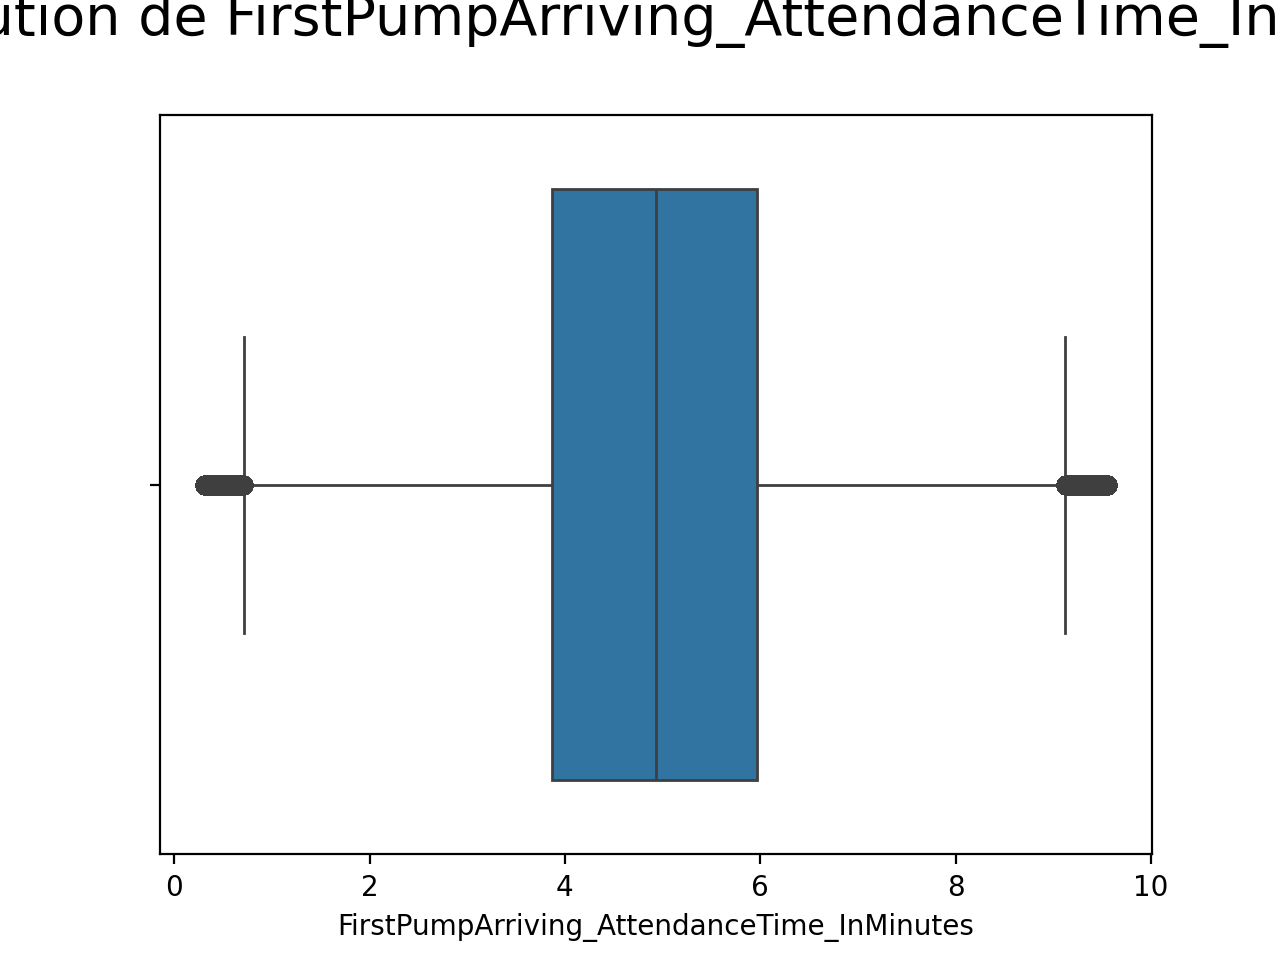

In [254]:
numeric_features = list(df.select_dtypes(include=[np.number]).columns)
for col in numeric_features:
    analyse_variable_quantitative(col, df)

#### **3.2.4 Check des outliers**

In [255]:
def verfier_les_outliers(data, plot=True):
    # calculate summary statistics for the Notional Cost column
    summary = data.describe()
    #display(summary)

    # calculate interquartile range for the column
    q1 = summary.loc['25%']
    q3 = summary.loc['75%']
    iqr = q3 - q1

    # identify potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data < lower_bound) | (data > upper_bound))
    #print(type(lower_bound))
    #print(upper_bound)

    # calculate the number and percentage of outliers
    num_outliers = outliers.sum()

    #print(f"Number of outliers:\n{num_outliers}")
    print(f"Number of outliers:\n{pd.concat([num_outliers,lower_bound,upper_bound],axis=1)}")

In [256]:
verfier_les_outliers(df[numeric_features])

Number of outliers:
                                                 0             1             2
Latitude                                     17586  5.134696e+01  5.167259e+01
Longitude                                    42737 -4.406100e-01  2.073039e-01
PumpMinutesRounded                          193398  6.000000e+01  6.000000e+01
DateOfCall_In_Ceconds                            0  9.503568e+17  1.995797e+18
FirstPumpArriving_AttendanceTime_InMinutes   20558  7.166667e-01  9.116667e+00


In [257]:
outlier_columns = ['FirstPumpArriving_AttendanceTime_InMinutes' ,'PumpMinutesRounded', 'DateOfCall_In_Ceconds','Latitude','Longitude']

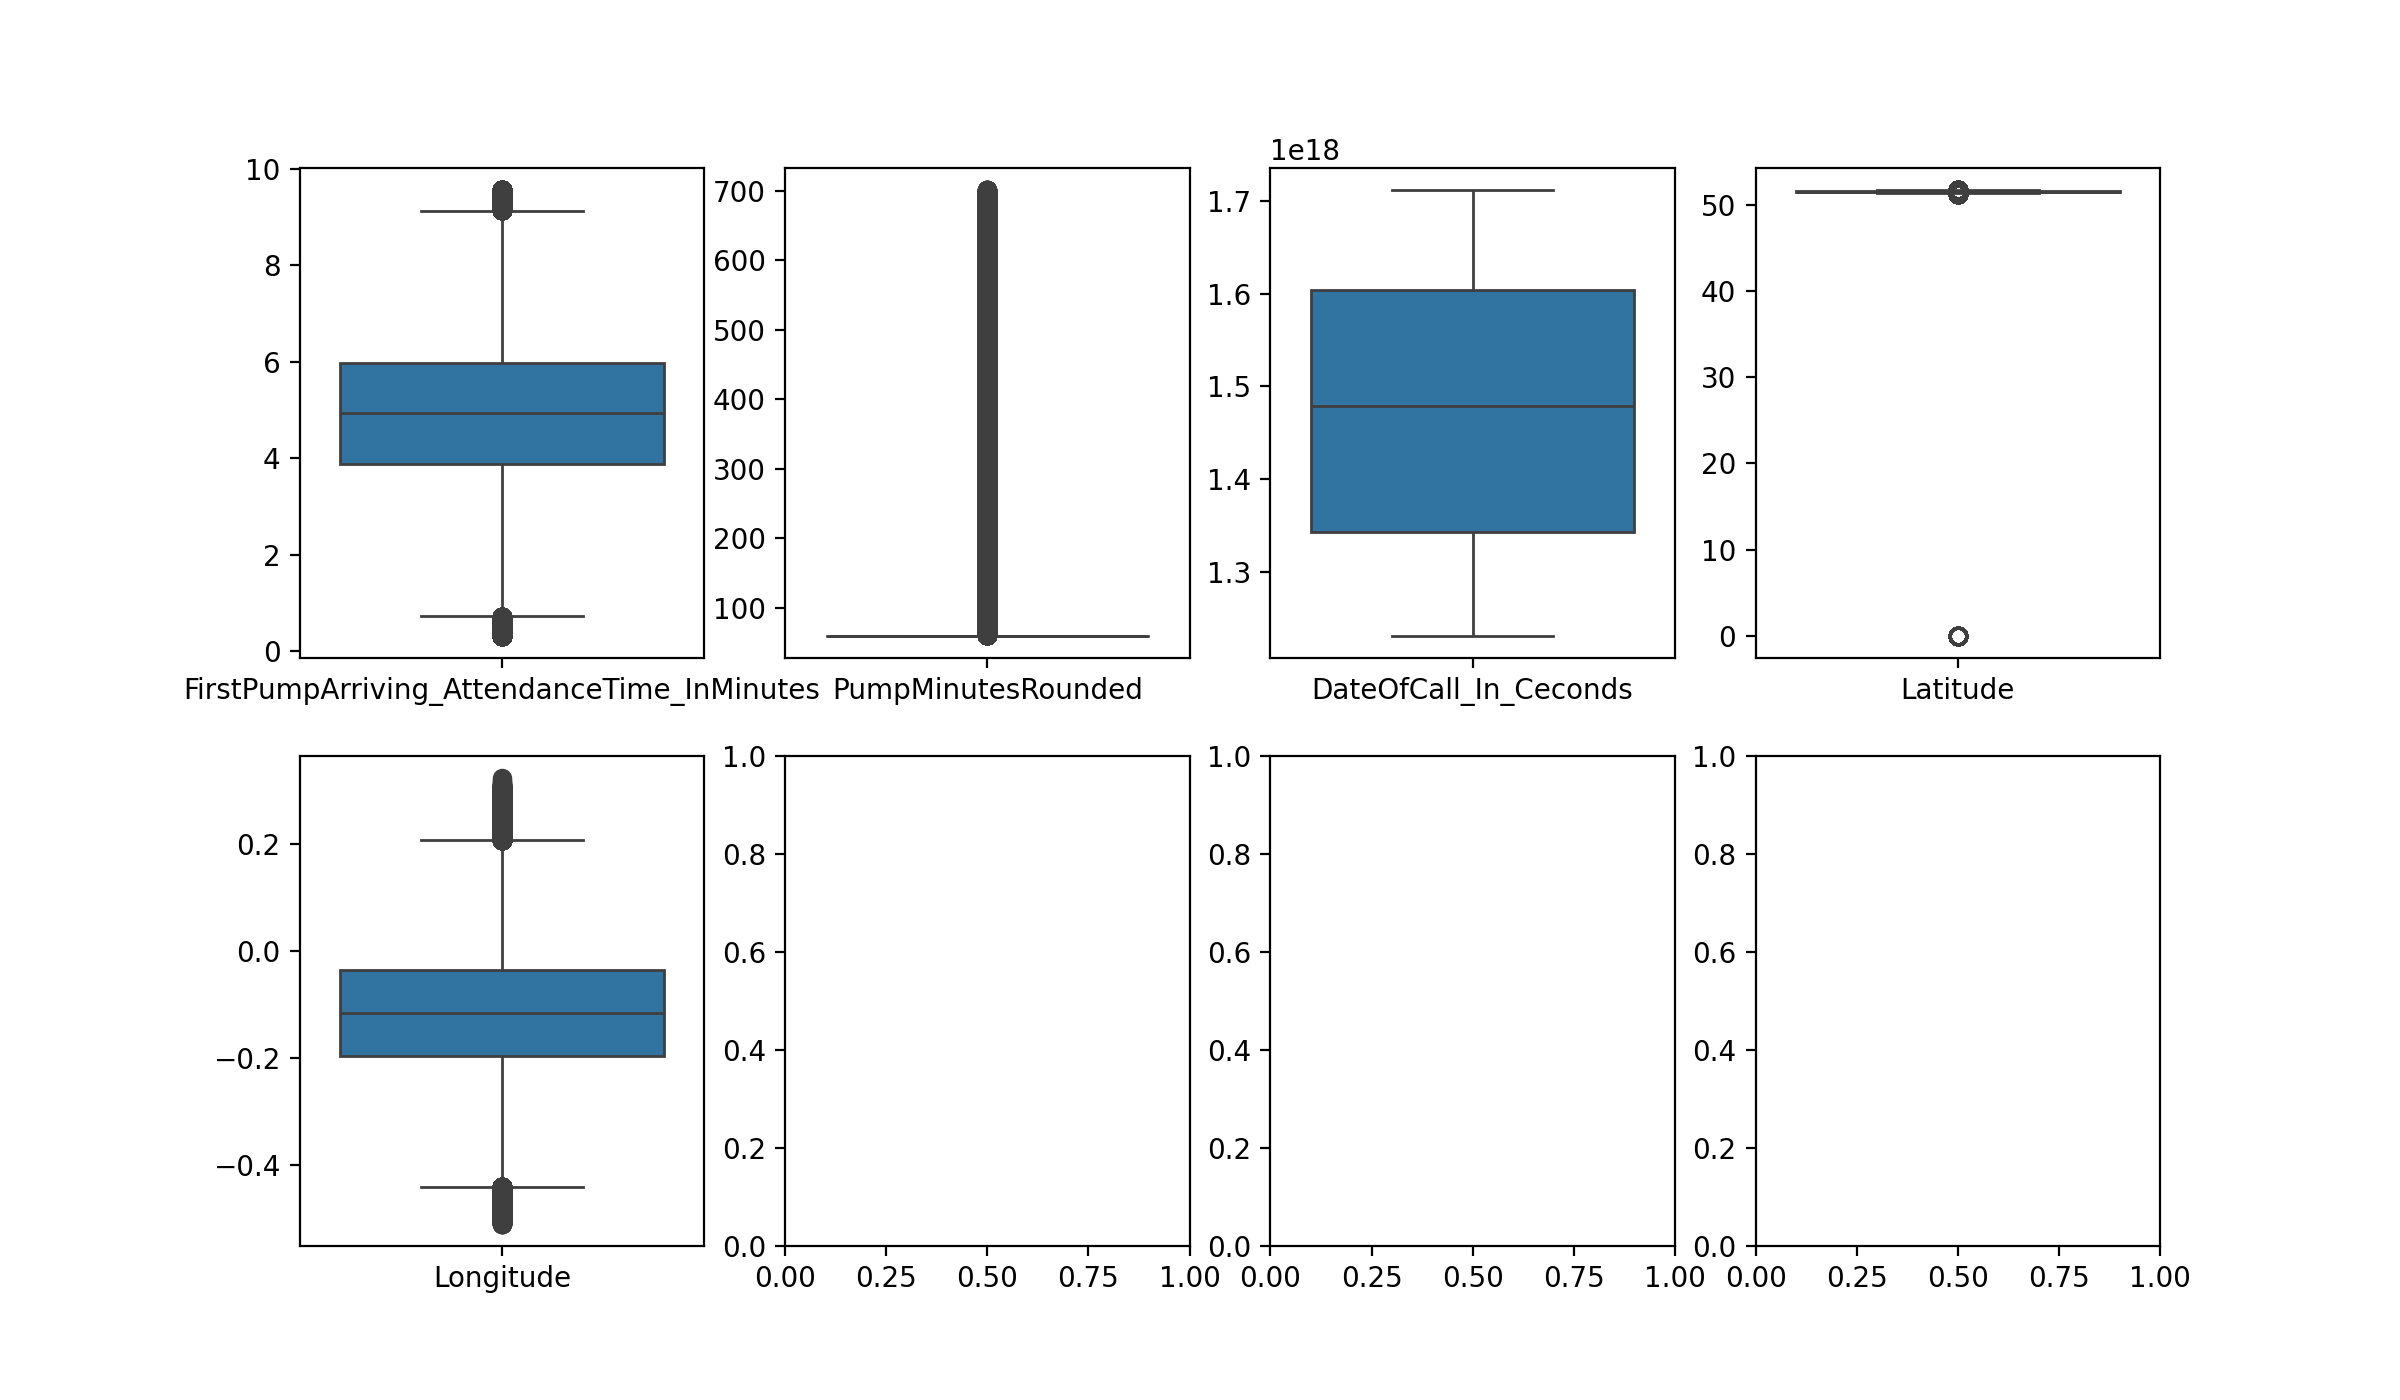

In [258]:
fig,ax = plt.subplots(2,4,figsize=(12,7))
row = col = 0
for index,col_name in enumerate(outlier_columns):
    if (index%4 == 0) & (index > 0):
        row += 1
        col = 0
    sns.boxplot(data=df[[col_name]], orient="x",ax=ax[row,col])
    col += 1

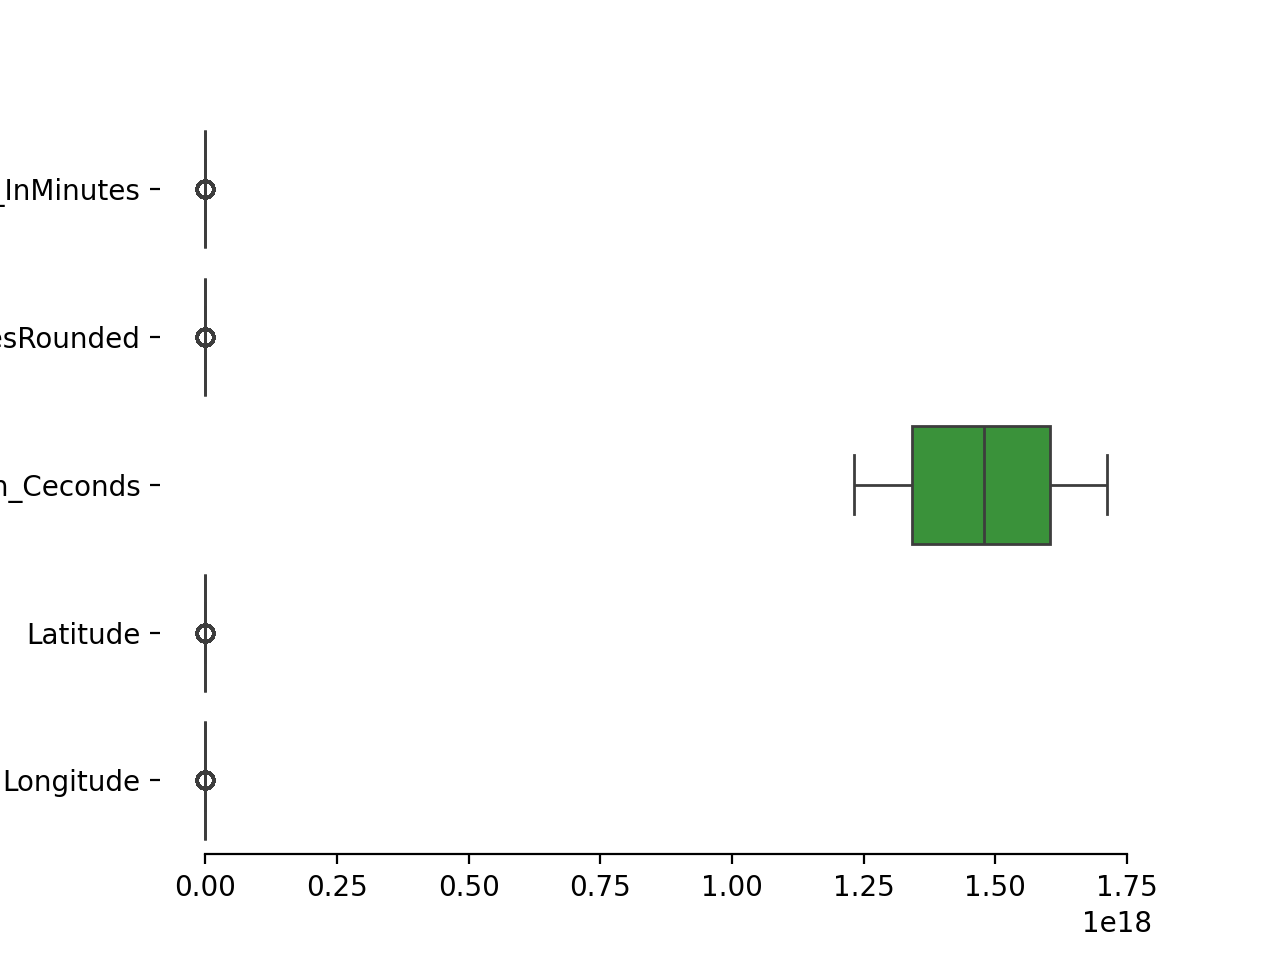

In [259]:
#sns.set_theme(style="ticks")
ax = sns.boxplot(data=df[outlier_columns], orient="h")
sns.despine(trim=True, left=True)
plt.show()

#### **3.2.5 Supprimer les outliers**

**Questions  à poser, doute sur comment enlever les outliers **

- FirstPumpArriving_AttendanceTime
- PumpCount                          58222      -0.5       3.5
-PumpMinutesRounded                210550      60.0      60.0
- Notional Cost (£)                 109690     122.0     490.0
- NumCalls                          293256       1.0       1.0

In [262]:
df['FirstPumpArriving_AttendanceTime_InMinutes'].isna().sum()

0

In [260]:
#fpat_median =df['FirstPumpArriving_AttendanceTime'].median()
#incidents_df["FirstPumpArriving_AttendanceTime"] = np.where((incidents_df['FirstPumpArriving_AttendanceTime'] > 567) | (incidents_df['FirstPumpArriving_AttendanceTime'] < 36.5), fpat_median,incidents_df['Age'])
#df["FirstPumpArriving_AttendanceTime"] = df["FirstPumpArriving_AttendanceTime"].mask((df['FirstPumpArriving_AttendanceTime'] > 567) | (df['FirstPumpArriving_AttendanceTime'] < 36.5), fpat_median)

KeyError: 'FirstPumpArriving_AttendanceTime'

#### **3.2.5 Relations variables catégorielles/Target**

In [263]:
print(df.select_dtypes(exclude=[np.number]).columns)

Index(['DateOfCall', 'CalYear', 'HourOfCall', 'IncidentGroup',
       'StopCodeDescription', 'PropertyCategory', 'AddressQualifier',
       'Postcode_district', 'IncGeo_BoroughName',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'NumCalls', 'Resource_Code', 'PerformanceReporting',
       'DateAndTimeMobilised', 'DateAndTimeArrived',
       'DeployedFromStation_Name', 'DeployedFromLocation', 'PumpOrder',
       'PlusCode_Code', 'PlusCode_Description', 'DateOfCall_Dayofweek',
       'DateOfCall_Quarter', 'DateOfCall_Month', 'DateOfCall_Dayofyear',
       'DateOfCall_Dayofmonth', 'DateOfCall_Weekofyear', 'MinutesOfCall'],
      dtype='object')


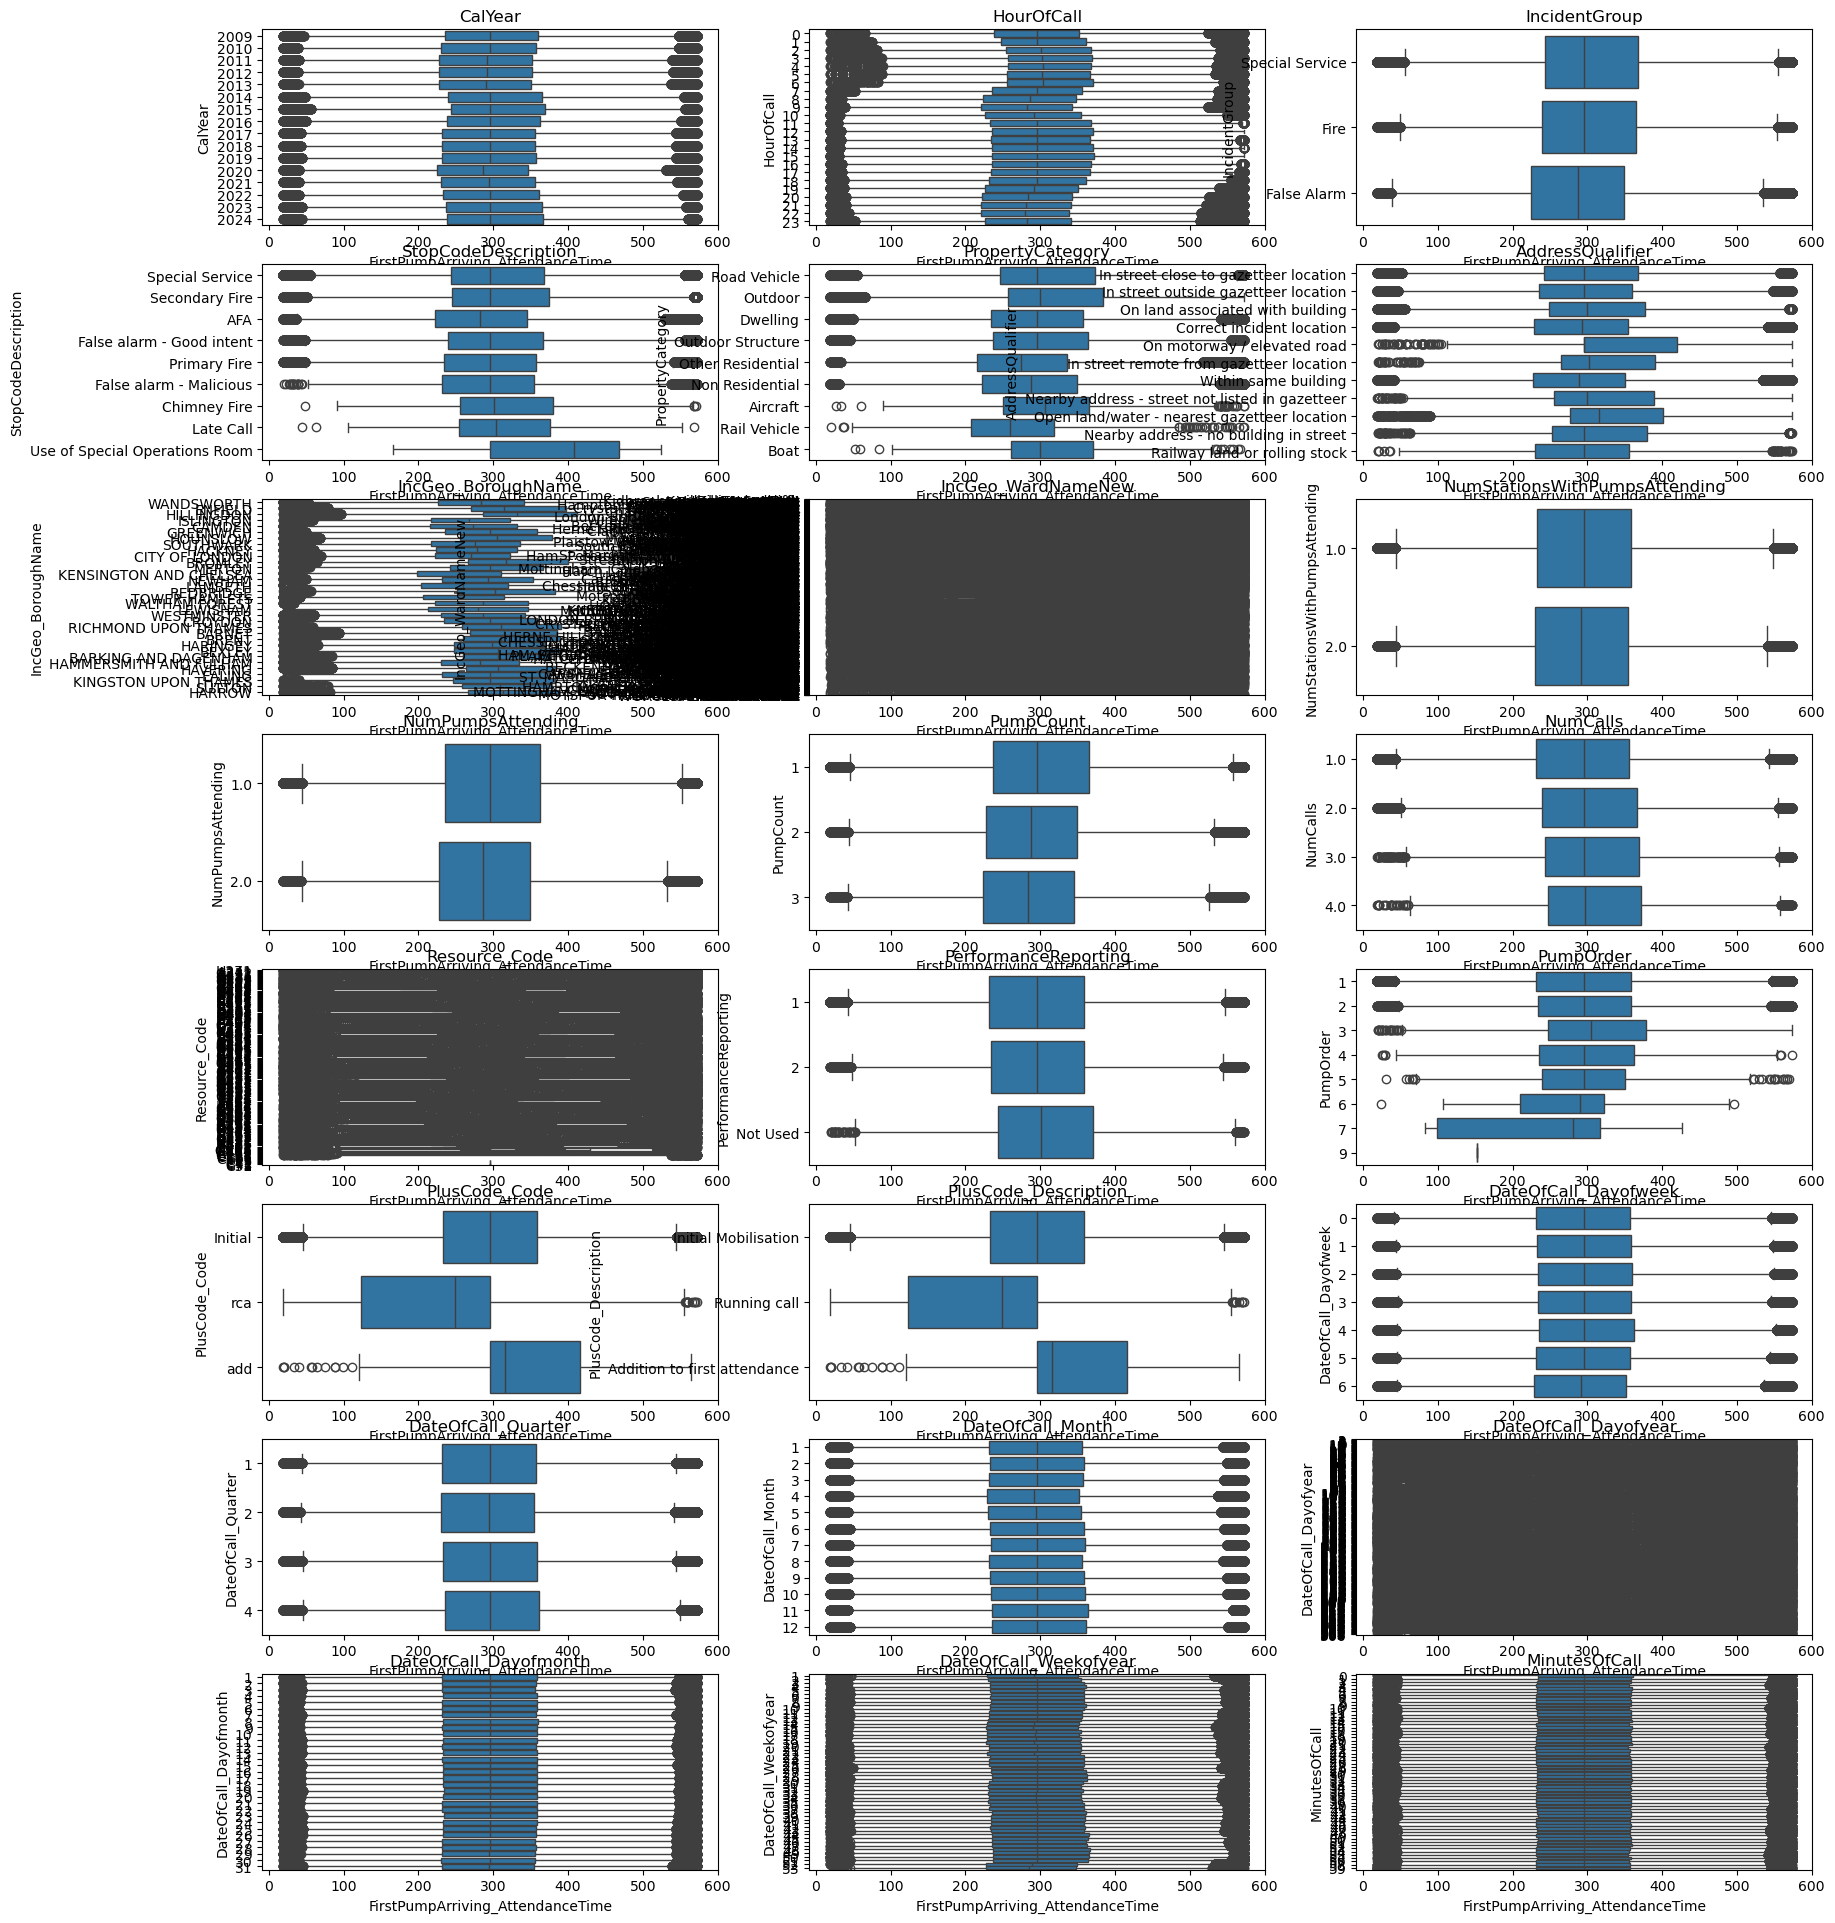

In [ ]:
fig = plt.figure(figsize= (20,30))

cols = [x for x in categorical_features if x not in ['DateOfCall','DateAndTimeMobilised', 'DateAndTimeArrived','DeployedFromStation_Name', 'DeployedFromLocation','Postcode_district']]
for i in range(len(cols)):
    column = cols[i]
    sub = fig.add_subplot(10,3, i+1)
    chart = sns.boxplot(data=df, y=column, x= df['FirstPumpArriving_AttendanceTime'])
    chart.set_title(column)

<Axes: xlabel='CalYear', ylabel='FirstPumpArriving_AttendanceTime_InMinutes'>

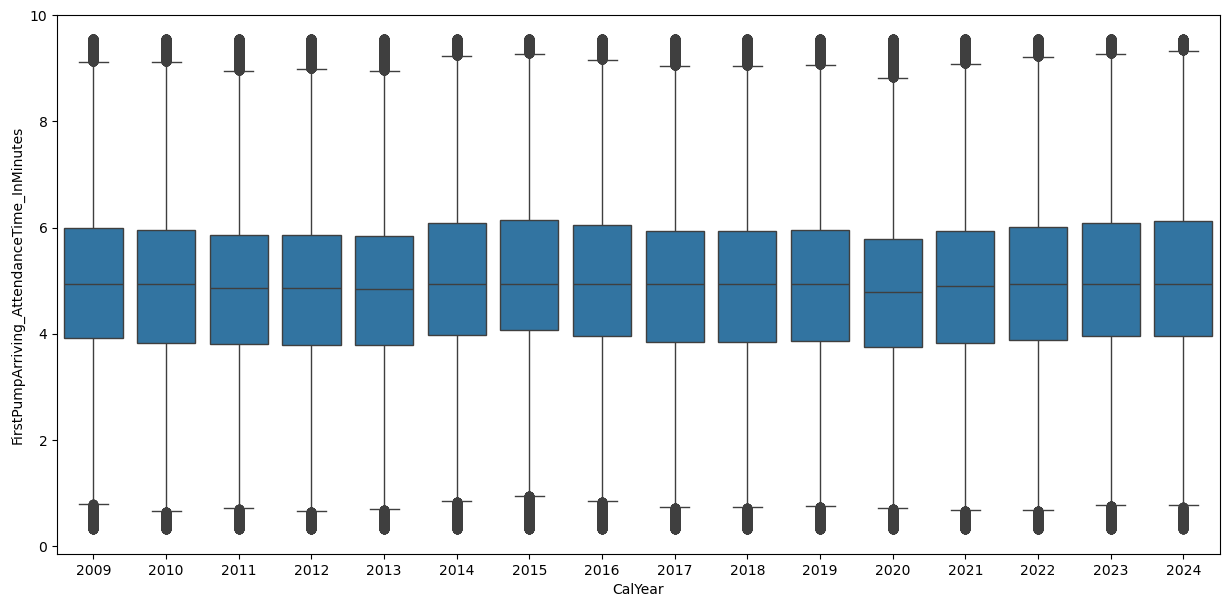

In [ ]:
plt.figure(figsize=[15,7],)
sns.boxplot(data=df,x='CalYear', y='FirstPumpArriving_AttendanceTime_InMinutes')

<Axes: xlabel='HourOfCall', ylabel='FirstPumpArriving_AttendanceTime_InMinutes'>

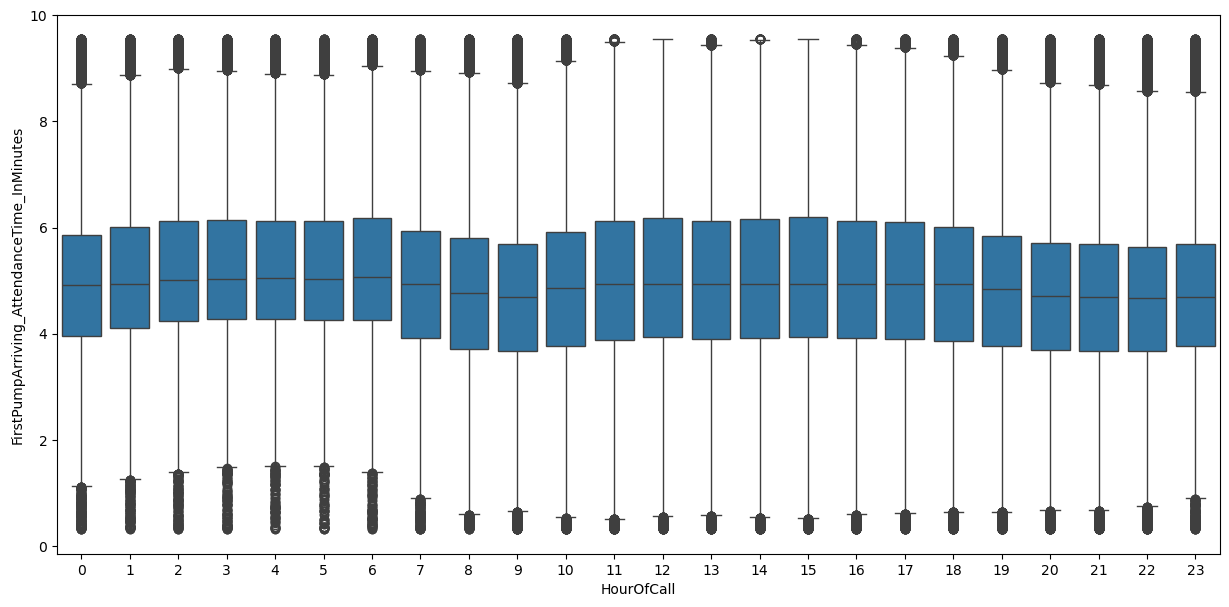

In [ ]:
plt.figure(figsize=[15,7],)
sns.boxplot(data=df,x='HourOfCall', y='FirstPumpArriving_AttendanceTime_InMinutes')

#### **3.2.6 Relations variables continues/Target**

In [264]:
# https://realpython.com/ggplot-python/
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar,geom_line

#ggplot(df) + aes(x="DateOfCall") + stat_bin(bins=10) + geom_bar()

#(
#    ggplot(economics)+ aes(x="date", y="pop")+ scale_x_timedelta(name="Years since 1970")+ labs(title="Population Evolution", y="Population") + geom_line()
#)

# ggplot(df) + aes(x="DateOfCall", y="FirstPumpArriving_AttendanceTime_InMinutes") + geom_line()
# ggplot(df) + aes(x="DateOfCall_In_Ceconds", y="FirstPumpArriving_AttendanceTime_InMinutes") + geom_line()



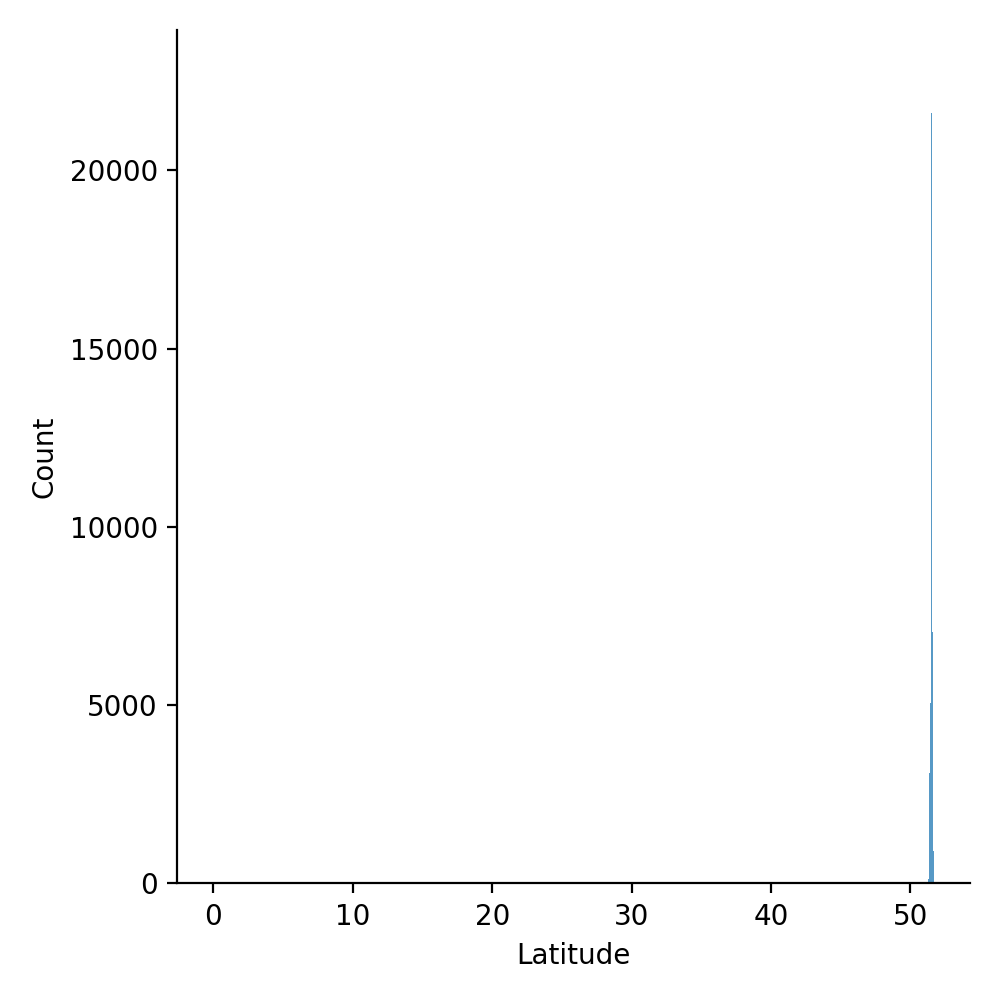

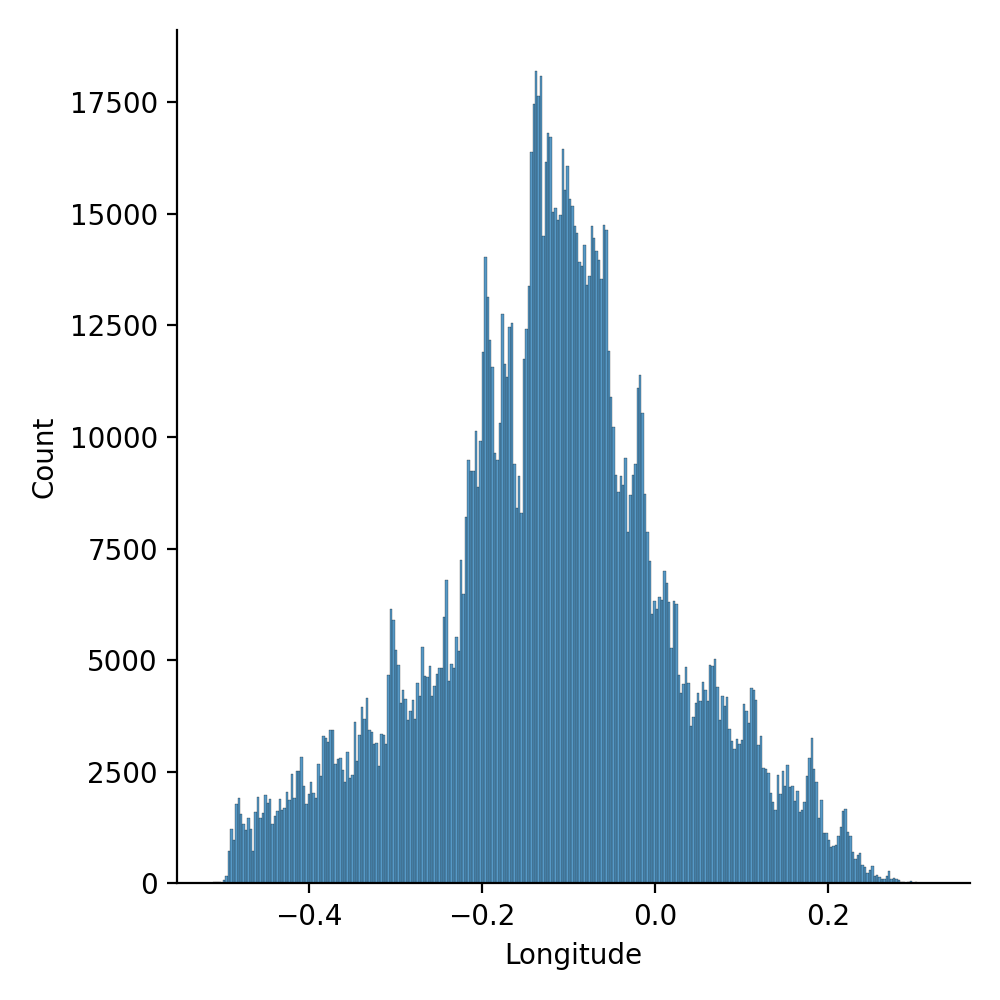

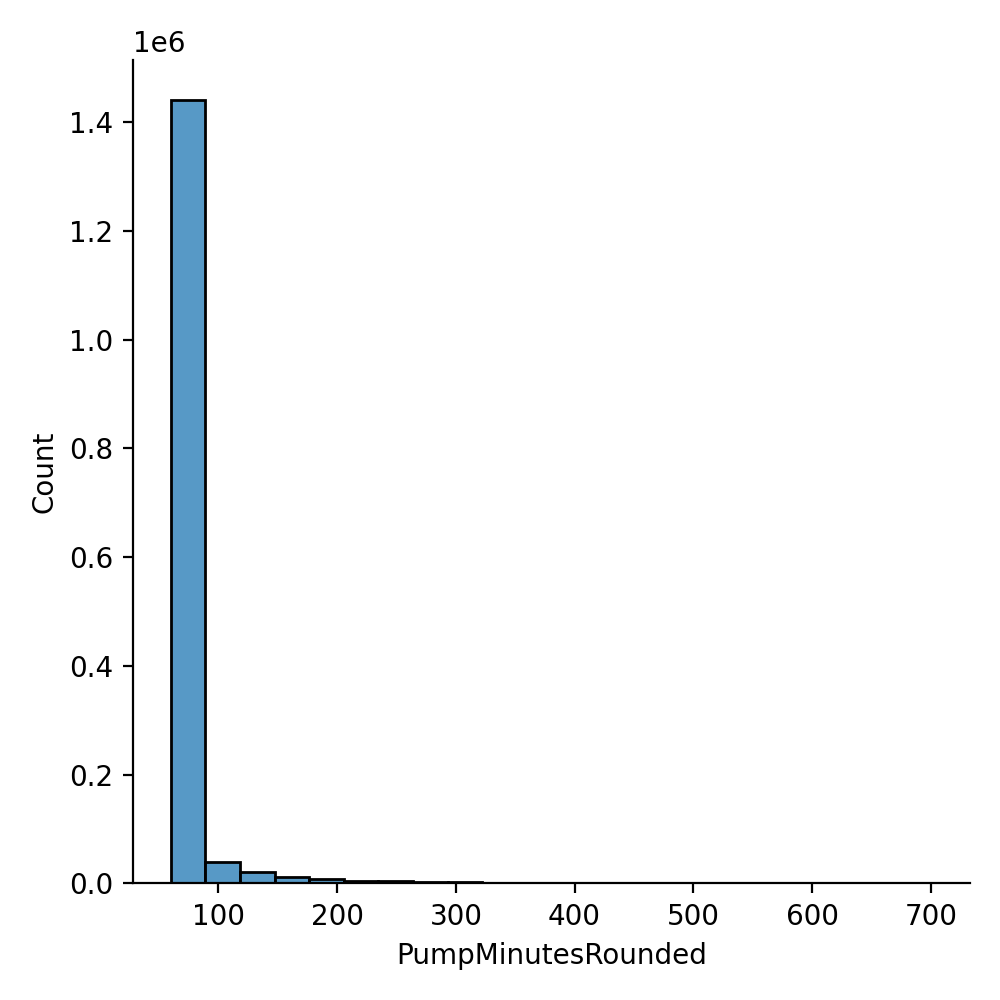

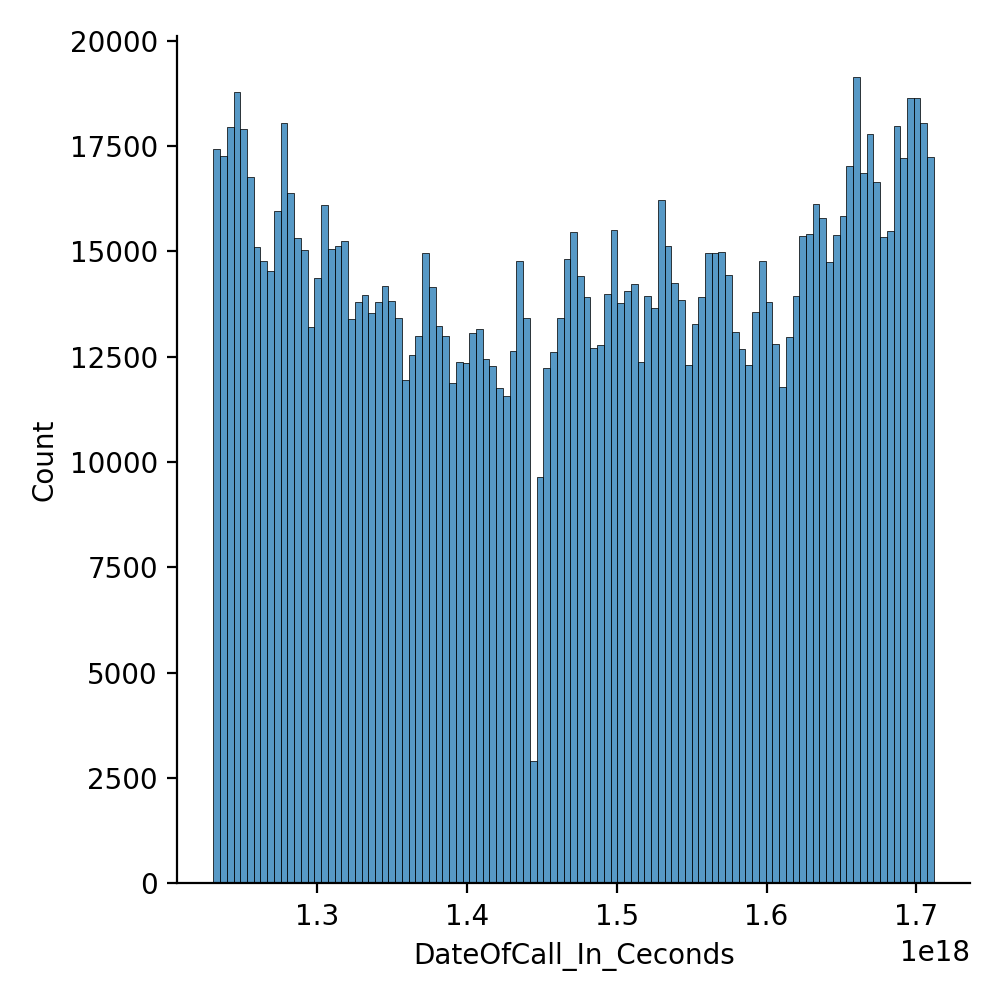

In [265]:
for index,col_name in enumerate([x for x in numeric_features if x not in ['FirstPumpArriving_AttendanceTime_InMinutes']]):
    # sns.regplot(x=col_name,y="FirstPumpArriving_AttendanceTime_InMinutes",data=df,ci=None)
    sns.displot(df[col_name], label='FirstPumpArriving_AttendanceTime_InMinutes')
    plt.show()

#### **3.2.7 Target distribution**

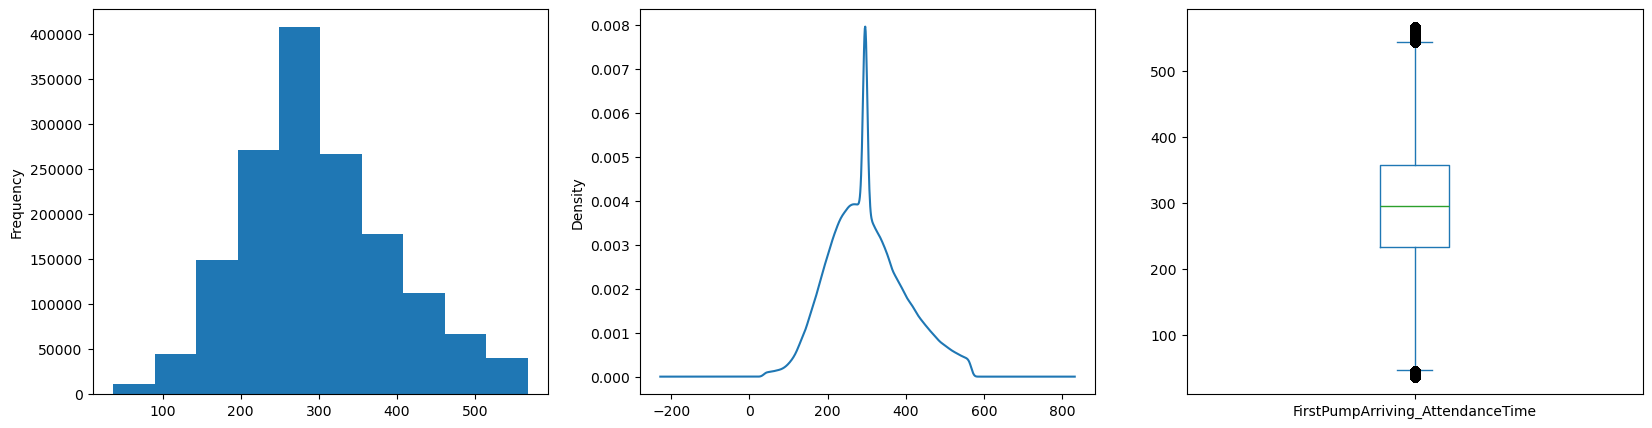

In [ ]:
target = 'FirstPumpArriving_AttendanceTime'
fig,ax = plt.subplots(1,3,figsize=(20,5))
df[target].plot(kind="hist",ax=ax[0])
df[target].plot(kind="kde",ax=ax[1])
df[target].plot(kind="box",ax=ax[2])
plt.show()

In [ ]:
from scipy import stats
from scipy.stats import normaltest

#print(f'{target}: {"Not Gaussian" if normaltest(incidents_df[target].values,)[1]<0.05 else "Gaussian"}  {normaltest(incidents_df[target].values)}')

<Axes: >

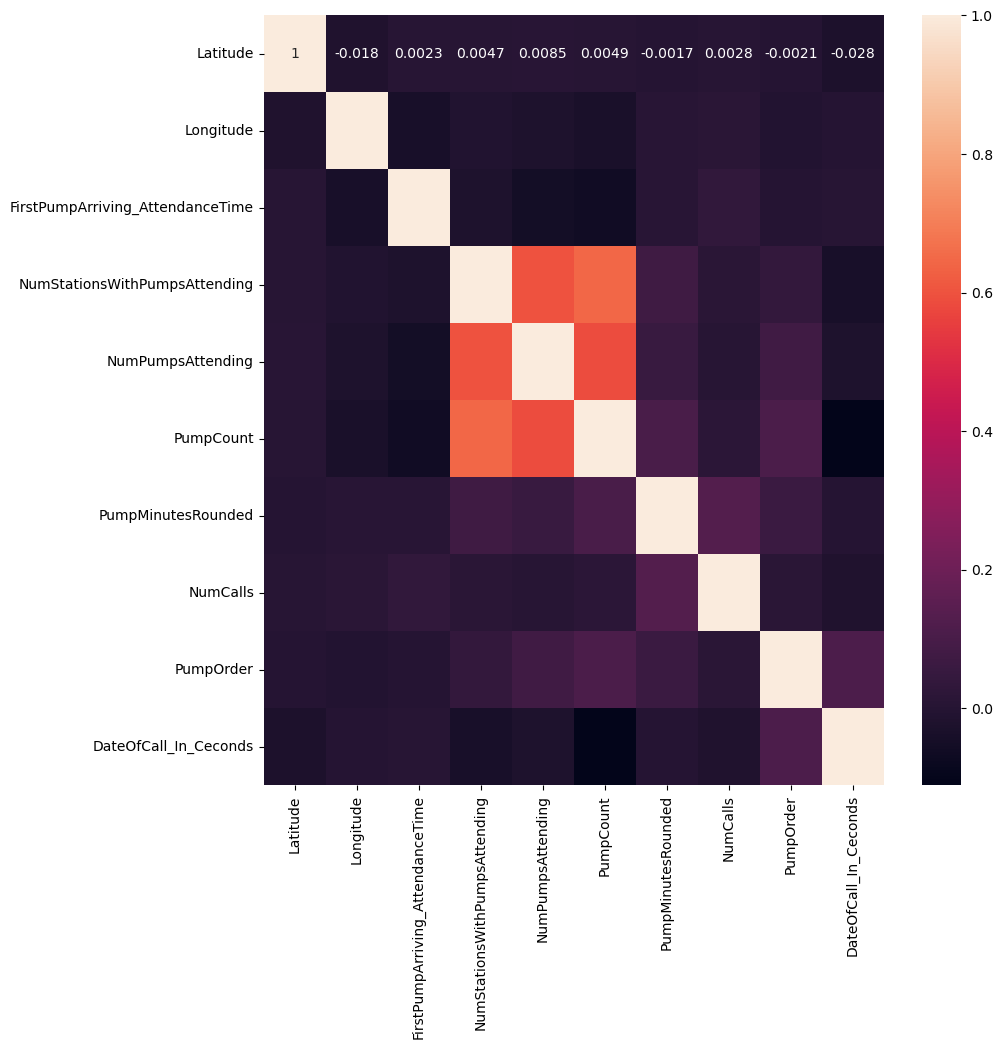

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#numeric_features_to_display = ['FirstPumpArriving_AttendanceTime','NumStationsWithPumpsAttending','NumPumpsAttending','PumpCount','PumpMinutesRounded','Notional Cost (£)','NumCalls']
numeric_features_to_display = numeric_features
corrmat = df[numeric_features].corr()
#mask= np.zeros_like(corrmat)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,
            #vmax=1, vmin=-1,
            annot=True, 
            #annot_kws={'fontsize':7},
            #mask=mask,
            #cmap=sns.diverging_palette(20,220,as_cmap=True)
            )

In [ ]:
plt.figure(figsize=(8,8))
df[numeric_features].corr().style.background_gradient(cmap='coolwarm')

,Latitude,Longitude,PumpMinutesRounded,DateOfCall_In_Ceconds,FirstPumpArriving_AttendanceTime_InMinutes
Latitude,1.000000,-0.017850,-0.001717,-0.027876,0.005605
Longitude,-0.017850,1.000000,0.008401,-0.001575,-0.040721
PumpMinutesRounded,-0.001717,0.008401,1.000000,0.000273,0.007414
DateOfCall_In_Ceconds,-0.027876,-0.001575,0.000273,1.000000,0.000762
FirstPumpArriving_AttendanceTime_InMinutes,0.005605,-0.040721,0.007414,0.000762,1.000000


<Figure size 800x800 with 0 Axes>

In [ ]:
#sns.heatmap(incidents_df[numeric_features].corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(incidents_df[numeric_features].corr(method='pearson')),cbar=False)

In [ ]:
#fig = plt.figure(figsize=(8,8))
#sns.heatmap(incidents_df[numeric_features].corr(method='kendall'),annot=True,fmt='.2f',mask=np.triu(incidents_df[numeric_features].corr(method='pearson')),cbar=False)

#### **3.2.8 Relations variables catégorielles/catégorielles**

In [ ]:
# Faire test de CRAMER

#### **3.2.9 Relations variables continues/continues**

In [ ]:
from scipy.stats import pearsonr

numeric_features_inner = numeric_features.copy()

for item_1 in numeric_features:
    for item_2 in numeric_features_inner:
        if (item_1 != item_2) :
            coefficient, p_value = pearsonr(df[item_1], df[item_2])
            print("Le coefficient entre les variables '", item_1, "' et '", item_2, "' est de :", coefficient, "et la p-value de", p_value)
    #numeric_features_inner.remove(item_1)

Le coefficient entre les variables ' Latitude ' et ' Longitude ' est de : -0.017849726933934967 et la p-value de 3.814216177665764e-109
Le coefficient entre les variables ' Latitude ' et ' FirstPumpArriving_AttendanceTime ' est de : 0.0022890086089204947 et la p-value de 0.004426521587500763
Le coefficient entre les variables ' Latitude ' et ' PumpMinutesRounded ' est de : -0.001717392115942233 et la p-value de 0.03273432703133074
Le coefficient entre les variables ' Latitude ' et ' DateOfCall_In_Ceconds ' est de : -0.027875616808385784 et la p-value de 2.566456363898951e-263
Le coefficient entre les variables ' Longitude ' et ' Latitude ' est de : -0.017849726933934967 et la p-value de 3.814216177665764e-109
Le coefficient entre les variables ' Longitude ' et ' FirstPumpArriving_AttendanceTime ' est de : -0.04061911235590168 et la p-value de 0.0
Le coefficient entre les variables ' Longitude ' et ' PumpMinutesRounded ' est de : 0.00840102983410337 et la p-value de 1.53428836635992e-25

#### **3.2.10 Relations variables continues/catégorielles**

In [ ]:
# Faire test de ANOVA.

#### **3.2.11 Autres analyse**

TODO, Nbre d'incidents par an/mois/semaine etc, le temps reponse moyen par an etc...

In [269]:
data_processed_path = os.path.join(root_folder_path, "data", "processed")
data_processed_path

'h:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\processed'

In [270]:
data_processed_path = os.path.join(root_folder_path, "data", "processed")
df.to_csv(os.path.join(data_processed_path, r"base_donnees_nettoyee_non_dupliquee.csv"))

In [272]:
categorical_features

['DateOfCall',
 'CalYear',
 'HourOfCall',
 'IncidentGroup',
 'StopCodeDescription',
 'PropertyCategory',
 'AddressQualifier',
 'Postcode_district',
 'IncGeo_BoroughName',
 'NumStationsWithPumpsAttending',
 'NumPumpsAttending',
 'PumpCount',
 'NumCalls',
 'Resource_Code',
 'PerformanceReporting',
 'DateAndTimeMobilised',
 'DateAndTimeArrived',
 'DeployedFromStation_Name',
 'DeployedFromLocation',
 'PumpOrder',
 'PlusCode_Code',
 'PlusCode_Description',
 'DateOfCall_Dayofweek',
 'DateOfCall_Quarter',
 'DateOfCall_Month',
 'DateOfCall_Dayofyear',
 'DateOfCall_Dayofmonth',
 'DateOfCall_Weekofyear',
 'MinutesOfCall']